In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [6]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataIncuGRAND/'
npz_name = 'Incucyte128.npz'
npz_val_name = 'Incucyte128Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd29GRAND.h5'


In [7]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 128
imagey = 128

In [8]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=56, epochs=250, gridx=1, gridy=1, imagex=48, imagey=48, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd56SMALL.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataIncu/', npz_name='Incucyte48.npz', npz_val_name='Incucyte48Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 5180
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
number of  images:	 273
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
(5180, 1, 1, 4) 1
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, None, None, 3 1600        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, None, None, 3 128         conv2d_16[0][0]                  
___________________________________________________________________________________________

Train on 5180 samples, validate on 273 samples
Epoch 1/250
5180/5180 [==============================] - 13s 2ms/step - loss: 1.5330 - acc: 0.4915 - val_loss: 1.3708 - val_acc: 0.6667

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 1.3707836621846907, 'val_acc': 0.6666666775832683, 'loss': 1.5330255284732834, 'acc': 0.49150579109155074, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

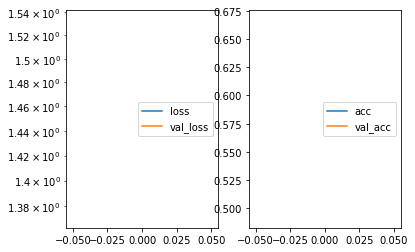

Predicted cell: Cells Probability: [[0.8133799]]
True Cell type: Cells
x [[0.45523953]]
True positional value x 0.5
y [[0.33360133]]
True positional value y 0.2916666666666667


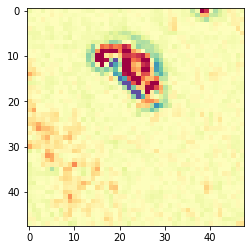

Epoch 2/250
5180/5180 [==============================] - 8s 2ms/step - loss: 1.1849 - acc: 0.8237 - val_loss: 1.1359 - val_acc: 0.8681

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 1.135932403606373, 'val_acc': 0.8681318838517744, 'loss': 1.1848574255424116, 'acc': 0.8237451717660234, 'lr': 1e-06}


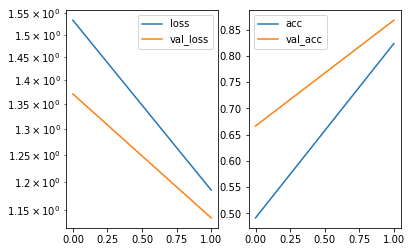

Predicted cell: Cells Probability: [[0.93105346]]
True Cell type: Cells
x [[0.09461267]]
True positional value x 0.5
y [[0.49820396]]
True positional value y 0.7083333333333334


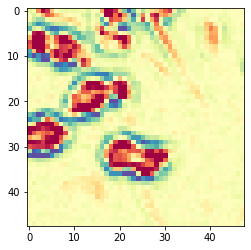

Epoch 3/250
5180/5180 [==============================] - 8s 2ms/step - loss: 1.0059 - acc: 0.8813 - val_loss: 1.0609 - val_acc: 0.8791

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 1.060882609842461, 'val_acc': 0.8791208898191487, 'loss': 1.0058940676648644, 'acc': 0.8812741275919911, 'lr': 1e-06}


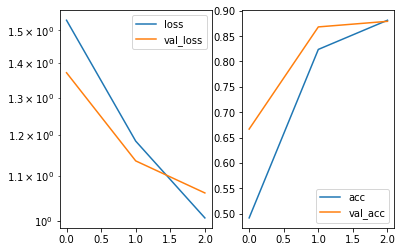

Predicted cell: Cells Probability: [[0.9868743]]
True Cell type: Cells
x [[0.44852588]]
True positional value x 0.5
y [[0.46346587]]
True positional value y 0.7083333333333334


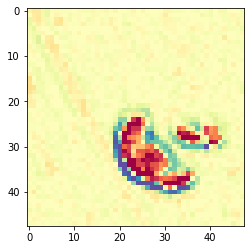

Epoch 4/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.9171 - acc: 0.8863 - val_loss: 1.0164 - val_acc: 0.8791

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 1.0163659857306289, 'val_acc': 0.8791208898191487, 'loss': 0.9171421815529753, 'acc': 0.8862934372599981, 'lr': 1e-06}


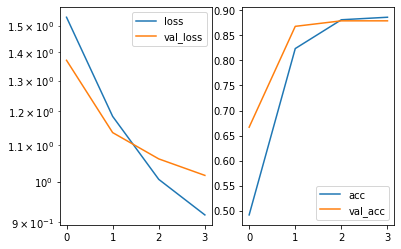

Predicted cell: Cells Probability: [[0.99275136]]
True Cell type: Cells
x [[0.47761613]]
True positional value x 0.5
y [[0.46755433]]
True positional value y 0.7083333333333334


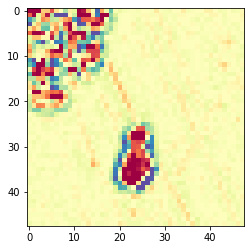

Epoch 5/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.8607 - acc: 0.8909 - val_loss: 0.9821 - val_acc: 0.8864

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9820965589621128, 'val_acc': 0.8864468851368943, 'loss': 0.8606888605821087, 'acc': 0.8909266395458384, 'lr': 1e-06}


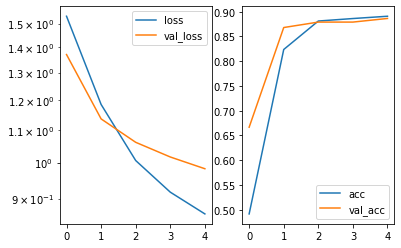

Predicted cell: Cells Probability: [[0.9460627]]
True Cell type: Cells
x [[0.37081376]]
True positional value x 0.7083333333333334
y [[0.59853303]]
True positional value y 0.7083333333333334


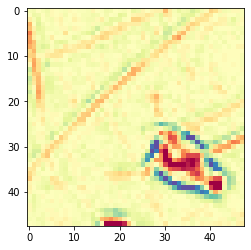

Epoch 6/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.8108 - acc: 0.9091 - val_loss: 0.9590 - val_acc: 0.8974

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9590471330143157, 'val_acc': 0.8974358856459677, 'loss': 0.8108373820551574, 'acc': 0.9090733599478674, 'lr': 1e-06}


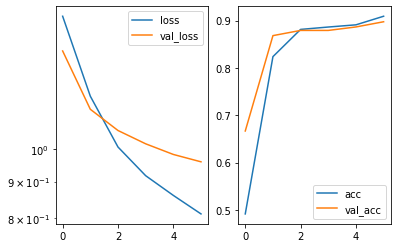

Predicted cell: Cells Probability: [[0.5494655]]
True Cell type: Normal
x [[0.5084287]]
True positional value x 0.5
y [[0.4611431]]
True positional value y 0.5


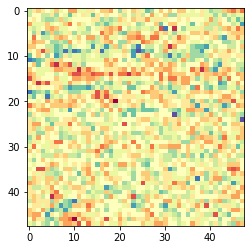

Epoch 7/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.7780 - acc: 0.9286 - val_loss: 0.9515 - val_acc: 0.9231

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9514738731768542, 'val_acc': 0.9230769305002122, 'loss': 0.7780204102339432, 'acc': 0.9285714324837026, 'lr': 1e-06}


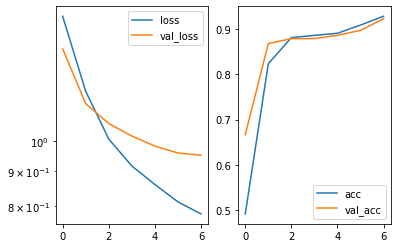

Predicted cell: Cells Probability: [[0.99647]]
True Cell type: Cells
x [[0.5702967]]
True positional value x 0.2916666666666667
y [[0.5271622]]
True positional value y 0.2916666666666667


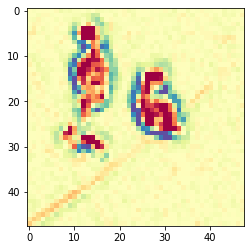

Epoch 8/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.7456 - acc: 0.9440 - val_loss: 0.9449 - val_acc: 0.9341

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9449456196564895, 'val_acc': 0.9340659419258872, 'loss': 0.7455955953211397, 'acc': 0.9440154447058453, 'lr': 1e-06}


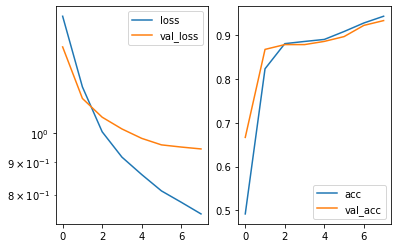

Predicted cell: Cells Probability: [[0.99752516]]
True Cell type: Cells
x [[0.6988884]]
True positional value x 0.5
y [[0.44262668]]
True positional value y 0.5


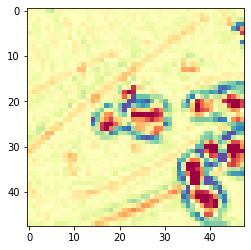

Epoch 9/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.7216 - acc: 0.9539 - val_loss: 0.9421 - val_acc: 0.9560

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9421254446654966, 'val_acc': 0.9560439379223974, 'loss': 0.7215979913947205, 'acc': 0.9538610055179669, 'lr': 1e-06}


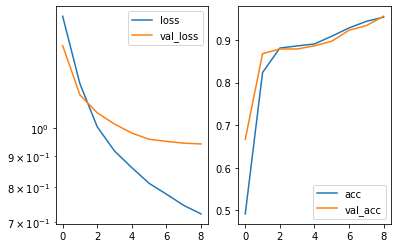

Predicted cell: Cells Probability: [[0.9686809]]
True Cell type: Cells
x [[0.20344165]]
True positional value x 0.2916666666666667
y [[0.73904574]]
True positional value y 0.7083333333333334


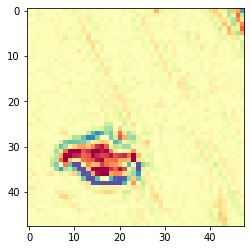

Epoch 10/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.7002 - acc: 0.9614 - val_loss: 0.9314 - val_acc: 0.9670

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9314277237588233, 'val_acc': 0.9670329657229748, 'loss': 0.7001603551813074, 'acc': 0.9613899627707639, 'lr': 1e-06}


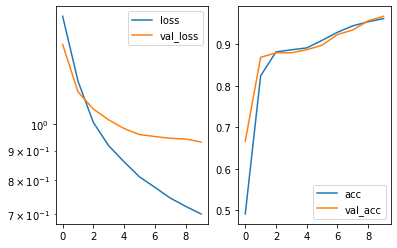

Predicted cell: Cells Probability: [[0.92835844]]
True Cell type: Cells
x [[0.3857619]]
True positional value x 0.2916666666666667
y [[0.49347126]]
True positional value y 0.5


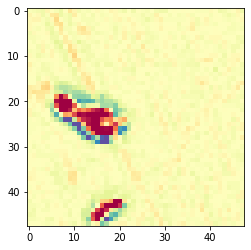

Epoch 11/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6864 - acc: 0.9664 - val_loss: 0.9272 - val_acc: 0.9707

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9272081834492666, 'val_acc': 0.9706959877258692, 'loss': 0.6864245225563933, 'acc': 0.9664092719785035, 'lr': 1e-06}


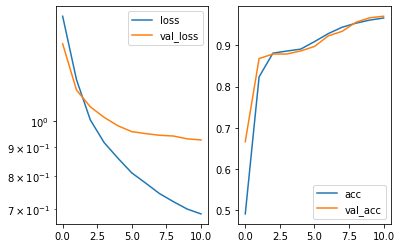

Predicted cell: Cells Probability: [[0.9880701]]
True Cell type: Cells
x [[0.4621842]]
True positional value x 0.7083333333333334
y [[0.3094919]]
True positional value y 0.5


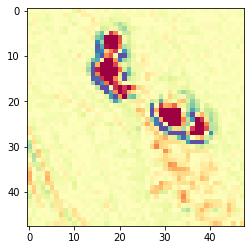

Epoch 12/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6687 - acc: 0.9685 - val_loss: 0.9175 - val_acc: 0.9744

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9175436723799932, 'val_acc': 0.9743589878955603, 'loss': 0.6687148100620991, 'acc': 0.9685328234576811, 'lr': 1e-06}


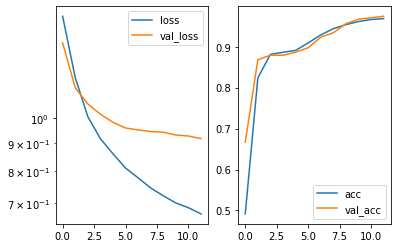

Predicted cell: Cells Probability: [[0.9734934]]
True Cell type: Cells
x [[0.675937]]
True positional value x 0.5
y [[0.23341209]]
True positional value y 0.2916666666666667


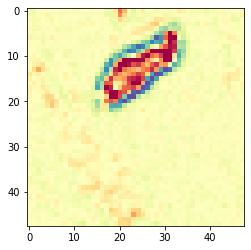

Epoch 13/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6563 - acc: 0.9708 - val_loss: 0.9096 - val_acc: 0.9744

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9096056441247682, 'val_acc': 0.9743589878955603, 'loss': 0.6562621510627187, 'acc': 0.9708494290882096, 'lr': 1e-06}


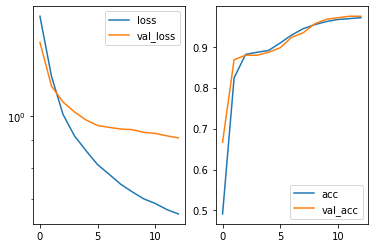

Predicted cell: Cells Probability: [[0.9831549]]
True Cell type: Cells
x [[0.35895914]]
True positional value x 0.2916666666666667
y [[0.79800284]]
True positional value y 0.7083333333333334


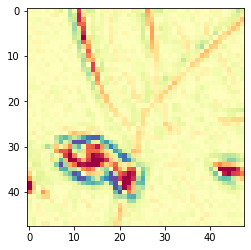

Epoch 14/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6493 - acc: 0.9720 - val_loss: 0.9036 - val_acc: 0.9780

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.9036085278123289, 'val_acc': 0.9780219880652515, 'loss': 0.6493370468552048, 'acc': 0.9720077325938752, 'lr': 1e-06}


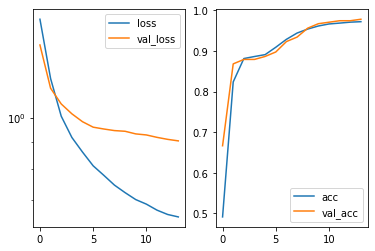

Predicted cell: Cells Probability: [[0.9014399]]
True Cell type: Cells
x [[0.50430447]]
True positional value x 0.5
y [[0.3106607]]
True positional value y 0.2916666666666667


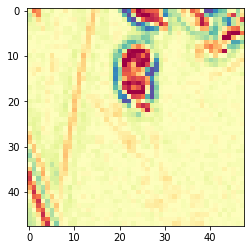

Epoch 15/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6358 - acc: 0.9728 - val_loss: 0.8956 - val_acc: 0.9707

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8955550224353106, 'val_acc': 0.9706959822675684, 'loss': 0.6358295163592776, 'acc': 0.972779930558444, 'lr': 1e-06}


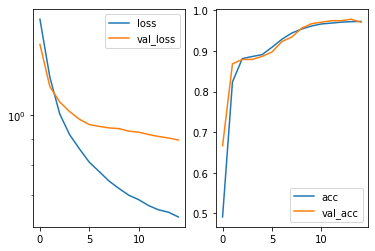

Predicted cell: Cells Probability: [[0.9690151]]
True Cell type: Cells
x [[0.7528276]]
True positional value x 0.5
y [[0.42082492]]
True positional value y 0.7083333333333334


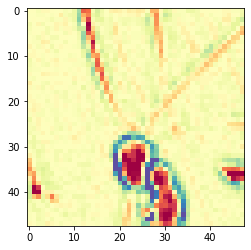

Epoch 16/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6292 - acc: 0.9739 - val_loss: 0.8903 - val_acc: 0.9817

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8902902428483789, 'val_acc': 0.9816849827766418, 'loss': 0.6292397580091558, 'acc': 0.9739382361353134, 'lr': 1e-06}


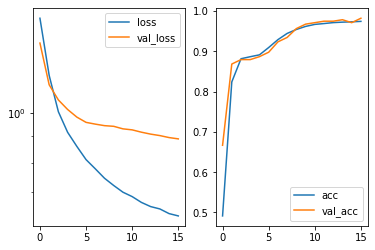

Predicted cell: Cells Probability: [[0.9208243]]
True Cell type: Cells
x [[0.46524173]]
True positional value x 0.5
y [[0.63256013]]
True positional value y 0.5


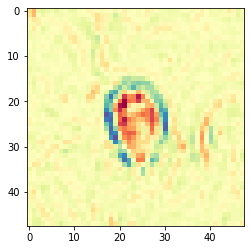

Epoch 17/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6221 - acc: 0.9743 - val_loss: 0.8868 - val_acc: 0.9853

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8867706071326148, 'val_acc': 0.9853479884046338, 'loss': 0.6221145304013403, 'acc': 0.9743243327011933, 'lr': 1e-06}


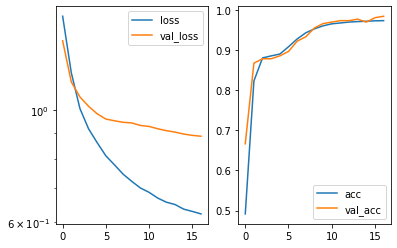

Predicted cell: Cells Probability: [[0.9901181]]
True Cell type: Cells
x [[0.53109944]]
True positional value x 0.5
y [[0.28186363]]
True positional value y 0.2916666666666667


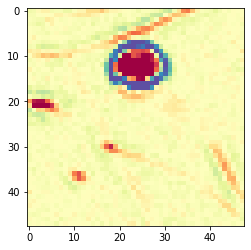

Epoch 18/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6227 - acc: 0.9747 - val_loss: 0.8853 - val_acc: 0.9853

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.885262580144973, 'val_acc': 0.9853479884046338, 'loss': 0.6226608631233451, 'acc': 0.9747104352505511, 'lr': 1e-06}


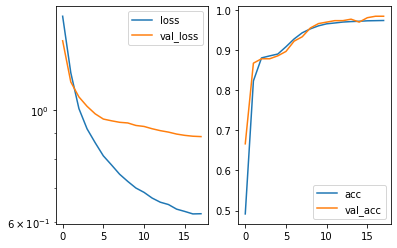

Predicted cell: Cells Probability: [[0.6947453]]
True Cell type: Cells
x [[0.50218886]]
True positional value x 0.7083333333333334
y [[0.63268495]]
True positional value y 0.7083333333333334


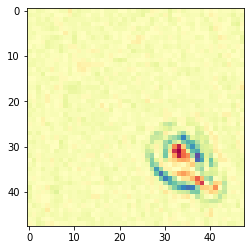

Epoch 19/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6123 - acc: 0.9761 - val_loss: 0.8824 - val_acc: 0.9853

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.882426014531663, 'val_acc': 0.9853479884046338, 'loss': 0.6122987528105039, 'acc': 0.9760617853131534, 'lr': 1e-06}


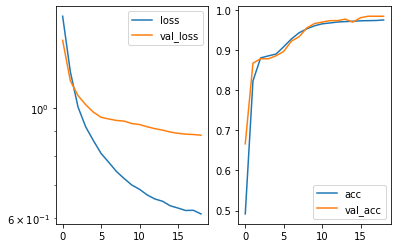

Predicted cell: Cells Probability: [[0.9938486]]
True Cell type: Cells
x [[0.5436411]]
True positional value x 0.7083333333333334
y [[0.48863578]]
True positional value y 0.7083333333333334


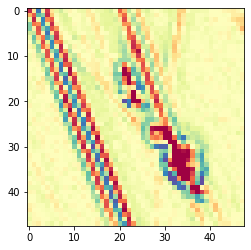

Epoch 20/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6043 - acc: 0.9764 - val_loss: 0.8849 - val_acc: 0.9853

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.884856294144641, 'val_acc': 0.9853479884046338, 'loss': 0.6042983421487698, 'acc': 0.9764478876323773, 'lr': 1e-06}


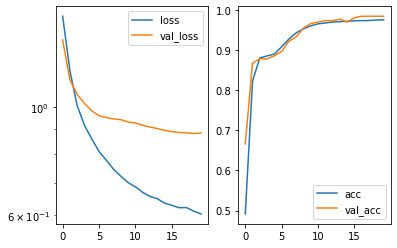

Predicted cell: Cells Probability: [[0.9514245]]
True Cell type: Cells
x [[0.22699851]]
True positional value x 0.2916666666666667
y [[0.65799195]]
True positional value y 0.7083333333333334


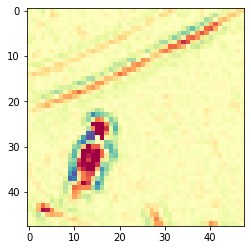

Epoch 21/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6011 - acc: 0.9776 - val_loss: 0.8821 - val_acc: 0.9853

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8821182892872736, 'val_acc': 0.9853479884046338, 'loss': 0.6011323399525351, 'acc': 0.9776061899873741, 'lr': 1e-06}


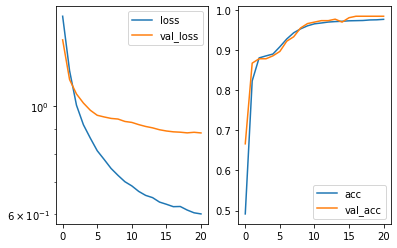

Predicted cell: Normal Probability: [[0.9222242]]
True Cell type: Normal
x [[0.54786867]]
True positional value x 0.5
y [[0.6273878]]
True positional value y 0.5


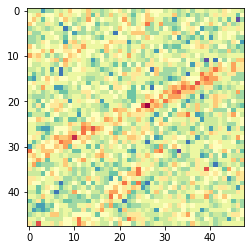

Epoch 22/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.6023 - acc: 0.9776 - val_loss: 0.8765 - val_acc: 0.9853

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8765179368602487, 'val_acc': 0.9853479884046338, 'loss': 0.6023384993140762, 'acc': 0.9776061888367052, 'lr': 1e-06}


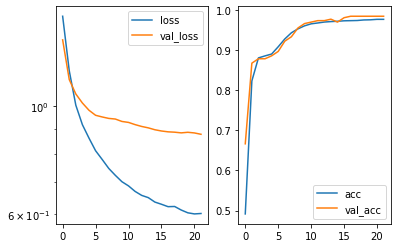

Predicted cell: Cells Probability: [[0.93407965]]
True Cell type: Cells
x [[0.51069057]]
True positional value x 0.7083333333333334
y [[0.37357378]]
True positional value y 0.2916666666666667


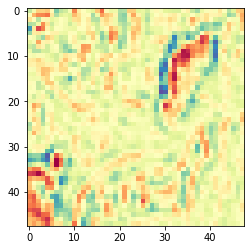

Epoch 23/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5960 - acc: 0.9792 - val_loss: 0.8728 - val_acc: 0.9853

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.872793619449322, 'val_acc': 0.9853479884046338, 'loss': 0.5960078041525881, 'acc': 0.9791505875274481, 'lr': 1e-06}


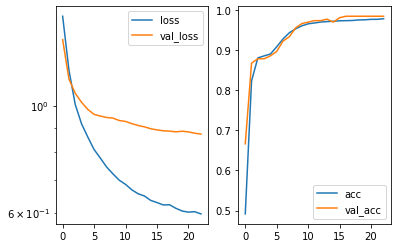

Predicted cell: Cells Probability: [[0.99844736]]
True Cell type: Cells
x [[0.50200945]]
True positional value x 0.2916666666666667
y [[0.8642301]]
True positional value y 0.7083333333333334


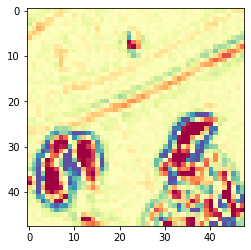

Epoch 24/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5895 - acc: 0.9807 - val_loss: 0.8741 - val_acc: 0.9853

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8740664486920003, 'val_acc': 0.9853479884046338, 'loss': 0.5894687638319597, 'acc': 0.9806949899003312, 'lr': 1e-06}


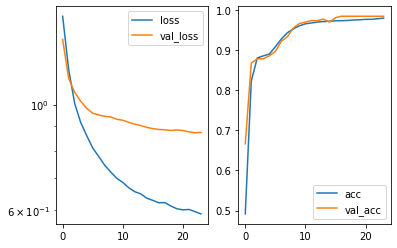

Predicted cell: Cells Probability: [[0.9693987]]
True Cell type: Cells
x [[0.58457565]]
True positional value x 0.5
y [[0.51531094]]
True positional value y 0.2916666666666667


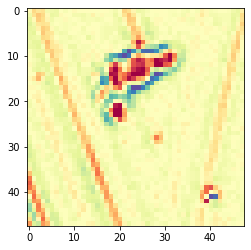

Epoch 25/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5864 - acc: 0.9822 - val_loss: 0.8755 - val_acc: 0.9853

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.875467931394612, 'val_acc': 0.9853479884046338, 'loss': 0.5864068090225278, 'acc': 0.9822393913526792, 'lr': 1e-06}


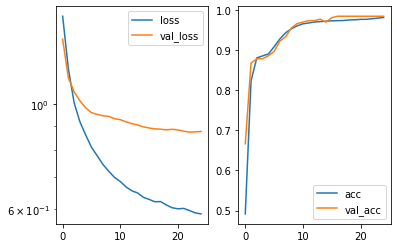

Predicted cell: Cells Probability: [[0.9940128]]
True Cell type: Cells
x [[0.57675093]]
True positional value x 0.5
y [[0.5656502]]
True positional value y 0.5


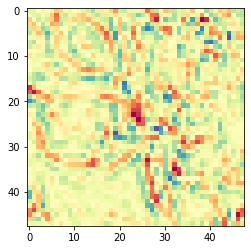

Epoch 26/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5861 - acc: 0.9817 - val_loss: 0.8754 - val_acc: 0.9853

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8753880423940582, 'val_acc': 0.9853479884046338, 'loss': 0.5861377895568789, 'acc': 0.9816602422463848, 'lr': 1e-06}


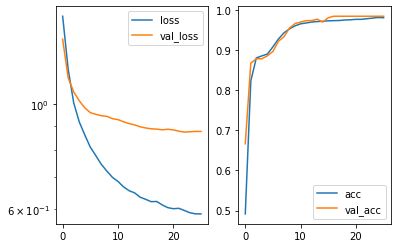

Predicted cell: Cells Probability: [[0.9708858]]
True Cell type: Cells
x [[0.5700598]]
True positional value x 0.2916666666666667
y [[0.49219918]]
True positional value y 0.2916666666666667


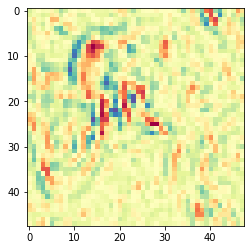

Epoch 27/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5797 - acc: 0.9847 - val_loss: 0.8721 - val_acc: 0.9853

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8720800586235828, 'val_acc': 0.9853479884046338, 'loss': 0.5797076641822874, 'acc': 0.9847490481428198, 'lr': 1e-06}


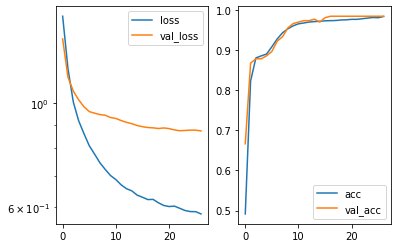

Predicted cell: Cells Probability: [[0.9827983]]
True Cell type: Cells
x [[0.717033]]
True positional value x 0.7083333333333334
y [[0.3206386]]
True positional value y 0.2916666666666667


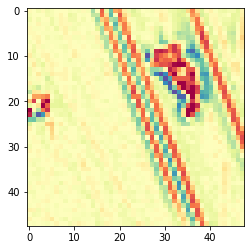

Epoch 28/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5805 - acc: 0.9832 - val_loss: 0.8729 - val_acc: 0.9853

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8728718674663223, 'val_acc': 0.9853479884046338, 'loss': 0.5804763993241152, 'acc': 0.983204643468599, 'lr': 1e-06}


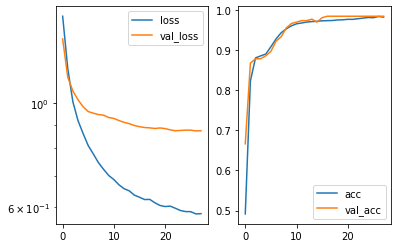

Predicted cell: Cells Probability: [[0.9766827]]
True Cell type: Cells
x [[0.42107964]]
True positional value x 0.7083333333333334
y [[0.56070095]]
True positional value y 0.7083333333333334


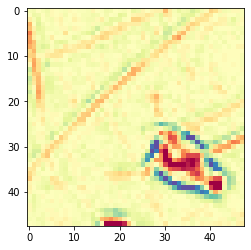

Epoch 29/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5795 - acc: 0.9847 - val_loss: 0.8692 - val_acc: 0.9853

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8691914738752903, 'val_acc': 0.9853479884046338, 'loss': 0.5794903336804806, 'acc': 0.9847490446908134, 'lr': 1e-06}


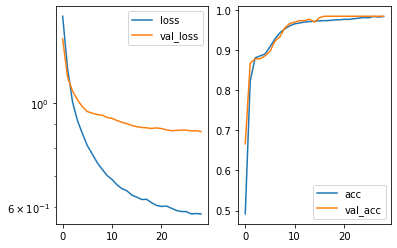

Predicted cell: Cells Probability: [[0.99524]]
True Cell type: Cells
x [[0.21111545]]
True positional value x 0.2916666666666667
y [[0.2311803]]
True positional value y 0.7083333333333334


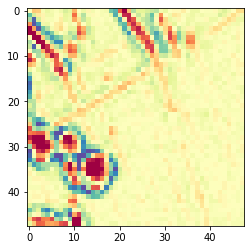

Epoch 30/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5747 - acc: 0.9861 - val_loss: 0.8688 - val_acc: 0.9853

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8687969199467055, 'val_acc': 0.9853479884046338, 'loss': 0.5747051952428339, 'acc': 0.9861003959040844, 'lr': 1e-06}


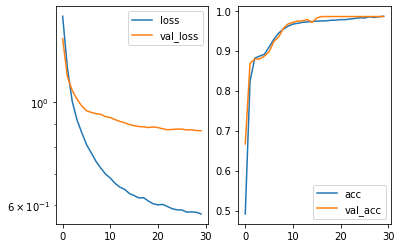

Predicted cell: Cells Probability: [[0.9659738]]
True Cell type: Cells
x [[0.35317415]]
True positional value x 0.5
y [[0.6189981]]
True positional value y 0.7083333333333334


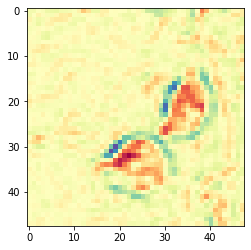

Epoch 31/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5729 - acc: 0.9875 - val_loss: 0.8678 - val_acc: 0.9853

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8677514614639702, 'val_acc': 0.9853479884046338, 'loss': 0.5729281393717615, 'acc': 0.9874517471173555, 'lr': 1e-06}


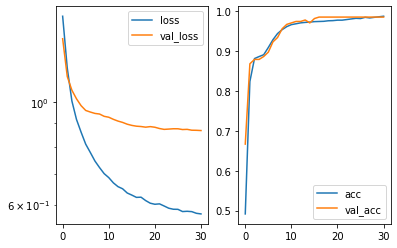

Predicted cell: Cells Probability: [[0.96395665]]
True Cell type: Cells
x [[0.35265595]]
True positional value x 0.5
y [[0.6186113]]
True positional value y 0.7083333333333334


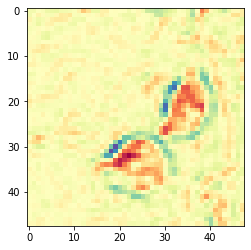

Epoch 32/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5728 - acc: 0.9859 - val_loss: 0.8662 - val_acc: 0.9853

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8662198500318842, 'val_acc': 0.9853479884046338, 'loss': 0.5728080132292964, 'acc': 0.9859073472759439, 'lr': 1e-06}


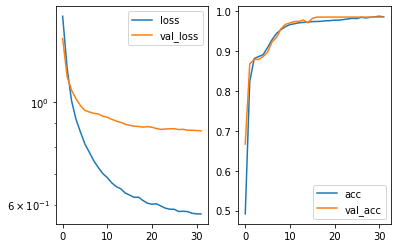

Predicted cell: Normal Probability: [[0.93287295]]
True Cell type: Normal
x [[0.5621882]]
True positional value x 0.5
y [[0.30996385]]
True positional value y 0.5


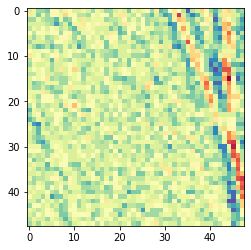

Epoch 33/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5682 - acc: 0.9900 - val_loss: 0.8645 - val_acc: 0.9853

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8644634253812797, 'val_acc': 0.9853479884046338, 'loss': 0.5681508770320406, 'acc': 0.9899613972336169, 'lr': 1e-06}


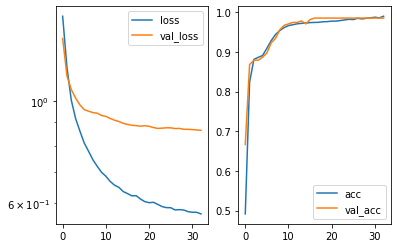

Predicted cell: Cells Probability: [[0.96430093]]
True Cell type: Cells
x [[0.46662018]]
True positional value x 0.5
y [[0.57862204]]
True positional value y 0.5


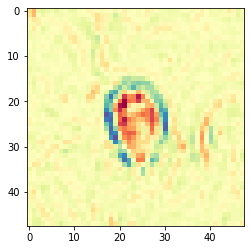

Epoch 34/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5661 - acc: 0.9919 - val_loss: 0.8643 - val_acc: 0.9853

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8643349756251325, 'val_acc': 0.9853479884046338, 'loss': 0.5660755641211874, 'acc': 0.9918918984737175, 'lr': 1e-06}


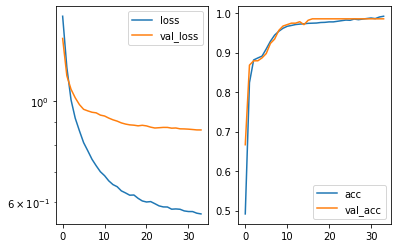

Predicted cell: Cells Probability: [[0.9880816]]
True Cell type: Cells
x [[0.657883]]
True positional value x 0.5
y [[0.72822887]]
True positional value y 0.7083333333333334


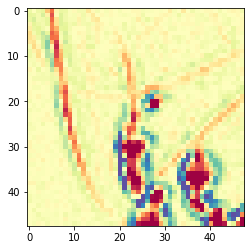

Epoch 35/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5744 - acc: 0.9875 - val_loss: 0.8632 - val_acc: 0.9853

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8631840167028126, 'val_acc': 0.9853479884046338, 'loss': 0.5743804233414787, 'acc': 0.9874517494186932, 'lr': 1e-06}


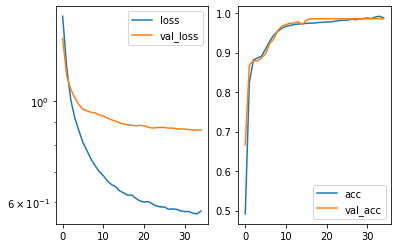

Predicted cell: Cells Probability: [[0.9815363]]
True Cell type: Cells
x [[0.5758813]]
True positional value x 0.2916666666666667
y [[0.50860715]]
True positional value y 0.2916666666666667


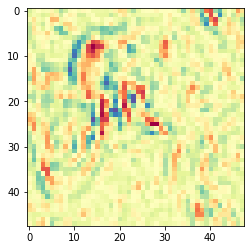

Epoch 36/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5589 - acc: 0.9931 - val_loss: 0.8639 - val_acc: 0.9853

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8638720023326385, 'val_acc': 0.9853479884046338, 'loss': 0.5588979495538248, 'acc': 0.9930501996780454, 'lr': 1e-06}


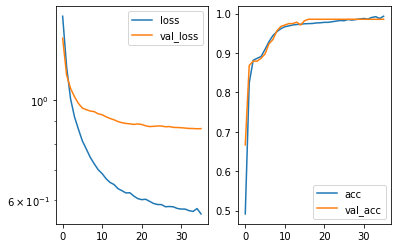

Predicted cell: Cells Probability: [[0.98741466]]
True Cell type: Cells
x [[0.16789573]]
True positional value x 0.2916666666666667
y [[0.76941574]]
True positional value y 0.7083333333333334


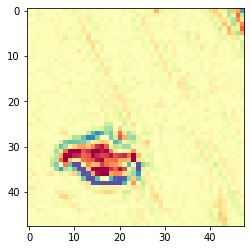

Epoch 37/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5604 - acc: 0.9929 - val_loss: 0.8642 - val_acc: 0.9853

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8642242286668156, 'val_acc': 0.9853479884046338, 'loss': 0.5603592101211253, 'acc': 0.9928571473677646, 'lr': 1e-06}


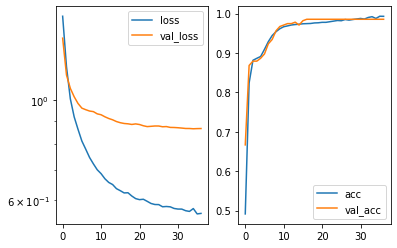

Predicted cell: Cells Probability: [[0.9893764]]
True Cell type: Cells
x [[0.6714724]]
True positional value x 0.5
y [[0.72365415]]
True positional value y 0.7083333333333334


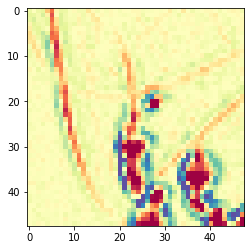

Epoch 38/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5588 - acc: 0.9938 - val_loss: 0.8654 - val_acc: 0.9853

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8653984574171213, 'val_acc': 0.9853479884046338, 'loss': 0.5588123727028894, 'acc': 0.9938223985631494, 'lr': 1e-06}


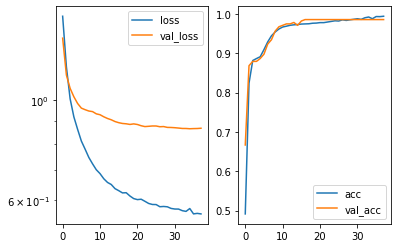

Predicted cell: Normal Probability: [[0.82026416]]
True Cell type: Normal
x [[0.4198892]]
True positional value x 0.5
y [[0.42041963]]
True positional value y 0.5


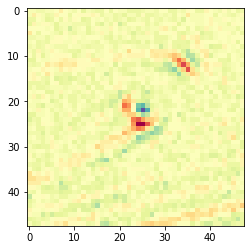

Epoch 39/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5611 - acc: 0.9938 - val_loss: 0.8642 - val_acc: 0.9853

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8641928698553707, 'val_acc': 0.9853479884046338, 'loss': 0.5610713680278381, 'acc': 0.9938223997138181, 'lr': 1e-06}


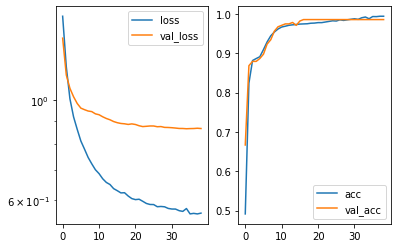

Predicted cell: Cells Probability: [[0.98685]]
True Cell type: Cells
x [[0.48245975]]
True positional value x 0.2916666666666667
y [[0.08417917]]
True positional value y 0.2916666666666667


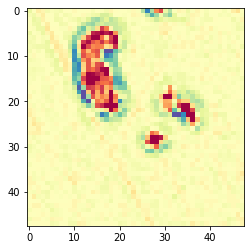

Epoch 40/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5582 - acc: 0.9940 - val_loss: 0.8596 - val_acc: 0.9853

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8595878698013641, 'val_acc': 0.9853479884046338, 'loss': 0.5582382154280615, 'acc': 0.9940154474214237, 'lr': 1e-06}


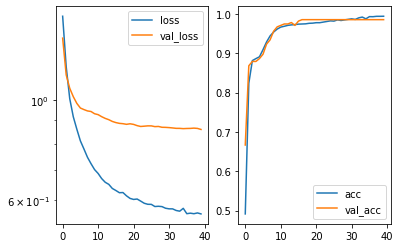

Predicted cell: Cells Probability: [[0.9778863]]
True Cell type: Cells
x [[0.5075502]]
True positional value x 0.2916666666666667
y [[0.50049555]]
True positional value y 0.7083333333333334


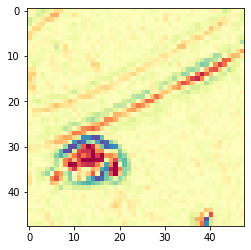

Epoch 41/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5592 - acc: 0.9948 - val_loss: 0.8589 - val_acc: 0.9853

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.858940391750126, 'val_acc': 0.9853479884046338, 'loss': 0.5591670792535465, 'acc': 0.9947876497585341, 'lr': 1e-06}


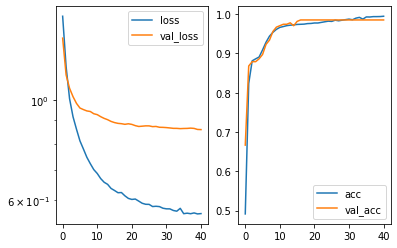

Predicted cell: Cells Probability: [[0.97752106]]
True Cell type: Cells
x [[0.51801246]]
True positional value x 0.2916666666666667
y [[0.49291635]]
True positional value y 0.7083333333333334


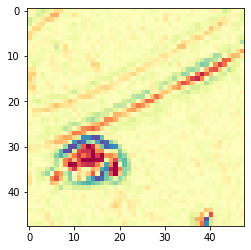

Epoch 42/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5579 - acc: 0.9940 - val_loss: 0.8586 - val_acc: 0.9853

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8585590717993377, 'val_acc': 0.9853479884046338, 'loss': 0.557933685632286, 'acc': 0.9940154485720926, 'lr': 1e-06}


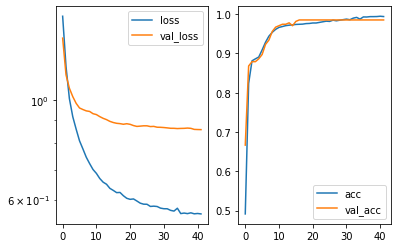

Predicted cell: Cells Probability: [[0.9943895]]
True Cell type: Cells
x [[0.65280277]]
True positional value x 0.7083333333333334
y [[0.56775886]]
True positional value y 0.5


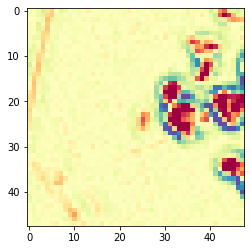

Epoch 43/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5540 - acc: 0.9958 - val_loss: 0.8586 - val_acc: 0.9853

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.858587390992231, 'val_acc': 0.9853479884046338, 'loss': 0.5540267562774157, 'acc': 0.9957528986525812, 'lr': 1e-06}


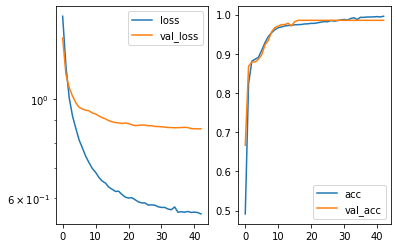

Predicted cell: Cells Probability: [[0.99246985]]
True Cell type: Cells
x [[0.5965817]]
True positional value x 0.7083333333333334
y [[0.64748025]]
True positional value y 0.7083333333333334


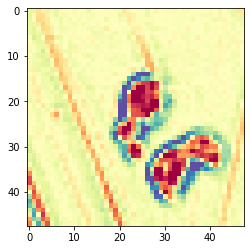

Epoch 44/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5546 - acc: 0.9965 - val_loss: 0.8575 - val_acc: 0.9853

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8574822348552745, 'val_acc': 0.9853479884046338, 'loss': 0.5545747073000462, 'acc': 0.9965250986883539, 'lr': 1e-06}


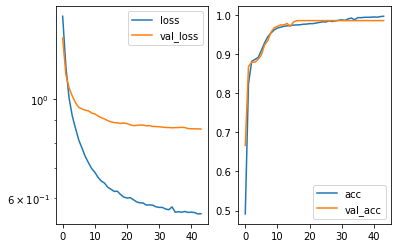

Predicted cell: Cells Probability: [[0.9885422]]
True Cell type: Cells
x [[0.4014832]]
True positional value x 0.5
y [[0.5687466]]
True positional value y 0.7083333333333334


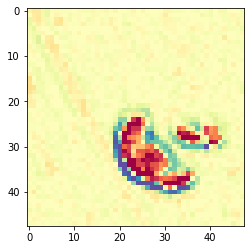

Epoch 45/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5544 - acc: 0.9954 - val_loss: 0.8578 - val_acc: 0.9853

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8577820117220337, 'val_acc': 0.9853479884046338, 'loss': 0.5544159872651561, 'acc': 0.9953667997853636, 'lr': 1e-06}


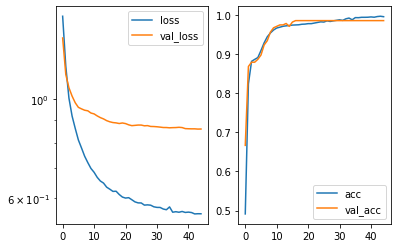

Predicted cell: Normal Probability: [[0.98171884]]
True Cell type: Normal
x [[0.42051676]]
True positional value x 0.5
y [[0.41898254]]
True positional value y 0.5


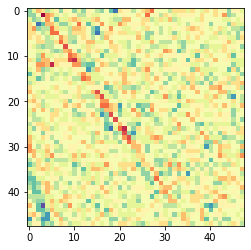

Epoch 46/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5541 - acc: 0.9954 - val_loss: 0.8578 - val_acc: 0.9853

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8578190190014822, 'val_acc': 0.9853479884046338, 'loss': 0.5540741244798462, 'acc': 0.9953667986346948, 'lr': 1e-06}


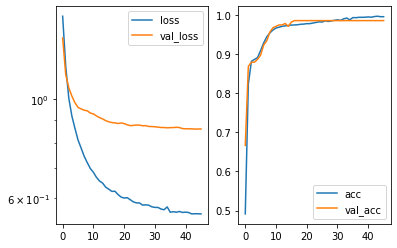

Predicted cell: Cells Probability: [[0.99256426]]
True Cell type: Cells
x [[0.81899303]]
True positional value x 0.7083333333333334
y [[0.39509735]]
True positional value y 0.2916666666666667


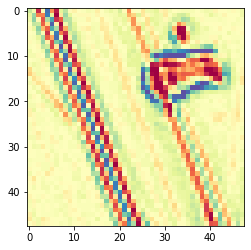

Epoch 47/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5531 - acc: 0.9963 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8558576613555461, 'val_acc': 0.9853479884046338, 'loss': 0.553105895583694, 'acc': 0.9963320486794107, 'lr': 1e-06}


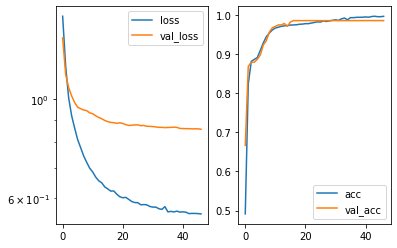

Predicted cell: Cells Probability: [[0.89776236]]
True Cell type: Cells
x [[0.30723774]]
True positional value x 0.2916666666666667
y [[0.51937544]]
True positional value y 0.7083333333333334


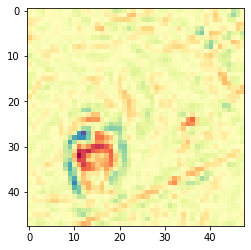

Epoch 48/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5534 - acc: 0.9959 - val_loss: 0.8554 - val_acc: 0.9853

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8553526825083918, 'val_acc': 0.9853479884046338, 'loss': 0.55339299665915, 'acc': 0.9959459475108555, 'lr': 1e-06}


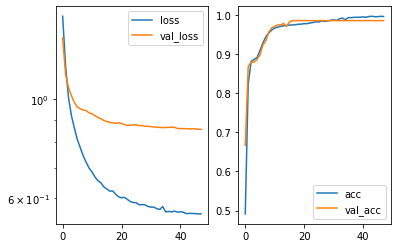

Predicted cell: Cells Probability: [[0.9906283]]
True Cell type: Cells
x [[0.6514079]]
True positional value x 0.5
y [[0.7368665]]
True positional value y 0.7083333333333334


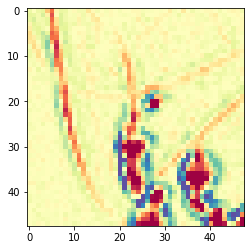

Epoch 49/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5493 - acc: 0.9967 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559356799055805, 'val_acc': 0.9853479884046338, 'loss': 0.5493084298137533, 'acc': 0.9967181498479659, 'lr': 1e-06}


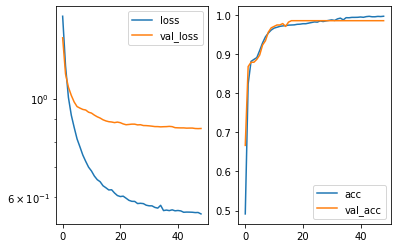

Predicted cell: Cells Probability: [[0.9791612]]
True Cell type: Cells
x [[0.54372567]]
True positional value x 0.2916666666666667
y [[0.43067002]]
True positional value y 0.5


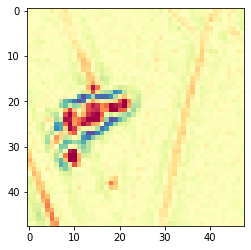

Epoch 50/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5497 - acc: 0.9967 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8565400701302749, 'val_acc': 0.9853479884046338, 'loss': 0.5496773873977219, 'acc': 0.9967181486972971, 'lr': 1e-06}


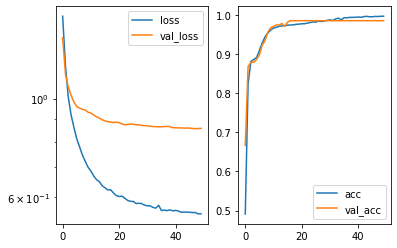

Predicted cell: Cells Probability: [[0.98624957]]
True Cell type: Cells
x [[0.29709822]]
True positional value x 0.2916666666666667
y [[0.37165284]]
True positional value y 0.5


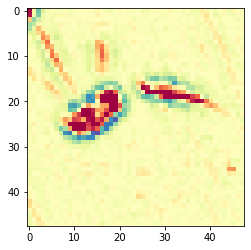

Epoch 51/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5509 - acc: 0.9963 - val_loss: 0.8578 - val_acc: 0.9853

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8578450424330575, 'val_acc': 0.9853479884046338, 'loss': 0.5508864278038497, 'acc': 0.9963320498300795, 'lr': 1e-06}


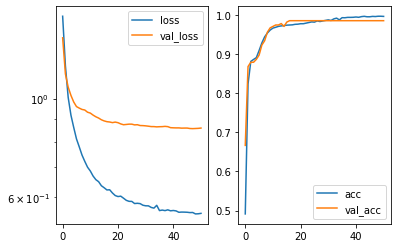

Predicted cell: Cells Probability: [[0.9695086]]
True Cell type: Cells
x [[0.603844]]
True positional value x 0.5
y [[0.34083018]]
True positional value y 0.5


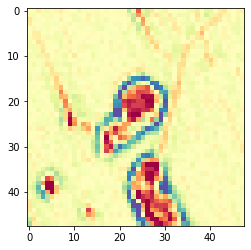

Epoch 52/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5446 - acc: 0.9983 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8565458677190564, 'val_acc': 0.9853479884046338, 'loss': 0.5446239348544117, 'acc': 0.9982625499195114, 'lr': 1e-06}


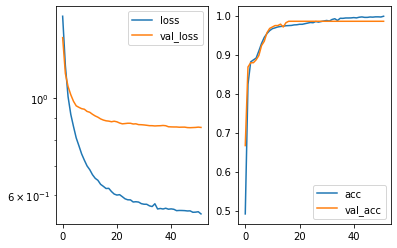

Predicted cell: Cells Probability: [[0.9997347]]
True Cell type: Cells
x [[0.86669254]]
True positional value x 0.2916666666666667
y [[0.21120349]]
True positional value y 0.7083333333333334


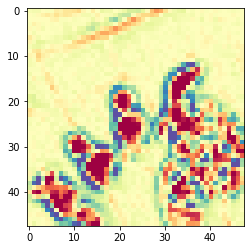

Epoch 53/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5459 - acc: 0.9975 - val_loss: 0.8586 - val_acc: 0.9853

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8586380307054345, 'val_acc': 0.9853479884046338, 'loss': 0.5458521937311386, 'acc': 0.9974903487330699, 'lr': 1e-06}


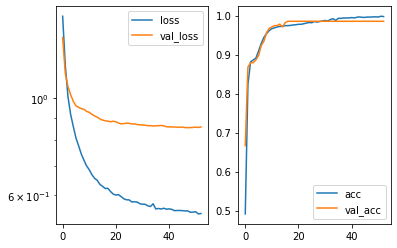

Predicted cell: Cells Probability: [[0.9890721]]
True Cell type: Cells
x [[0.45984802]]
True positional value x 0.2916666666666667
y [[0.74288356]]
True positional value y 0.7083333333333334


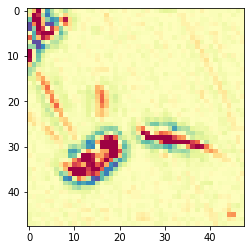

Epoch 54/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5463 - acc: 0.9981 - val_loss: 0.8590 - val_acc: 0.9853

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8589805427925054, 'val_acc': 0.9853479884046338, 'loss': 0.5462900450791172, 'acc': 0.9980694999105681, 'lr': 1e-06}


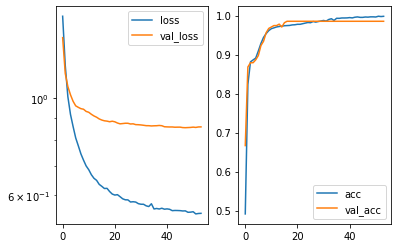

Predicted cell: Cells Probability: [[0.99550456]]
True Cell type: Cells
x [[0.6398899]]
True positional value x 0.7083333333333334
y [[0.55754024]]
True positional value y 0.5


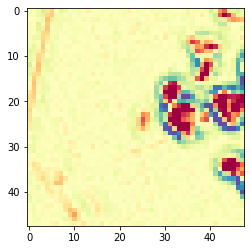

Epoch 55/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5479 - acc: 0.9971 - val_loss: 0.8599 - val_acc: 0.9853

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8598902391426729, 'val_acc': 0.9853479884046338, 'loss': 0.5479479572487614, 'acc': 0.9971042487151834, 'lr': 1e-06}


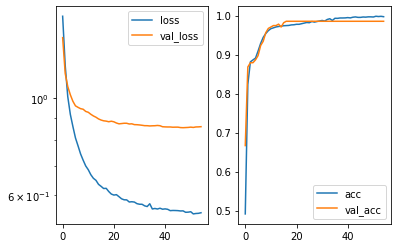

Predicted cell: Cells Probability: [[0.9646766]]
True Cell type: Cells
x [[0.5379406]]
True positional value x 0.5
y [[0.27153102]]
True positional value y 0.2916666666666667


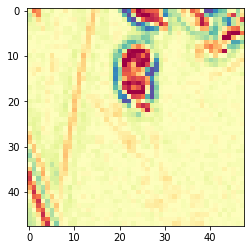

Epoch 56/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5427 - acc: 0.9985 - val_loss: 0.8585 - val_acc: 0.9853

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8585420652623579, 'val_acc': 0.9853479884046338, 'loss': 0.5426736724882972, 'acc': 0.9984555999284546, 'lr': 1e-06}


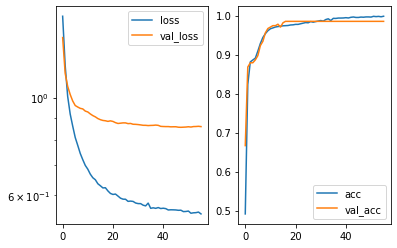

Predicted cell: Cells Probability: [[0.9676618]]
True Cell type: Cells
x [[0.5827119]]
True positional value x 0.5
y [[0.46615684]]
True positional value y 0.5


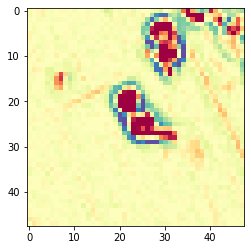

Epoch 57/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5447 - acc: 0.9988 - val_loss: 0.8579 - val_acc: 0.9853

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8579125341041621, 'val_acc': 0.9853479884046338, 'loss': 0.5447213679667146, 'acc': 0.9988416999463409, 'lr': 1e-06}


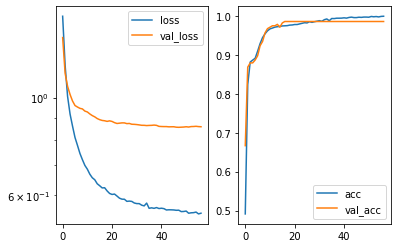

Predicted cell: Cells Probability: [[0.9943967]]
True Cell type: Cells
x [[0.76146036]]
True positional value x 0.7083333333333334
y [[0.38643172]]
True positional value y 0.7083333333333334


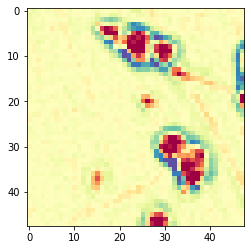

Epoch 58/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5478 - acc: 0.9971 - val_loss: 0.8580 - val_acc: 0.9853

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8579836265071408, 'val_acc': 0.9853479884046338, 'loss': 0.5478018911188633, 'acc': 0.9971042498658522, 'lr': 1e-06}


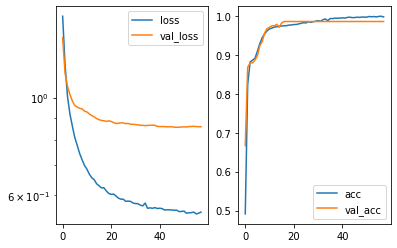

Predicted cell: Cells Probability: [[0.9963611]]
True Cell type: Cells
x [[0.5243873]]
True positional value x 0.7083333333333334
y [[0.43511584]]
True positional value y 0.7083333333333334


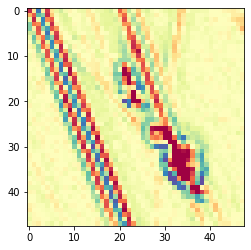

Epoch 59/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5442 - acc: 0.9981 - val_loss: 0.8595 - val_acc: 0.9853

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8594774900775253, 'val_acc': 0.9853479884046338, 'loss': 0.5441775018183881, 'acc': 0.9980694999105681, 'lr': 1e-06}


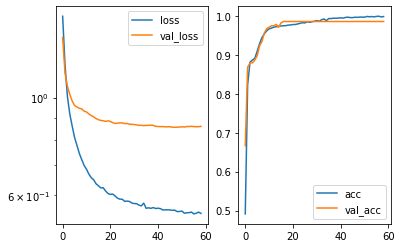

Predicted cell: Normal Probability: [[0.96550214]]
True Cell type: Normal
x [[0.53057677]]
True positional value x 0.5
y [[0.60343283]]
True positional value y 0.5


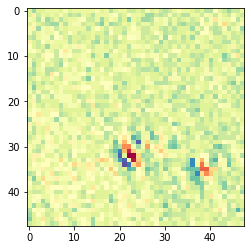

Epoch 60/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5454 - acc: 0.9965 - val_loss: 0.8588 - val_acc: 0.9853

Epoch 00060: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8588090480028928, 'val_acc': 0.9853479884046338, 'loss': 0.545418575463608, 'acc': 0.996525097537685, 'lr': 1e-06}


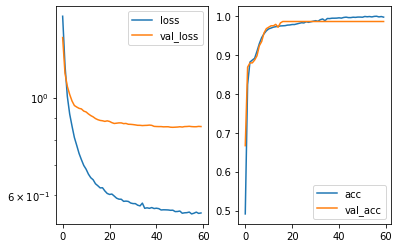

Predicted cell: Cells Probability: [[0.99263436]]
True Cell type: Cells
x [[0.1674809]]
True positional value x 0.2916666666666667
y [[0.5159597]]
True positional value y 0.7083333333333334


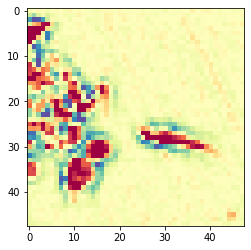

Epoch 61/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5418 - acc: 0.9992 - val_loss: 0.8599 - val_acc: 0.9853

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8599362137553456, 'val_acc': 0.9853479884046338, 'loss': 0.5417900794261211, 'acc': 0.9992277999642273, 'lr': 1e-07}


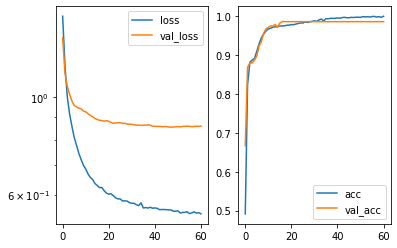

Predicted cell: Cells Probability: [[0.99093014]]
True Cell type: Cells
x [[0.37571117]]
True positional value x 0.5
y [[0.49688727]]
True positional value y 0.2916666666666667


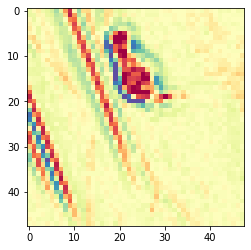

Epoch 62/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5428 - acc: 0.9981 - val_loss: 0.8585 - val_acc: 0.9853

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8584638406068851, 'val_acc': 0.9853479884046338, 'loss': 0.5427703022036313, 'acc': 0.9980694999105681, 'lr': 1e-07}


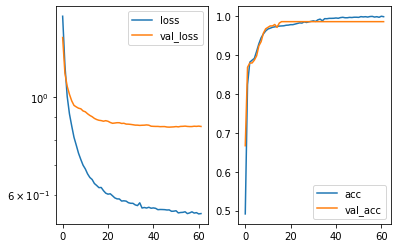

Predicted cell: Cells Probability: [[0.9923339]]
True Cell type: Cells
x [[0.88487625]]
True positional value x 0.7083333333333334
y [[0.5382211]]
True positional value y 0.5


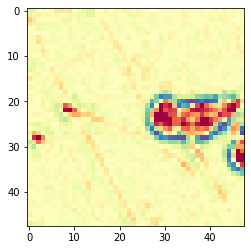

Epoch 63/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5401 - acc: 0.9992 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562343683871594, 'val_acc': 0.9853479884046338, 'loss': 0.5400525883818225, 'acc': 0.9992277999642273, 'lr': 1e-07}


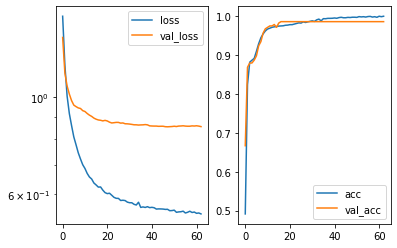

Predicted cell: Cells Probability: [[0.8755344]]
True Cell type: Cells
x [[0.3730425]]
True positional value x 0.2916666666666667
y [[0.48993304]]
True positional value y 0.2916666666666667


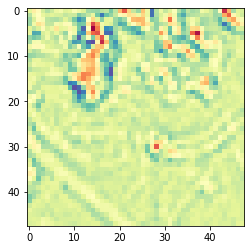

Epoch 64/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5429 - acc: 0.9983 - val_loss: 0.8552 - val_acc: 0.9853

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8552016006721245, 'val_acc': 0.9853479884046338, 'loss': 0.5429031710827212, 'acc': 0.9982625499195114, 'lr': 1e-07}


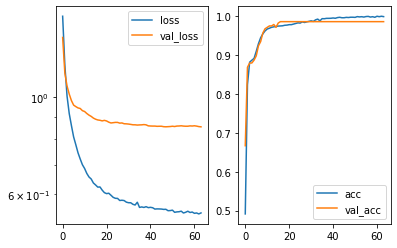

Predicted cell: Cells Probability: [[0.9989735]]
True Cell type: Cells
x [[0.5157323]]
True positional value x 0.2916666666666667
y [[0.880826]]
True positional value y 0.7083333333333334


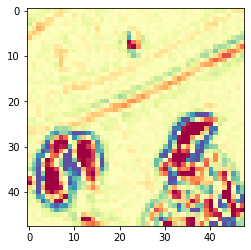

Epoch 65/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5401 - acc: 0.9992 - val_loss: 0.8549 - val_acc: 0.9853

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.85485656444843, 'val_acc': 0.9853479884046338, 'loss': 0.5400816241286436, 'acc': 0.9992277999642273, 'lr': 1e-07}


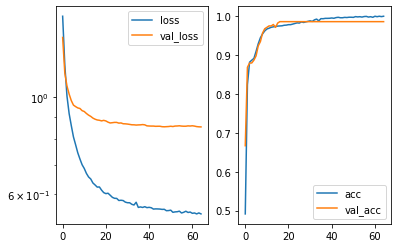

Predicted cell: Cells Probability: [[0.9740946]]
True Cell type: Cells
x [[0.66727144]]
True positional value x 0.7083333333333334
y [[0.51169044]]
True positional value y 0.2916666666666667


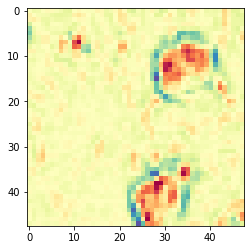

Epoch 66/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5455 - acc: 0.9969 - val_loss: 0.8555 - val_acc: 0.9853

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.85549670676172, 'val_acc': 0.9853479884046338, 'loss': 0.5454985197906789, 'acc': 0.9969111975555714, 'lr': 1e-07}


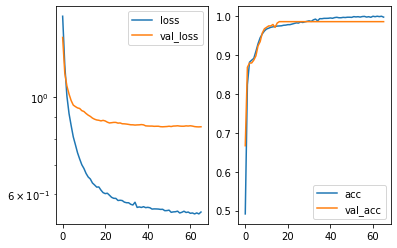

Predicted cell: Cells Probability: [[0.9987863]]
True Cell type: Cells
x [[0.6791886]]
True positional value x 0.7083333333333334
y [[0.6046821]]
True positional value y 0.2916666666666667


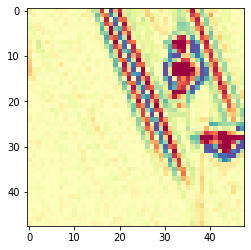

Epoch 67/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5419 - acc: 0.9981 - val_loss: 0.8554 - val_acc: 0.9853

Epoch 00067: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8554230020159767, 'val_acc': 0.9853479884046338, 'loss': 0.541905605654919, 'acc': 0.9980694987598994, 'lr': 1e-07}


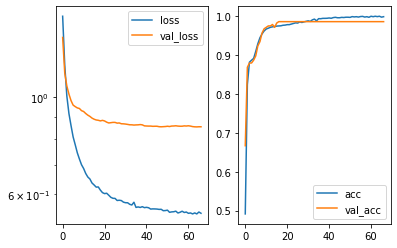

Predicted cell: Normal Probability: [[0.9877644]]
True Cell type: Normal
x [[0.6734622]]
True positional value x 0.5
y [[0.4780181]]
True positional value y 0.5


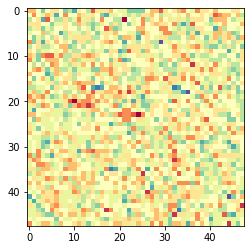

Epoch 68/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5403 - acc: 0.9990 - val_loss: 0.8554 - val_acc: 0.9853

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8554178022202992, 'val_acc': 0.9853479884046338, 'loss': 0.5402724611713159, 'acc': 0.9990347499552841, 'lr': 1e-08}


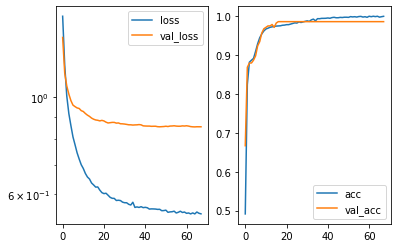

Predicted cell: Cells Probability: [[0.9882279]]
True Cell type: Cells
x [[0.7038722]]
True positional value x 0.7083333333333334
y [[0.2855633]]
True positional value y 0.2916666666666667


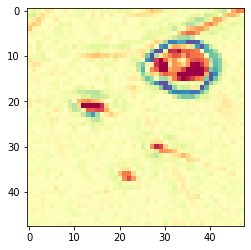

Epoch 69/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5393 - acc: 0.9992 - val_loss: 0.8554 - val_acc: 0.9853

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8553978968889285, 'val_acc': 0.9853479884046338, 'loss': 0.5392925808328459, 'acc': 0.9992277999642273, 'lr': 1e-08}


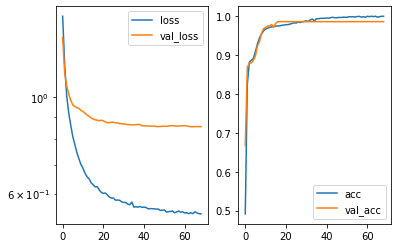

Predicted cell: Cells Probability: [[0.9857373]]
True Cell type: Cells
x [[0.31924406]]
True positional value x 0.2916666666666667
y [[0.5675803]]
True positional value y 0.5


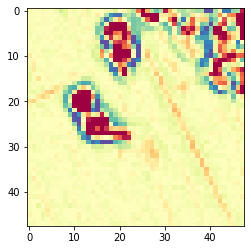

Epoch 70/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5424 - acc: 0.9979 - val_loss: 0.8555 - val_acc: 0.9853

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8555042564650595, 'val_acc': 0.9853479884046338, 'loss': 0.5423749333182817, 'acc': 0.9978764487509562, 'lr': 1e-08}


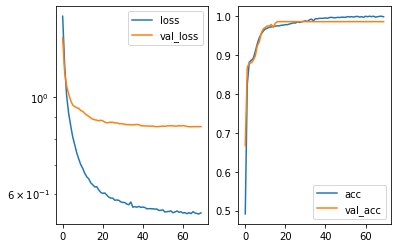

Predicted cell: Cells Probability: [[0.98377234]]
True Cell type: Cells
x [[0.38665974]]
True positional value x 0.2916666666666667
y [[0.4751542]]
True positional value y 0.5


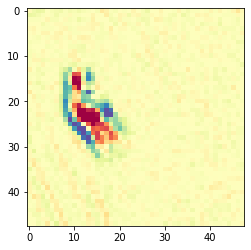

Epoch 71/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5390 - acc: 0.9992 - val_loss: 0.8556 - val_acc: 0.9853

Epoch 00071: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8556376237135667, 'val_acc': 0.9853479884046338, 'loss': 0.5389834014145104, 'acc': 0.9992277999642273, 'lr': 1e-08}


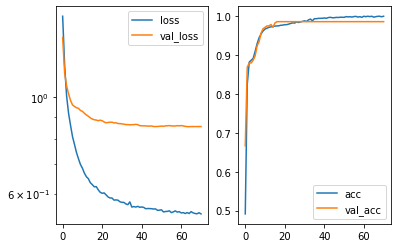

Predicted cell: Normal Probability: [[0.96915174]]
True Cell type: Normal
x [[0.50000894]]
True positional value x 0.5
y [[0.4633223]]
True positional value y 0.5


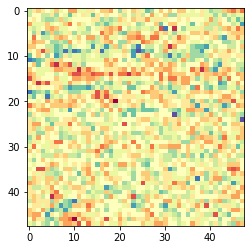

Epoch 72/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5463 - acc: 0.9971 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00072: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8558897714475135, 'val_acc': 0.9853479884046338, 'loss': 0.5462548382954248, 'acc': 0.9971042498658522, 'lr': 1e-08}


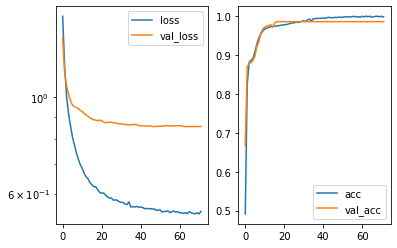

Predicted cell: Cells Probability: [[0.9981762]]
True Cell type: Cells
x [[0.21605636]]
True positional value x 0.2916666666666667
y [[0.2859095]]
True positional value y 0.7083333333333334


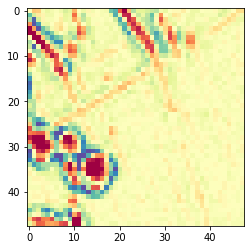

Epoch 73/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5418 - acc: 0.9981 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00073: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560518598381853, 'val_acc': 0.9853479884046338, 'loss': 0.5417712878536534, 'acc': 0.9980694987598994, 'lr': 1e-08}


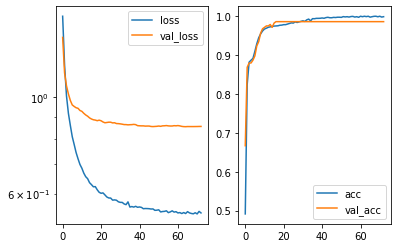

Predicted cell: Cells Probability: [[0.9955231]]
True Cell type: Cells
x [[0.3516658]]
True positional value x 0.7083333333333334
y [[0.5299497]]
True positional value y 0.5


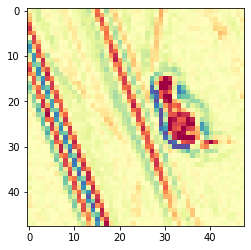

Epoch 74/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5407 - acc: 0.9988 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00074: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560798879944798, 'val_acc': 0.9853479884046338, 'loss': 0.5406887759112944, 'acc': 0.9988416999463409, 'lr': 1e-08}


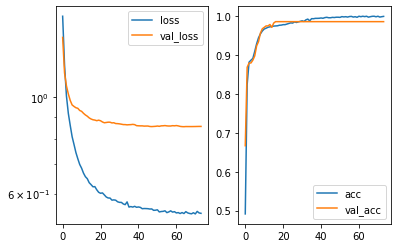

Predicted cell: Cells Probability: [[0.9683544]]
True Cell type: Cells
x [[0.6643564]]
True positional value x 0.7083333333333334
y [[0.36309892]]
True positional value y 0.5


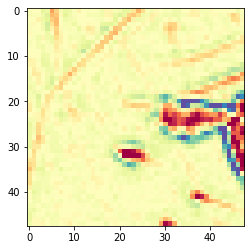

Epoch 75/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5389 - acc: 0.9985 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00075: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00075: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560687220576919, 'val_acc': 0.9853479884046338, 'loss': 0.5389247755286316, 'acc': 0.9984555987777858, 'lr': 1e-08}


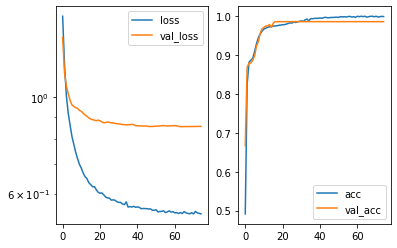

Predicted cell: Normal Probability: [[0.97228223]]
True Cell type: Normal
x [[0.41179806]]
True positional value x 0.5
y [[0.6586576]]
True positional value y 0.5


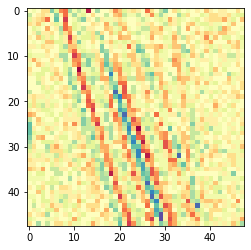

Epoch 76/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5418 - acc: 0.9983 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00076: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561142259465032, 'val_acc': 0.9853479884046338, 'loss': 0.5418201390380565, 'acc': 0.9982625499195114, 'lr': 1e-09}


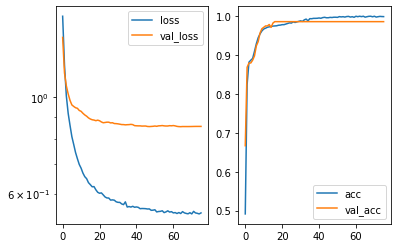

Predicted cell: Cells Probability: [[0.9855768]]
True Cell type: Cells
x [[0.26716626]]
True positional value x 0.2916666666666667
y [[0.33827013]]
True positional value y 0.5


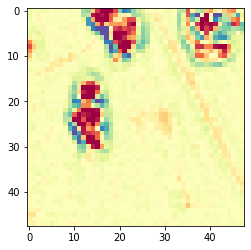

Epoch 77/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5398 - acc: 0.9979 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00077: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561462382257203, 'val_acc': 0.9853479884046338, 'loss': 0.5398151156524894, 'acc': 0.9978764487509562, 'lr': 1e-09}


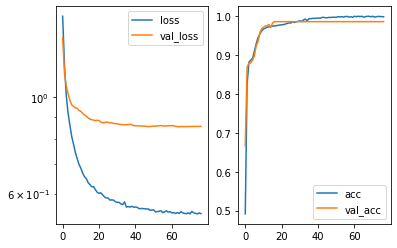

Predicted cell: Cells Probability: [[0.9995402]]
True Cell type: Cells
x [[0.45124075]]
True positional value x 0.7083333333333334
y [[0.3843185]]
True positional value y 0.2916666666666667


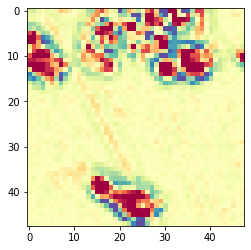

Epoch 78/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5444 - acc: 0.9977 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00078: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561605664836618, 'val_acc': 0.9853479884046338, 'loss': 0.5443735994887628, 'acc': 0.9976833998926818, 'lr': 1e-09}


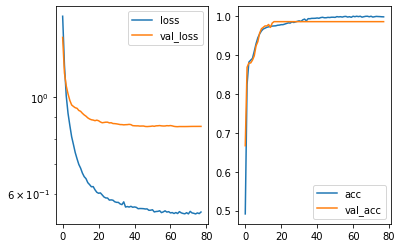

Predicted cell: Cells Probability: [[0.98754066]]
True Cell type: Cells
x [[0.43856317]]
True positional value x 0.2916666666666667
y [[0.70431304]]
True positional value y 0.7083333333333334


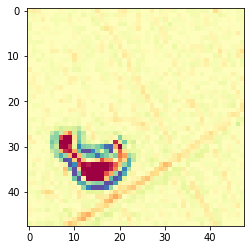

Epoch 79/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5444 - acc: 0.9990 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00079: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00079: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8565424130513117, 'val_acc': 0.9853479884046338, 'loss': 0.5443723666621911, 'acc': 0.9990347499552841, 'lr': 1e-09}


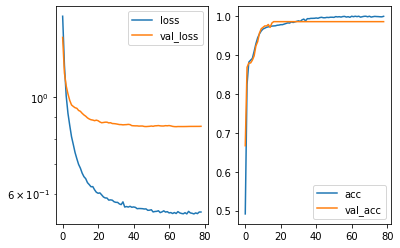

Predicted cell: Cells Probability: [[0.9917041]]
True Cell type: Cells
x [[0.57963246]]
True positional value x 0.5
y [[0.07691466]]
True positional value y 0.2916666666666667


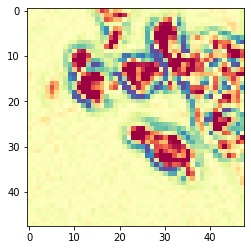

Epoch 80/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5402 - acc: 0.9990 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00080: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564428523346618, 'val_acc': 0.9853479884046338, 'loss': 0.5402281042691823, 'acc': 0.9990347499552841, 'lr': 9.9999994e-11}


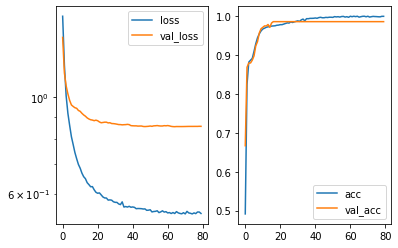

Predicted cell: Cells Probability: [[0.99893254]]
True Cell type: Cells
x [[0.07615951]]
True positional value x 0.2916666666666667
y [[0.26786602]]
True positional value y 0.7083333333333334


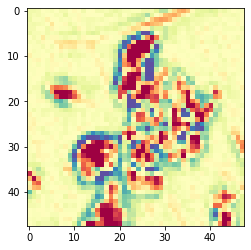

Epoch 81/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5433 - acc: 0.9983 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00081: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563440758666713, 'val_acc': 0.9853479884046338, 'loss': 0.5432695090540588, 'acc': 0.9982625499195114, 'lr': 9.9999994e-11}


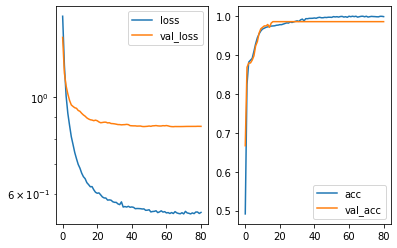

Predicted cell: Cells Probability: [[0.99900645]]
True Cell type: Cells
x [[0.6143274]]
True positional value x 0.7083333333333334
y [[0.52979076]]
True positional value y 0.5


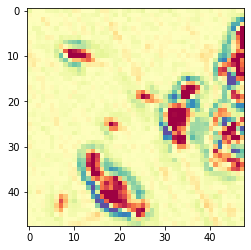

Epoch 82/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5404 - acc: 0.9988 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00082: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564985776558901, 'val_acc': 0.9853479884046338, 'loss': 0.5403870654842569, 'acc': 0.9988416999463409, 'lr': 9.9999994e-11}


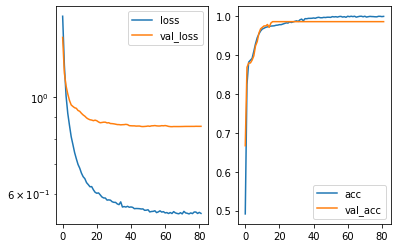

Predicted cell: Cells Probability: [[0.9942239]]
True Cell type: Cells
x [[0.56803167]]
True positional value x 0.5
y [[0.21105905]]
True positional value y 0.2916666666666667


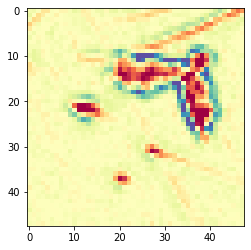

Epoch 83/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5414 - acc: 0.9985 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00083: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.

Epoch 00083: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8565094431678018, 'val_acc': 0.9853479884046338, 'loss': 0.5414308215200211, 'acc': 0.9984555999284546, 'lr': 9.9999994e-11}


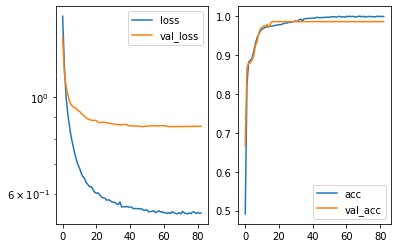

Predicted cell: Cells Probability: [[0.99688303]]
True Cell type: Cells
x [[0.7095599]]
True positional value x 0.2916666666666667
y [[0.28852254]]
True positional value y 0.5


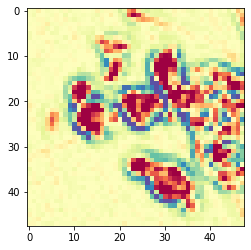

Epoch 84/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5433 - acc: 0.9985 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00084: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563684321148491, 'val_acc': 0.9853479884046338, 'loss': 0.5432907448772298, 'acc': 0.9984555999284546, 'lr': 9.999999e-12}


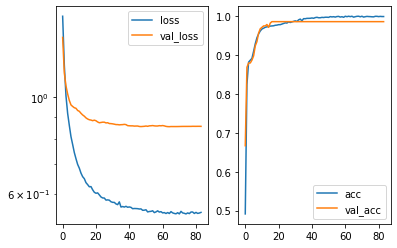

Predicted cell: Cells Probability: [[0.9910595]]
True Cell type: Cells
x [[0.47001618]]
True positional value x 0.2916666666666667
y [[0.09724157]]
True positional value y 0.2916666666666667


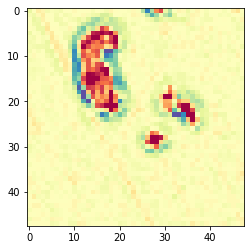

Epoch 85/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5406 - acc: 0.9985 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00085: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856307096970387, 'val_acc': 0.9853479884046338, 'loss': 0.5405603152444464, 'acc': 0.9984555999284546, 'lr': 9.999999e-12}


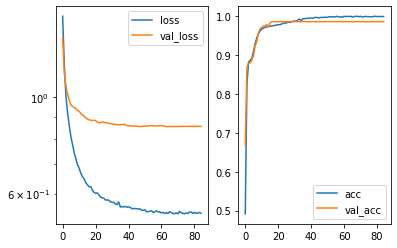

Predicted cell: Cells Probability: [[0.9824457]]
True Cell type: Cells
x [[0.6019986]]
True positional value x 0.7083333333333334
y [[0.43938157]]
True positional value y 0.2916666666666667


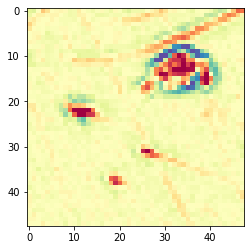

Epoch 86/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5393 - acc: 0.9985 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00086: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562399231907212, 'val_acc': 0.9853479884046338, 'loss': 0.5393256809720661, 'acc': 0.9984555999284546, 'lr': 9.999999e-12}


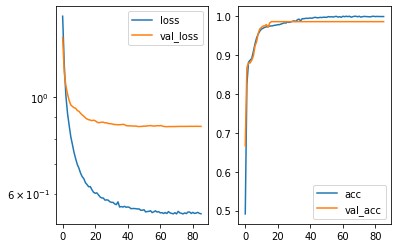

Predicted cell: Cells Probability: [[0.99726427]]
True Cell type: Cells
x [[0.7007771]]
True positional value x 0.2916666666666667
y [[0.48360285]]
True positional value y 0.5


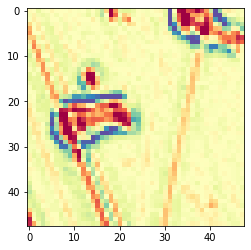

Epoch 87/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5430 - acc: 0.9981 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00087: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 00087: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562736135699374, 'val_acc': 0.9853479884046338, 'loss': 0.5429816229923351, 'acc': 0.9980694987598994, 'lr': 9.999999e-12}


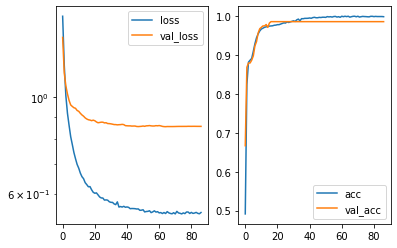

Predicted cell: Cells Probability: [[0.9979956]]
True Cell type: Cells
x [[0.43492135]]
True positional value x 0.5
y [[0.6882765]]
True positional value y 0.5


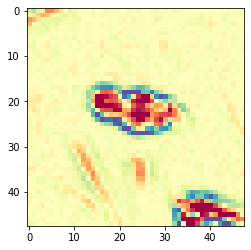

Epoch 88/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5412 - acc: 0.9990 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00088: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562804822956686, 'val_acc': 0.9853479884046338, 'loss': 0.5411689997179628, 'acc': 0.9990347499552841, 'lr': 9.999999e-13}


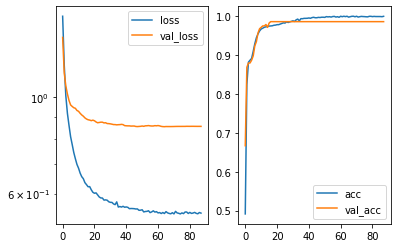

Predicted cell: Cells Probability: [[0.98208195]]
True Cell type: Cells
x [[0.79040307]]
True positional value x 0.7083333333333334
y [[0.58878934]]
True positional value y 0.2916666666666667


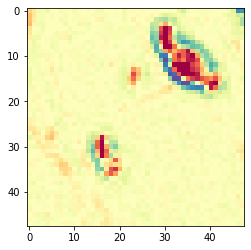

Epoch 89/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5395 - acc: 0.9986 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00089: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856260264312828, 'val_acc': 0.9853479884046338, 'loss': 0.5395236862212074, 'acc': 0.9986486499373978, 'lr': 9.999999e-13}


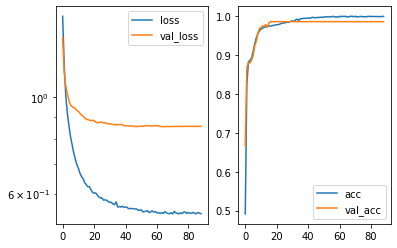

Predicted cell: Cells Probability: [[0.9634696]]
True Cell type: Cells
x [[0.46929464]]
True positional value x 0.5
y [[0.5786521]]
True positional value y 0.7083333333333334


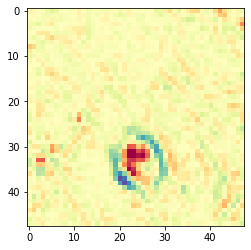

Epoch 90/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5410 - acc: 0.9988 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00090: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856145977973938, 'val_acc': 0.9853479884046338, 'loss': 0.541048251293801, 'acc': 0.9988416999463409, 'lr': 9.999999e-13}


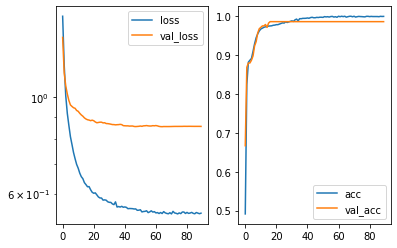

Predicted cell: Cells Probability: [[0.9803423]]
True Cell type: Cells
x [[0.5672393]]
True positional value x 0.2916666666666667
y [[0.51679057]]
True positional value y 0.7083333333333334


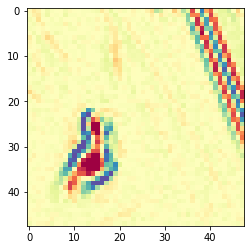

Epoch 91/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5429 - acc: 0.9977 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00091: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 00091: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561655636672135, 'val_acc': 0.9853479884046338, 'loss': 0.5429366612986708, 'acc': 0.9976833998926818, 'lr': 9.999999e-13}


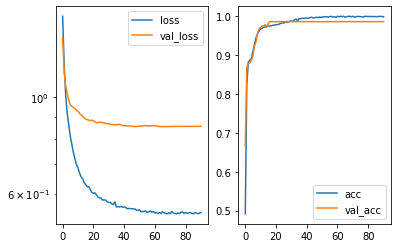

Predicted cell: Cells Probability: [[0.9933929]]
True Cell type: Cells
x [[0.35431653]]
True positional value x 0.5
y [[0.7940053]]
True positional value y 0.7083333333333334


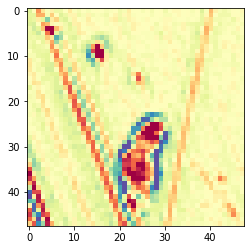

Epoch 92/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5409 - acc: 0.9994 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00092: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563012801683866, 'val_acc': 0.9853479884046338, 'loss': 0.5409012395442683, 'acc': 0.9994208499731705, 'lr': 9.999999e-14}


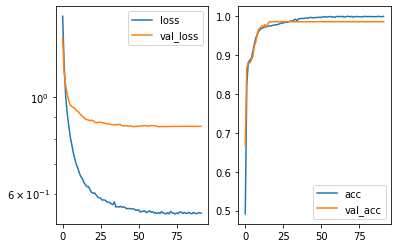

Predicted cell: Cells Probability: [[0.9769339]]
True Cell type: Cells
x [[0.60294944]]
True positional value x 0.5
y [[0.43872535]]
True positional value y 0.2916666666666667


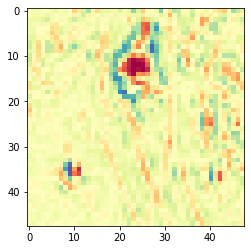

Epoch 93/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5403 - acc: 0.9985 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00093: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563026312070016, 'val_acc': 0.9853479884046338, 'loss': 0.5403359790106077, 'acc': 0.9984555999284546, 'lr': 9.999999e-14}


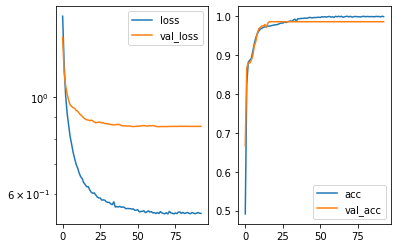

Predicted cell: Cells Probability: [[0.99113864]]
True Cell type: Cells
x [[0.2693906]]
True positional value x 0.2916666666666667
y [[0.21295808]]
True positional value y 0.2916666666666667


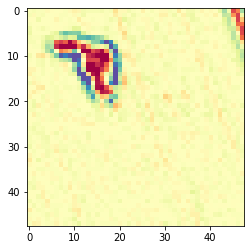

Epoch 94/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5398 - acc: 0.9990 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00094: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563472923341688, 'val_acc': 0.9853479884046338, 'loss': 0.5398332076183157, 'acc': 0.9990347499552841, 'lr': 9.999999e-14}


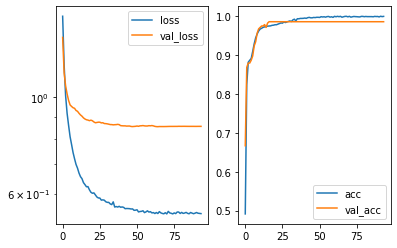

Predicted cell: Cells Probability: [[0.9780918]]
True Cell type: Cells
x [[0.5072842]]
True positional value x 0.5
y [[0.3589923]]
True positional value y 0.5


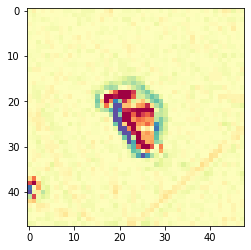

Epoch 95/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5397 - acc: 0.9986 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00095: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 00095: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562428348667019, 'val_acc': 0.9853479884046338, 'loss': 0.539734623607061, 'acc': 0.9986486499373978, 'lr': 9.999999e-14}


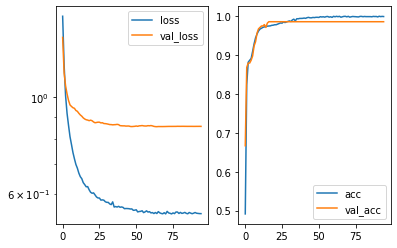

Predicted cell: Normal Probability: [[0.98805016]]
True Cell type: Normal
x [[0.40468818]]
True positional value x 0.5
y [[0.43205562]]
True positional value y 0.5


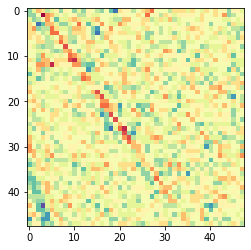

Epoch 96/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5382 - acc: 0.9994 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00096: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562455526638381, 'val_acc': 0.9853479884046338, 'loss': 0.5382215405983354, 'acc': 0.9994208499731705, 'lr': 9.999999e-15}


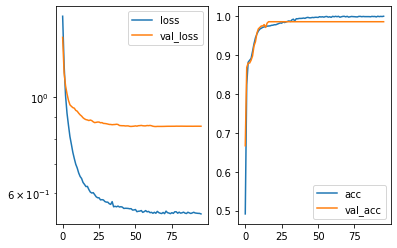

Predicted cell: Cells Probability: [[0.96416235]]
True Cell type: Cells
x [[0.22821951]]
True positional value x 0.2916666666666667
y [[0.80951285]]
True positional value y 0.7083333333333334


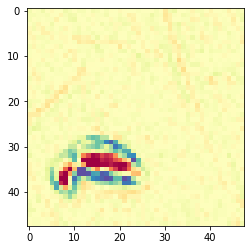

Epoch 97/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5408 - acc: 0.9986 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00097: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562092554001581, 'val_acc': 0.9853479884046338, 'loss': 0.5408429107610784, 'acc': 0.9986486499373978, 'lr': 9.999999e-15}


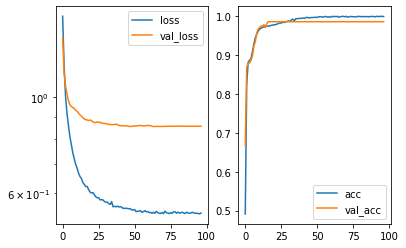

Predicted cell: Cells Probability: [[0.9958152]]
True Cell type: Cells
x [[0.43412396]]
True positional value x 0.2916666666666667
y [[0.19367349]]
True positional value y 0.5


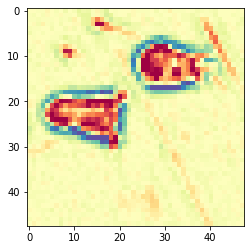

Epoch 98/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5417 - acc: 0.9985 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00098: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562046913873582, 'val_acc': 0.9853479884046338, 'loss': 0.5416848337328112, 'acc': 0.9984555999284546, 'lr': 9.999999e-15}


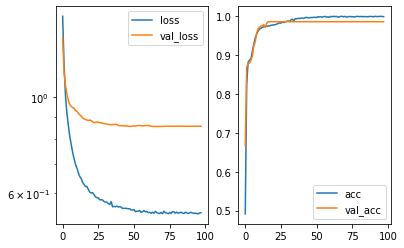

Predicted cell: Cells Probability: [[0.91723704]]
True Cell type: Cells
x [[0.67966914]]
True positional value x 0.5
y [[0.58258367]]
True positional value y 0.7083333333333334


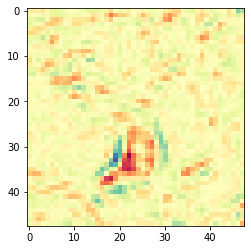

Epoch 99/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5411 - acc: 0.9986 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00099: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561365525801103, 'val_acc': 0.9853479884046338, 'loss': 0.5410681311688368, 'acc': 0.9986486499373978, 'lr': 9.999999e-15}


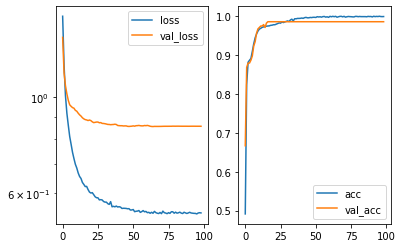

Predicted cell: Normal Probability: [[0.9720195]]
True Cell type: Normal
x [[0.74795836]]
True positional value x 0.5
y [[0.564575]]
True positional value y 0.5


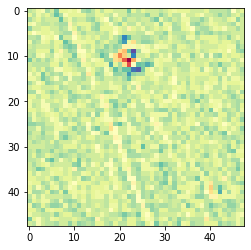

Epoch 100/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5389 - acc: 0.9985 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00100: ReduceLROnPlateau reducing learning rate to 9.999998977483753e-16.

Epoch 00100: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560503725603823, 'val_acc': 0.9853479884046338, 'loss': 0.538906157246888, 'acc': 0.9984555999284546, 'lr': 9.999999e-15}


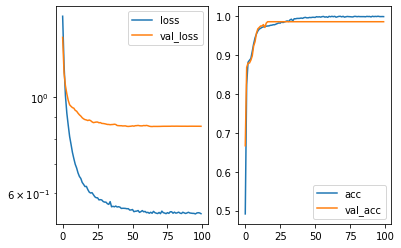

Predicted cell: Cells Probability: [[0.96817356]]
True Cell type: Cells
x [[0.66563356]]
True positional value x 0.7083333333333334
y [[0.36318693]]
True positional value y 0.5


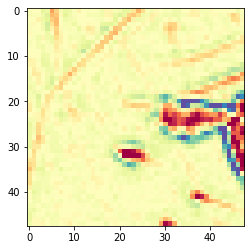

Epoch 101/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5385 - acc: 0.9988 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00101: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560723101263081, 'val_acc': 0.9853479884046338, 'loss': 0.5384878974163394, 'acc': 0.9988416999463409, 'lr': 9.999999e-16}


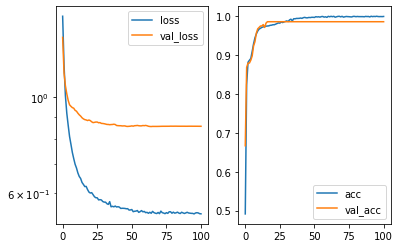

Predicted cell: Cells Probability: [[0.98221546]]
True Cell type: Cells
x [[0.60197634]]
True positional value x 0.7083333333333334
y [[0.4401734]]
True positional value y 0.2916666666666667


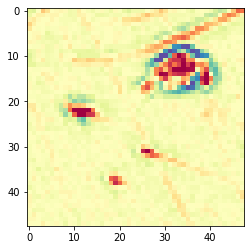

Epoch 102/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5394 - acc: 0.9977 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00102: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562341469984788, 'val_acc': 0.9853479884046338, 'loss': 0.5394212534528902, 'acc': 0.9976833989721468, 'lr': 9.999999e-16}


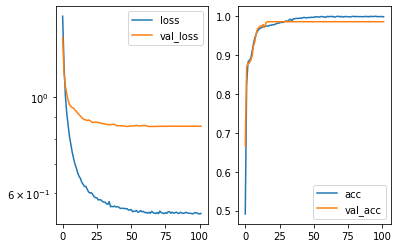

Predicted cell: Cells Probability: [[0.9369836]]
True Cell type: Cells
x [[0.7317938]]
True positional value x 0.7083333333333334
y [[0.67730814]]
True positional value y 0.7083333333333334


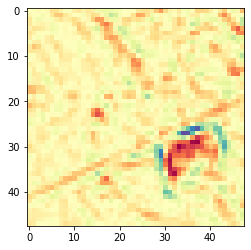

Epoch 103/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5433 - acc: 0.9975 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00103: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562396245125012, 'val_acc': 0.9853479884046338, 'loss': 0.5433360039037167, 'acc': 0.9974903487330699, 'lr': 9.999999e-16}


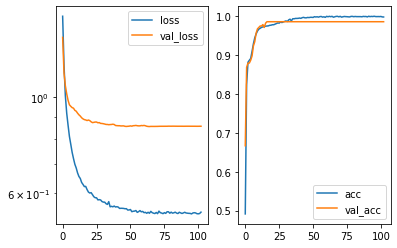

Predicted cell: Cells Probability: [[0.97373724]]
True Cell type: Cells
x [[0.6763885]]
True positional value x 0.7083333333333334
y [[0.5214269]]
True positional value y 0.2916666666666667


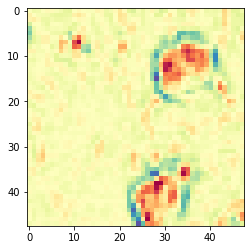

Epoch 104/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5393 - acc: 0.9992 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00104: ReduceLROnPlateau reducing learning rate to 9.999998977483754e-17.

Epoch 00104: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561748982349158, 'val_acc': 0.9853479884046338, 'loss': 0.539326545584616, 'acc': 0.9992277999642273, 'lr': 9.999999e-16}


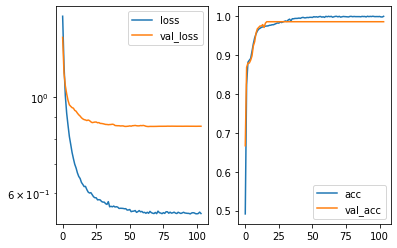

Predicted cell: Cells Probability: [[0.9827728]]
True Cell type: Cells
x [[0.35183424]]
True positional value x 0.5
y [[0.6232672]]
True positional value y 0.7083333333333334


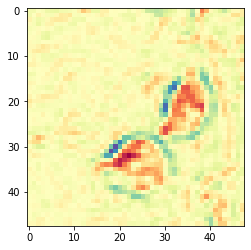

Epoch 105/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5422 - acc: 0.9985 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00105: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856500676263383, 'val_acc': 0.9853479884046338, 'loss': 0.5422494915461448, 'acc': 0.9984555999284546, 'lr': 9.999999e-17}


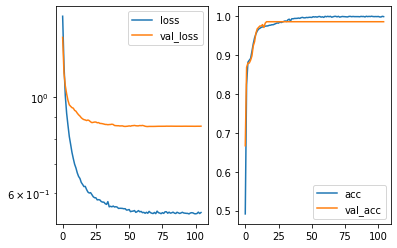

Predicted cell: Cells Probability: [[0.9945239]]
True Cell type: Cells
x [[0.7941649]]
True positional value x 0.7083333333333334
y [[0.45544493]]
True positional value y 0.5


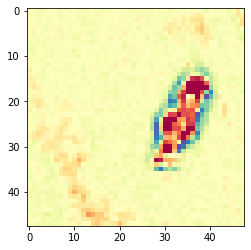

Epoch 106/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5416 - acc: 0.9985 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00106: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563456369407011, 'val_acc': 0.9853479884046338, 'loss': 0.5415542176331333, 'acc': 0.9984555987777858, 'lr': 9.999999e-17}


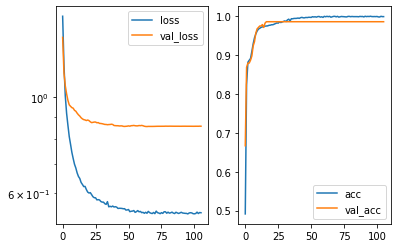

Predicted cell: Normal Probability: [[0.98805594]]
True Cell type: Normal
x [[0.40421042]]
True positional value x 0.5
y [[0.4323382]]
True positional value y 0.5


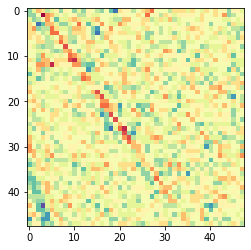

Epoch 107/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5390 - acc: 0.9990 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00107: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563502594664857, 'val_acc': 0.9853479884046338, 'loss': 0.5390346715349028, 'acc': 0.9990347499552841, 'lr': 9.999999e-17}


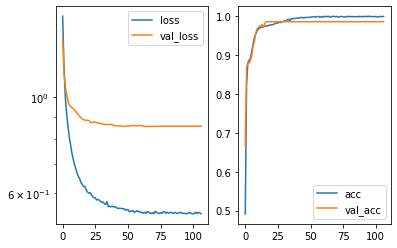

Predicted cell: Cells Probability: [[0.9893357]]
True Cell type: Cells
x [[0.37361178]]
True positional value x 0.7083333333333334
y [[0.5869462]]
True positional value y 0.5


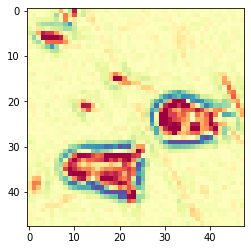

Epoch 108/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5394 - acc: 0.9992 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00108: ReduceLROnPlateau reducing learning rate to 9.999998845134856e-18.

Epoch 00108: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.855990483210637, 'val_acc': 0.9853479884046338, 'loss': 0.5393784534056675, 'acc': 0.9992277999642273, 'lr': 9.999999e-17}


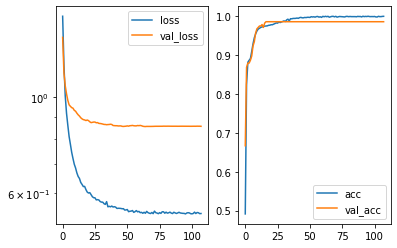

Predicted cell: Cells Probability: [[0.9960452]]
True Cell type: Cells
x [[0.39169532]]
True positional value x 0.5
y [[0.46867958]]
True positional value y 0.5


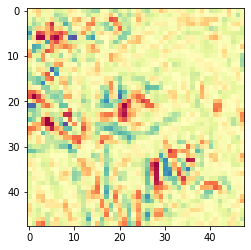

Epoch 109/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5412 - acc: 0.9988 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00109: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562177528828492, 'val_acc': 0.9853479884046338, 'loss': 0.5411850237017893, 'acc': 0.9988416999463409, 'lr': 9.999999e-18}


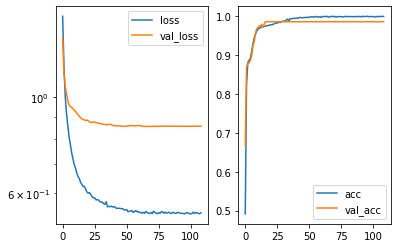

Predicted cell: Cells Probability: [[0.99608374]]
True Cell type: Cells
x [[0.39294732]]
True positional value x 0.5
y [[0.46698332]]
True positional value y 0.5


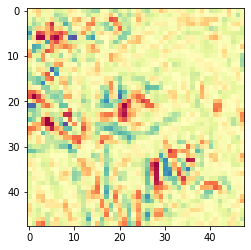

Epoch 110/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5411 - acc: 0.9981 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00110: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562925765802573, 'val_acc': 0.9853479884046338, 'loss': 0.5410572009657341, 'acc': 0.9980694987598994, 'lr': 9.999999e-18}


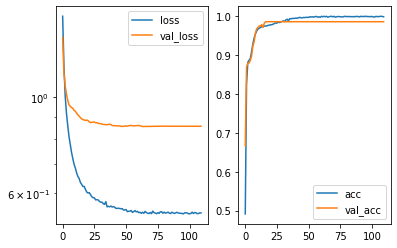

Predicted cell: Cells Probability: [[0.7847481]]
True Cell type: Cells
x [[0.51541865]]
True positional value x 0.7083333333333334
y [[0.65911543]]
True positional value y 0.7083333333333334


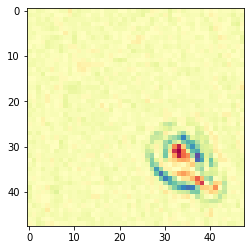

Epoch 111/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5411 - acc: 0.9981 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00111: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561666409174601, 'val_acc': 0.9853479884046338, 'loss': 0.5411407501080782, 'acc': 0.9980694987598994, 'lr': 9.999999e-18}


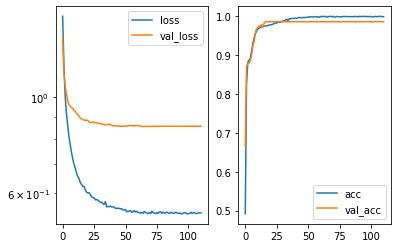

Predicted cell: Cells Probability: [[0.9973062]]
True Cell type: Cells
x [[0.3381449]]
True positional value x 0.2916666666666667
y [[0.81274873]]
True positional value y 0.7083333333333334


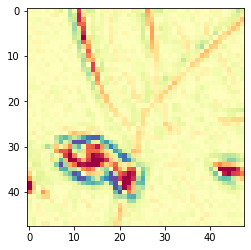

Epoch 112/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5403 - acc: 0.9985 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00112: ReduceLROnPlateau reducing learning rate to 9.999999010570977e-19.

Epoch 00112: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562730301867475, 'val_acc': 0.9853479884046338, 'loss': 0.5403360445987304, 'acc': 0.9984555999284546, 'lr': 9.999999e-18}


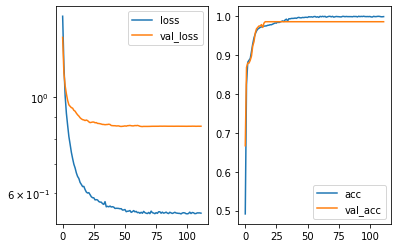

Predicted cell: Cells Probability: [[0.9820839]]
True Cell type: Cells
x [[0.790662]]
True positional value x 0.7083333333333334
y [[0.5883739]]
True positional value y 0.2916666666666667


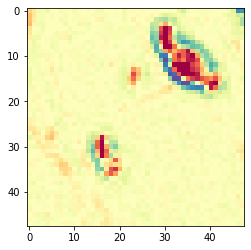

Epoch 113/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5395 - acc: 0.9992 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00113: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561516013337579, 'val_acc': 0.9853479884046338, 'loss': 0.5394628103175219, 'acc': 0.9992277999642273, 'lr': 9.999999e-19}


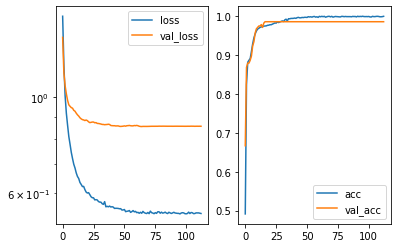

Predicted cell: Cells Probability: [[0.987623]]
True Cell type: Cells
x [[0.7646639]]
True positional value x 0.7083333333333334
y [[0.74397993]]
True positional value y 0.7083333333333334


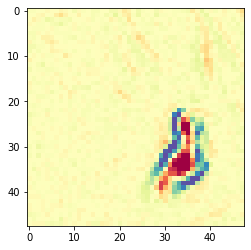

Epoch 114/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5405 - acc: 0.9988 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00114: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856260114537054, 'val_acc': 0.9853479884046338, 'loss': 0.5405039027851061, 'acc': 0.9988416999463409, 'lr': 9.999999e-19}


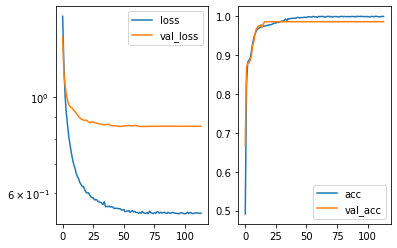

Predicted cell: Cells Probability: [[0.97666526]]
True Cell type: Cells
x [[0.5228321]]
True positional value x 0.7083333333333334
y [[0.3917191]]
True positional value y 0.2916666666666667


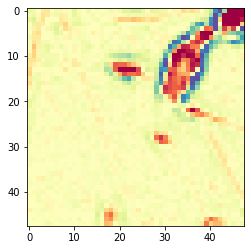

Epoch 115/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5403 - acc: 0.9994 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00115: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563784618517418, 'val_acc': 0.9853479884046338, 'loss': 0.5402603763871211, 'acc': 0.9994208499731705, 'lr': 9.999999e-19}


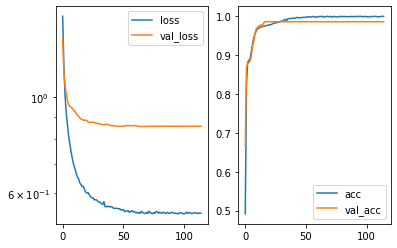

Predicted cell: Cells Probability: [[0.9973181]]
True Cell type: Cells
x [[0.33641344]]
True positional value x 0.2916666666666667
y [[0.81393564]]
True positional value y 0.7083333333333334


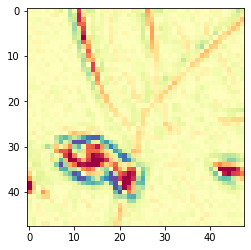

Epoch 116/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5436 - acc: 0.9983 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00116: ReduceLROnPlateau reducing learning rate to 9.999999424161285e-20.

Epoch 00116: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562346378088871, 'val_acc': 0.9853479884046338, 'loss': 0.5436311276723059, 'acc': 0.9982625499195114, 'lr': 9.999999e-19}


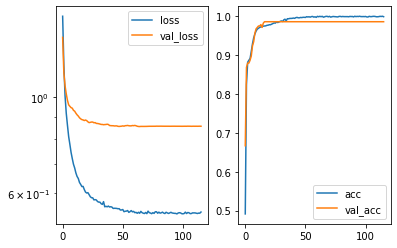

Predicted cell: Cells Probability: [[0.9917243]]
True Cell type: Cells
x [[0.5815605]]
True positional value x 0.5
y [[0.07692692]]
True positional value y 0.2916666666666667


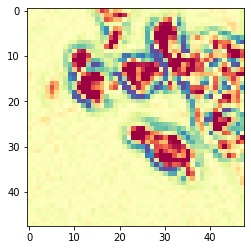

Epoch 117/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5433 - acc: 0.9986 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00117: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560784378331223, 'val_acc': 0.9853479884046338, 'loss': 0.543335746614169, 'acc': 0.9986486499373978, 'lr': 1e-19}


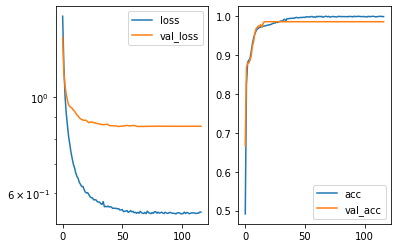

Predicted cell: Cells Probability: [[0.9542658]]
True Cell type: Cells
x [[0.733979]]
True positional value x 0.7083333333333334
y [[0.3885356]]
True positional value y 0.2916666666666667


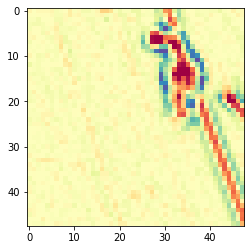

Epoch 118/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5404 - acc: 0.9986 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00118: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561504804171048, 'val_acc': 0.9853479884046338, 'loss': 0.5403596183508059, 'acc': 0.9986486499373978, 'lr': 1e-19}


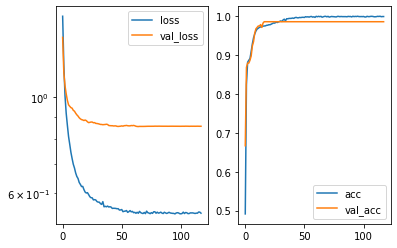

Predicted cell: Cells Probability: [[0.96942407]]
True Cell type: Cells
x [[0.16849706]]
True positional value x 0.5
y [[0.43524233]]
True positional value y 0.2916666666666667


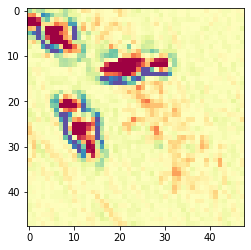

Epoch 119/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5409 - acc: 0.9988 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00119: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8558716747786973, 'val_acc': 0.9853479884046338, 'loss': 0.54086975747554, 'acc': 0.9988416999463409, 'lr': 1e-19}


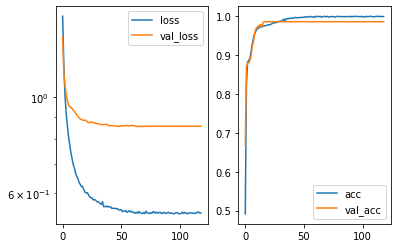

Predicted cell: Cells Probability: [[0.87727684]]
True Cell type: Cells
x [[0.57745355]]
True positional value x 0.7083333333333334
y [[0.36434403]]
True positional value y 0.2916666666666667


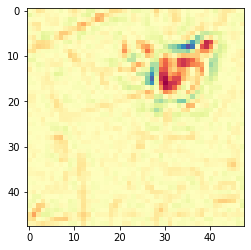

Epoch 120/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5423 - acc: 0.9985 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00120: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-21.

Epoch 00120: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561763204497732, 'val_acc': 0.9853479884046338, 'loss': 0.5423356453424255, 'acc': 0.9984555999284546, 'lr': 1e-19}


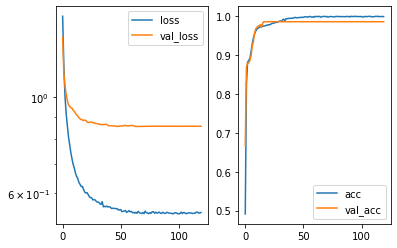

Predicted cell: Cells Probability: [[0.9808318]]
True Cell type: Cells
x [[0.68577886]]
True positional value x 0.7083333333333334
y [[0.37823877]]
True positional value y 0.2916666666666667


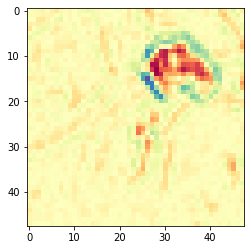

Epoch 121/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5423 - acc: 0.9983 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00121: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562383332968632, 'val_acc': 0.9853479884046338, 'loss': 0.542340395763574, 'acc': 0.9982625499195114, 'lr': 1e-20}


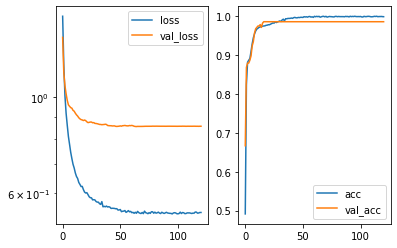

Predicted cell: Cells Probability: [[0.99609935]]
True Cell type: Cells
x [[0.27082005]]
True positional value x 0.2916666666666667
y [[0.31963968]]
True positional value y 0.5


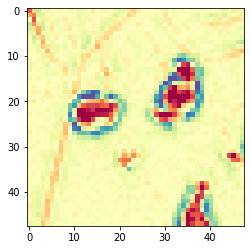

Epoch 122/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5415 - acc: 0.9986 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00122: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564743384336814, 'val_acc': 0.9853479884046338, 'loss': 0.5414699171040509, 'acc': 0.9986486499373978, 'lr': 1e-20}


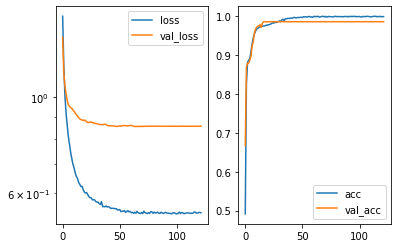

Predicted cell: Cells Probability: [[0.9723317]]
True Cell type: Cells
x [[0.09370445]]
True positional value x 0.5
y [[0.85790986]]
True positional value y 0.7083333333333334


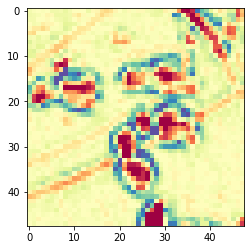

Epoch 123/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5458 - acc: 0.9969 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00123: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563168743154504, 'val_acc': 0.9853479884046338, 'loss': 0.5458066449662433, 'acc': 0.9969111998569091, 'lr': 1e-20}


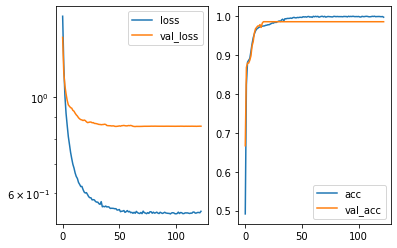

Predicted cell: Cells Probability: [[0.9946015]]
True Cell type: Cells
x [[0.6452856]]
True positional value x 0.5
y [[0.3985002]]
True positional value y 0.7083333333333334


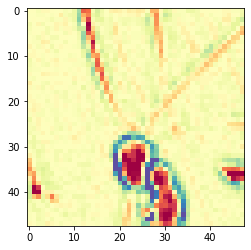

Epoch 124/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5397 - acc: 0.9986 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00124: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-22.

Epoch 00124: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563107348187066, 'val_acc': 0.9853479884046338, 'loss': 0.5396964352103274, 'acc': 0.9986486499373978, 'lr': 1e-20}


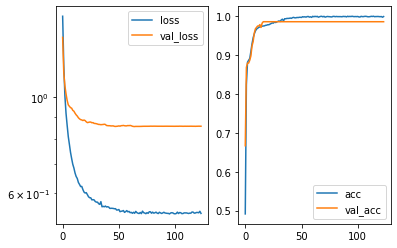

Predicted cell: Cells Probability: [[0.9684175]]
True Cell type: Cells
x [[0.6636189]]
True positional value x 0.7083333333333334
y [[0.36368725]]
True positional value y 0.5


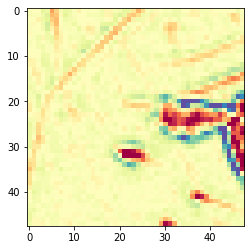

Epoch 125/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5403 - acc: 0.9992 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00125: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562465342846546, 'val_acc': 0.9853479884046338, 'loss': 0.5403449210881266, 'acc': 0.9992277999642273, 'lr': 1e-21}


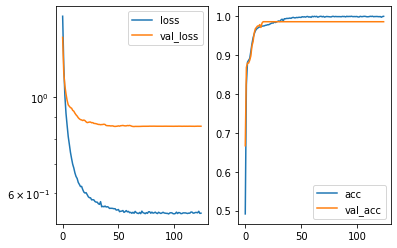

Predicted cell: Cells Probability: [[0.9947187]]
True Cell type: Cells
x [[0.25703666]]
True positional value x 0.2916666666666667
y [[0.83336806]]
True positional value y 0.5


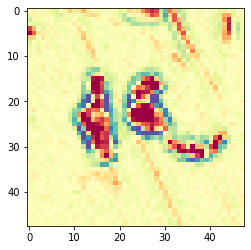

Epoch 126/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5400 - acc: 0.9990 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00126: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563102968446501, 'val_acc': 0.9853479884046338, 'loss': 0.5399896458769397, 'acc': 0.9990347499552841, 'lr': 1e-21}


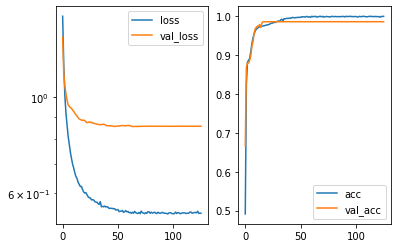

Predicted cell: Cells Probability: [[0.9297778]]
True Cell type: Cells
x [[0.83486646]]
True positional value x 0.7083333333333334
y [[0.47625706]]
True positional value y 0.7083333333333334


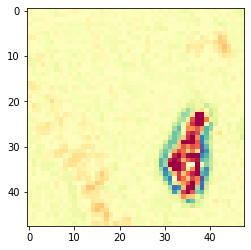

Epoch 127/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5389 - acc: 0.9988 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00127: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562219042481084, 'val_acc': 0.9853479884046338, 'loss': 0.5389130564269872, 'acc': 0.9988416999463409, 'lr': 1e-21}


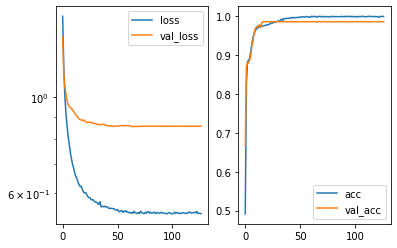

Predicted cell: Cells Probability: [[0.98117584]]
True Cell type: Cells
x [[0.7785114]]
True positional value x 0.7083333333333334
y [[0.2201482]]
True positional value y 0.2916666666666667


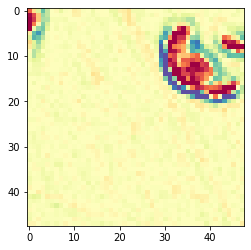

Epoch 128/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5427 - acc: 0.9983 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00128: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-23.

Epoch 00128: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561803006427192, 'val_acc': 0.9853479884046338, 'loss': 0.5427157653344644, 'acc': 0.9982625499195114, 'lr': 1e-21}


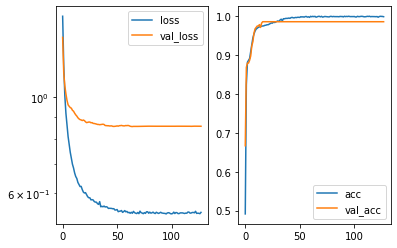

Predicted cell: Normal Probability: [[0.9264305]]
True Cell type: Normal
x [[0.26105854]]
True positional value x 0.5
y [[0.60962754]]
True positional value y 0.5


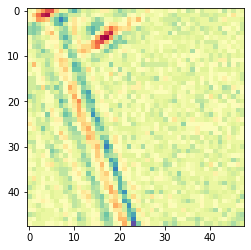

Epoch 129/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5396 - acc: 0.9990 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00129: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560833428805564, 'val_acc': 0.9853479884046338, 'loss': 0.5396239242038211, 'acc': 0.9990347499552841, 'lr': 9.9999997e-23}


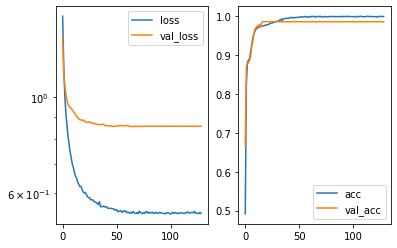

Predicted cell: Cells Probability: [[0.9918663]]
True Cell type: Cells
x [[0.6524177]]
True positional value x 0.7083333333333334
y [[0.55092967]]
True positional value y 0.5


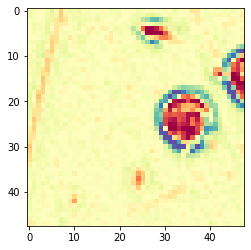

Epoch 130/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5432 - acc: 0.9985 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00130: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563083733394469, 'val_acc': 0.9853479884046338, 'loss': 0.5431603342870027, 'acc': 0.9984555999284546, 'lr': 9.9999997e-23}


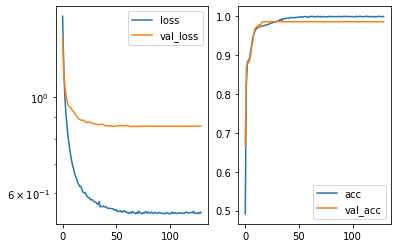

Predicted cell: Cells Probability: [[0.9769344]]
True Cell type: Cells
x [[0.6035298]]
True positional value x 0.5
y [[0.43811733]]
True positional value y 0.2916666666666667


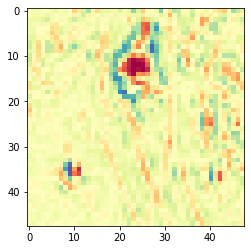

Epoch 131/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5399 - acc: 0.9990 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00131: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561101645340413, 'val_acc': 0.9853479884046338, 'loss': 0.5399465185795052, 'acc': 0.9990347499552841, 'lr': 9.9999997e-23}


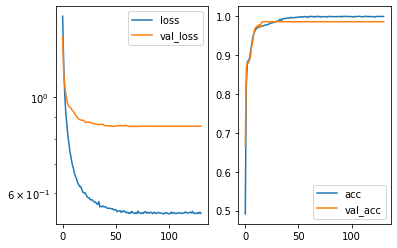

Predicted cell: Cells Probability: [[0.9958657]]
True Cell type: Cells
x [[0.7021897]]
True positional value x 0.7083333333333334
y [[0.39771956]]
True positional value y 0.5


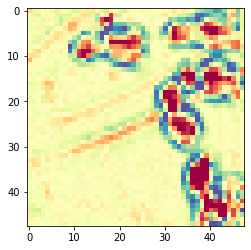

Epoch 132/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5431 - acc: 0.9975 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00132: ReduceLROnPlateau reducing learning rate to 9.999999682655227e-24.

Epoch 00132: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562327902832311, 'val_acc': 0.9853479884046338, 'loss': 0.5431403994099974, 'acc': 0.9974903498837386, 'lr': 9.9999997e-23}


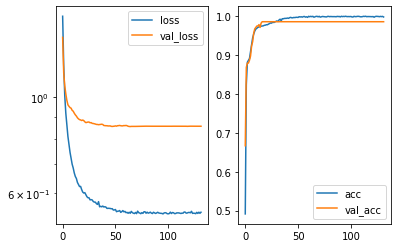

Predicted cell: Cells Probability: [[0.99235755]]
True Cell type: Cells
x [[0.4533764]]
True positional value x 0.7083333333333334
y [[0.37671155]]
True positional value y 0.7083333333333334


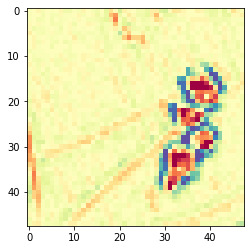

Epoch 133/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5408 - acc: 0.9985 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00133: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561304536931243, 'val_acc': 0.9853479884046338, 'loss': 0.5407716707833485, 'acc': 0.9984555999284546, 'lr': 1e-23}


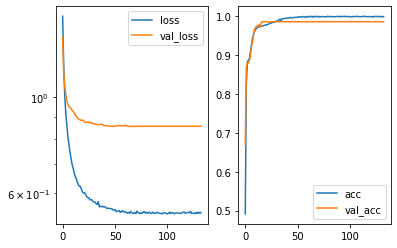

Predicted cell: Cells Probability: [[0.98548687]]
True Cell type: Cells
x [[0.79417706]]
True positional value x 0.7083333333333334
y [[0.16488124]]
True positional value y 0.2916666666666667


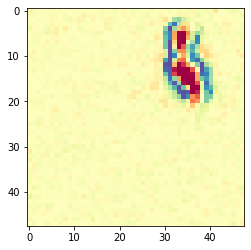

Epoch 134/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5429 - acc: 0.9969 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00134: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560885077431089, 'val_acc': 0.9853479884046338, 'loss': 0.5429102493068887, 'acc': 0.9969111998569091, 'lr': 1e-23}


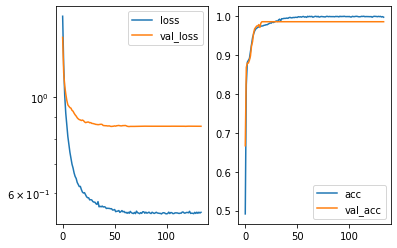

Predicted cell: Cells Probability: [[0.9866419]]
True Cell type: Cells
x [[0.4962736]]
True positional value x 0.2916666666666667
y [[0.854454]]
True positional value y 0.7083333333333334


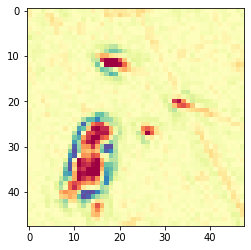

Epoch 135/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5385 - acc: 0.9996 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00135: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856099606870295, 'val_acc': 0.9853479884046338, 'loss': 0.5385372056463971, 'acc': 0.9996138999821136, 'lr': 1e-23}


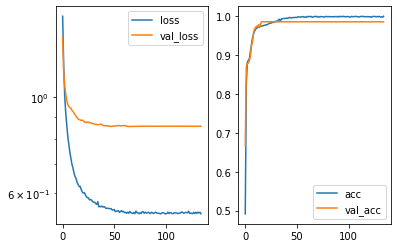

Predicted cell: Cells Probability: [[0.9857305]]
True Cell type: Cells
x [[0.50537425]]
True positional value x 0.2916666666666667
y [[0.49390587]]
True positional value y 0.7083333333333334


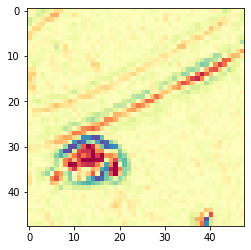

Epoch 136/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5411 - acc: 0.9986 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00136: ReduceLROnPlateau reducing learning rate to 9.999999998199588e-25.

Epoch 00136: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561178367216509, 'val_acc': 0.9853479884046338, 'loss': 0.5410574055546499, 'acc': 0.9986486499373978, 'lr': 1e-23}


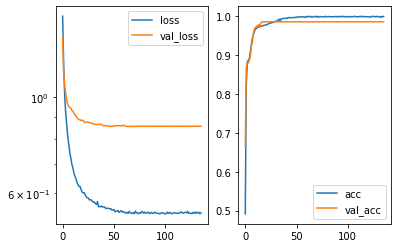

Predicted cell: Cells Probability: [[0.99532324]]
True Cell type: Cells
x [[0.88635266]]
True positional value x 0.7083333333333334
y [[0.12088192]]
True positional value y 0.2916666666666667


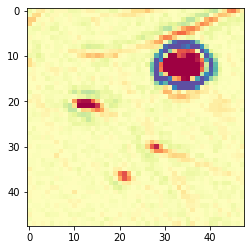

Epoch 137/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5426 - acc: 0.9983 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00137: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560271581887325, 'val_acc': 0.9853479884046338, 'loss': 0.5426219798423149, 'acc': 0.9982625476181737, 'lr': 1e-24}


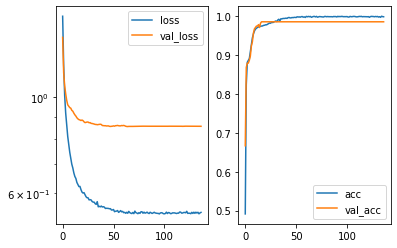

Predicted cell: Cells Probability: [[0.96823055]]
True Cell type: Cells
x [[0.6644042]]
True positional value x 0.7083333333333334
y [[0.3636655]]
True positional value y 0.5


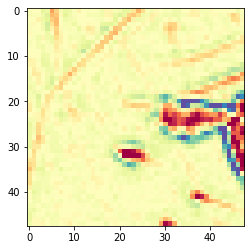

Epoch 138/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5405 - acc: 0.9988 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00138: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560838948239337, 'val_acc': 0.9853479884046338, 'loss': 0.5404626526887812, 'acc': 0.9988416999463409, 'lr': 1e-24}


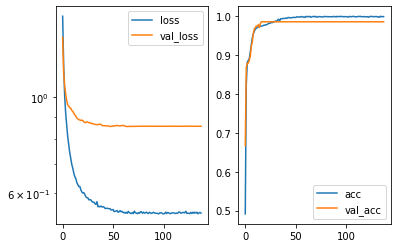

Predicted cell: Cells Probability: [[0.9724653]]
True Cell type: Cells
x [[0.0935918]]
True positional value x 0.5
y [[0.85594016]]
True positional value y 0.7083333333333334


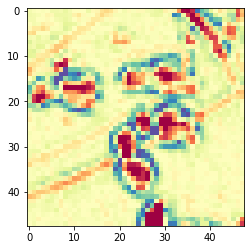

Epoch 139/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5402 - acc: 0.9985 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00139: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559255071612069, 'val_acc': 0.9853479884046338, 'loss': 0.5402370026212862, 'acc': 0.9984555999284546, 'lr': 1e-24}


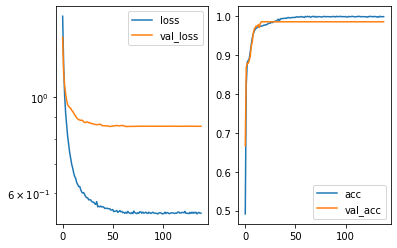

Predicted cell: Cells Probability: [[0.9943967]]
True Cell type: Cells
x [[0.47543222]]
True positional value x 0.5
y [[0.66585237]]
True positional value y 0.7083333333333334


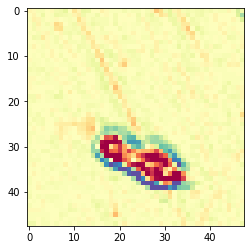

Epoch 140/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5404 - acc: 0.9986 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00140: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-25.

Epoch 00140: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560480599874979, 'val_acc': 0.9853479884046338, 'loss': 0.5404454616966395, 'acc': 0.9986486499373978, 'lr': 1e-24}


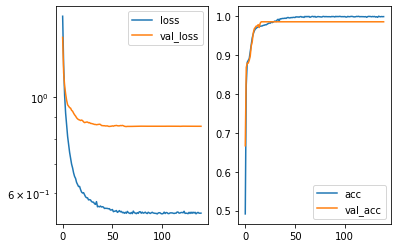

Predicted cell: Cells Probability: [[0.9822965]]
True Cell type: Cells
x [[0.79730177]]
True positional value x 0.7083333333333334
y [[0.37423235]]
True positional value y 0.2916666666666667


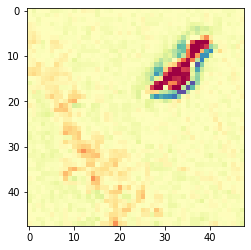

Epoch 141/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5426 - acc: 0.9973 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00141: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563588752851381, 'val_acc': 0.9853479884046338, 'loss': 0.5426114795290825, 'acc': 0.9972972975734579, 'lr': 1e-25}


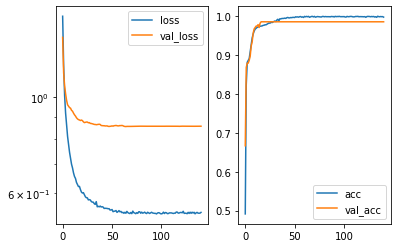

Predicted cell: Cells Probability: [[0.99551266]]
True Cell type: Cells
x [[0.3491147]]
True positional value x 0.7083333333333334
y [[0.5275812]]
True positional value y 0.5


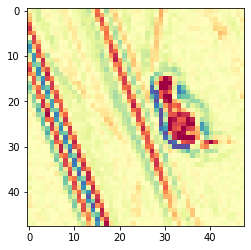

Epoch 142/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5433 - acc: 0.9983 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00142: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564461334284409, 'val_acc': 0.9853479884046338, 'loss': 0.5433379761500708, 'acc': 0.9982625499195114, 'lr': 1e-25}


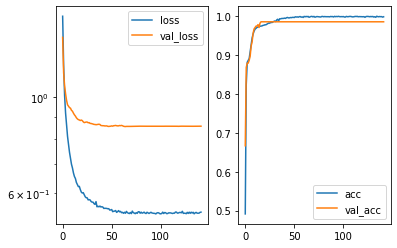

Predicted cell: Normal Probability: [[0.9712676]]
True Cell type: Normal
x [[0.5880805]]
True positional value x 0.5
y [[0.5953399]]
True positional value y 0.5


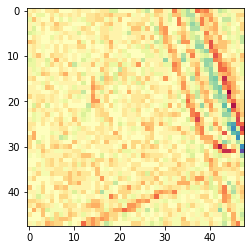

Epoch 143/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5401 - acc: 0.9983 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00143: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563513947930528, 'val_acc': 0.9853479884046338, 'loss': 0.5400879401497859, 'acc': 0.9982625499195114, 'lr': 1e-25}


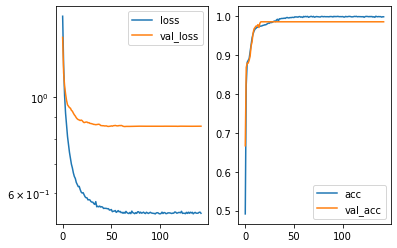

Predicted cell: Cells Probability: [[0.9887339]]
True Cell type: Cells
x [[0.6430918]]
True positional value x 0.5
y [[0.24058875]]
True positional value y 0.2916666666666667


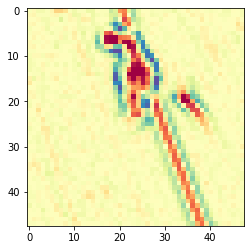

Epoch 144/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5434 - acc: 0.9977 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00144: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-26.

Epoch 00144: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563439116809831, 'val_acc': 0.9853479884046338, 'loss': 0.5433519089083874, 'acc': 0.9976833998926818, 'lr': 1e-25}


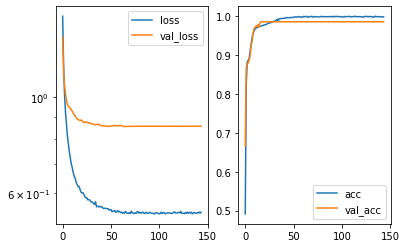

Predicted cell: Cells Probability: [[0.9923139]]
True Cell type: Cells
x [[0.2053021]]
True positional value x 0.2916666666666667
y [[0.6842469]]
True positional value y 0.7083333333333334


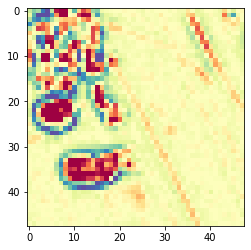

Epoch 145/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5413 - acc: 0.9985 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00145: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563868239685729, 'val_acc': 0.9853479884046338, 'loss': 0.5412509358527577, 'acc': 0.9984555999284546, 'lr': 1e-26}


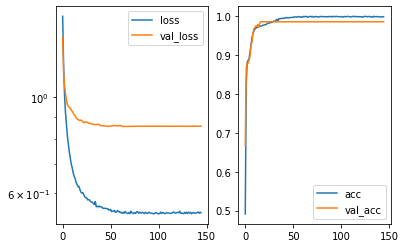

Predicted cell: Cells Probability: [[0.9945873]]
True Cell type: Cells
x [[0.64580756]]
True positional value x 0.5
y [[0.39750868]]
True positional value y 0.7083333333333334


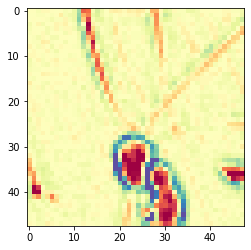

Epoch 146/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5413 - acc: 0.9988 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00146: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564435199940161, 'val_acc': 0.9853479884046338, 'loss': 0.5413380799146232, 'acc': 0.9988416999463409, 'lr': 1e-26}


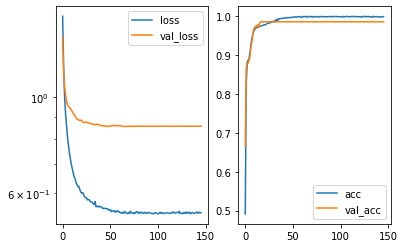

Predicted cell: Cells Probability: [[0.9176296]]
True Cell type: Cells
x [[0.45742214]]
True positional value x 0.2916666666666667
y [[0.6695055]]
True positional value y 0.7083333333333334


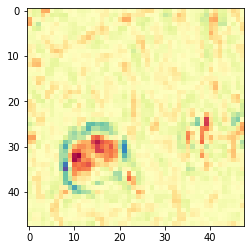

Epoch 147/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5400 - acc: 0.9986 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00147: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561648903312263, 'val_acc': 0.9853479884046338, 'loss': 0.5399740561555251, 'acc': 0.9986486499373978, 'lr': 1e-26}


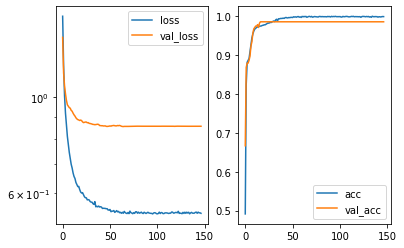

Predicted cell: Cells Probability: [[0.9943851]]
True Cell type: Cells
x [[0.65190756]]
True positional value x 0.5
y [[0.3927999]]
True positional value y 0.2916666666666667


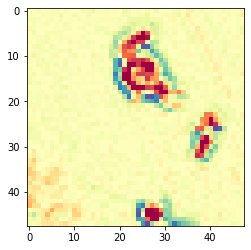

Epoch 148/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5426 - acc: 0.9979 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00148: ReduceLROnPlateau reducing learning rate to 9.999999887266024e-28.

Epoch 00148: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562524794658899, 'val_acc': 0.9853479884046338, 'loss': 0.5425543720657761, 'acc': 0.997876449901625, 'lr': 1e-26}


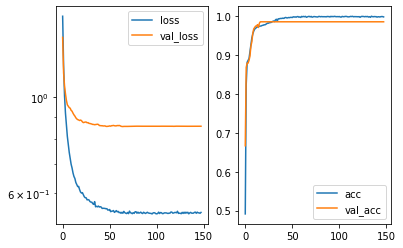

Predicted cell: Cells Probability: [[0.98857075]]
True Cell type: Cells
x [[0.70415294]]
True positional value x 0.7083333333333334
y [[0.28521284]]
True positional value y 0.2916666666666667


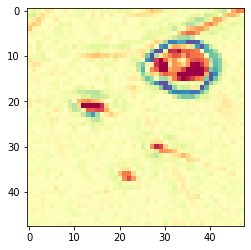

Epoch 149/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5394 - acc: 0.9994 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00149: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561868698169024, 'val_acc': 0.9853479884046338, 'loss': 0.5394310541594811, 'acc': 0.9994208499731705, 'lr': 1e-27}


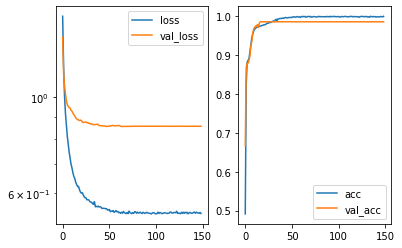

Predicted cell: Cells Probability: [[0.9797934]]
True Cell type: Cells
x [[0.2589927]]
True positional value x 0.5
y [[0.19032176]]
True positional value y 0.2916666666666667


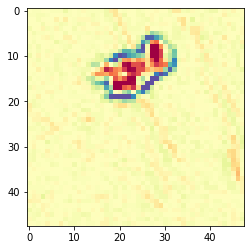

Epoch 150/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5397 - acc: 0.9992 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00150: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559813765815762, 'val_acc': 0.9853479884046338, 'loss': 0.5396588235288053, 'acc': 0.9992277999642273, 'lr': 1e-27}


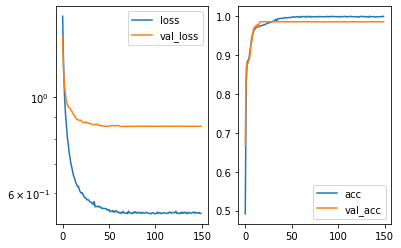

Predicted cell: Cells Probability: [[0.98811454]]
True Cell type: Cells
x [[0.79704326]]
True positional value x 0.7083333333333334
y [[0.34236062]]
True positional value y 0.5


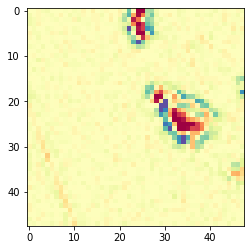

Epoch 151/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5385 - acc: 0.9990 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00151: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561832751983252, 'val_acc': 0.9853479884046338, 'loss': 0.5385312276917535, 'acc': 0.9990347499552841, 'lr': 1e-27}


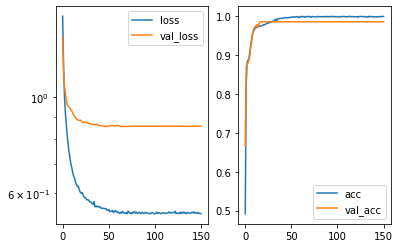

Predicted cell: Cells Probability: [[0.99825794]]
True Cell type: Cells
x [[0.35911483]]
True positional value x 0.2916666666666667
y [[0.68657637]]
True positional value y 0.7083333333333334


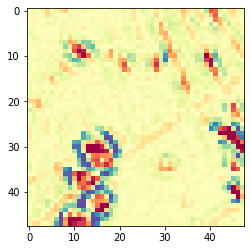

Epoch 152/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5418 - acc: 0.9979 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00152: ReduceLROnPlateau reducing learning rate to 1.0000000272452012e-28.

Epoch 00152: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559462941173233, 'val_acc': 0.9853479884046338, 'loss': 0.54183490810247, 'acc': 0.997876449901625, 'lr': 1e-27}


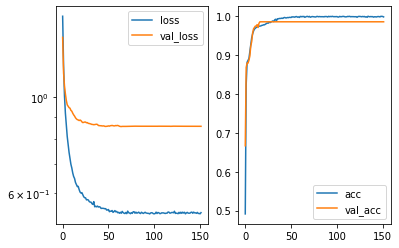

Predicted cell: Normal Probability: [[0.98630595]]
True Cell type: Normal
x [[0.5770659]]
True positional value x 0.5
y [[0.4323044]]
True positional value y 0.5


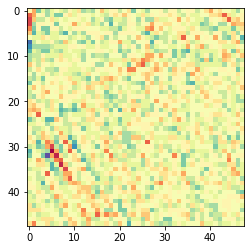

Epoch 153/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5379 - acc: 0.9990 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00153: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559296528498331, 'val_acc': 0.9853479884046338, 'loss': 0.5379056224031338, 'acc': 0.9990347499552841, 'lr': 1e-28}


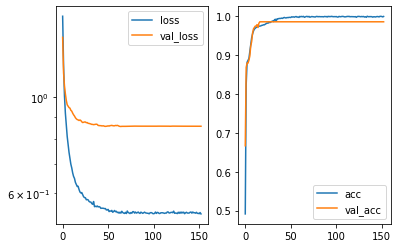

Predicted cell: Cells Probability: [[0.99412715]]
True Cell type: Cells
x [[0.52487046]]
True positional value x 0.5
y [[0.31066352]]
True positional value y 0.2916666666666667


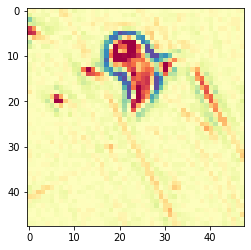

Epoch 154/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5409 - acc: 0.9979 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00154: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561436204246549, 'val_acc': 0.9853479884046338, 'loss': 0.540936490743777, 'acc': 0.9978764487509562, 'lr': 1e-28}


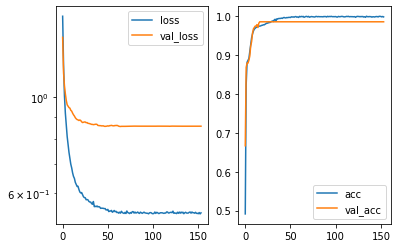

Predicted cell: Cells Probability: [[0.9987924]]
True Cell type: Cells
x [[0.67640525]]
True positional value x 0.7083333333333334
y [[0.597471]]
True positional value y 0.2916666666666667


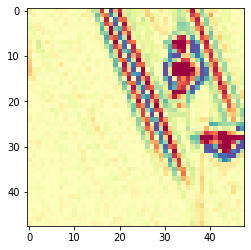

Epoch 155/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5414 - acc: 0.9981 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00155: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.855959646431081, 'val_acc': 0.9853479884046338, 'loss': 0.5414288518051383, 'acc': 0.9980694999105681, 'lr': 1e-28}


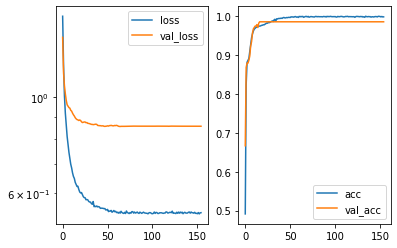

Predicted cell: Cells Probability: [[0.9947404]]
True Cell type: Cells
x [[0.73720896]]
True positional value x 0.7083333333333334
y [[0.4239372]]
True positional value y 0.7083333333333334


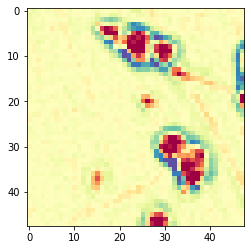

Epoch 156/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5397 - acc: 0.9981 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00156: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560118552965995, 'val_acc': 0.9853479884046338, 'loss': 0.5397031845733465, 'acc': 0.9980694999105681, 'lr': 1e-28}


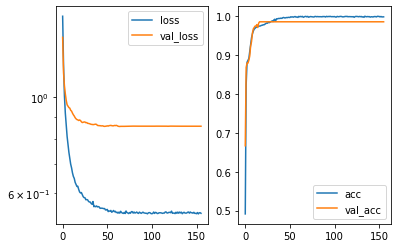

Predicted cell: Cells Probability: [[0.99228936]]
True Cell type: Cells
x [[0.45211127]]
True positional value x 0.2916666666666667
y [[0.74293804]]
True positional value y 0.7083333333333334


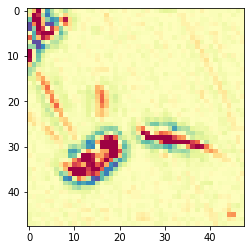

Epoch 157/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5425 - acc: 0.9979 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00157: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-29.

Epoch 00157: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562892426501264, 'val_acc': 0.9853479884046338, 'loss': 0.5424881075800155, 'acc': 0.997876449901625, 'lr': 1e-28}


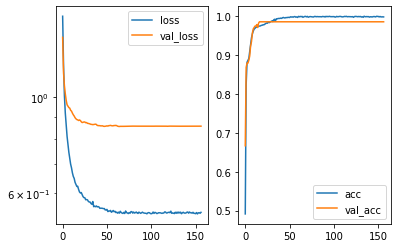

Predicted cell: Cells Probability: [[0.98853594]]
True Cell type: Cells
x [[0.59199715]]
True positional value x 0.5
y [[0.77674437]]
True positional value y 0.7083333333333334


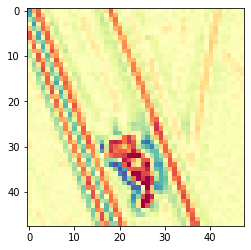

Epoch 158/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5433 - acc: 0.9969 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00158: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561784138172974, 'val_acc': 0.9853479884046338, 'loss': 0.5433073481077393, 'acc': 0.9969111987062402, 'lr': 1e-29}


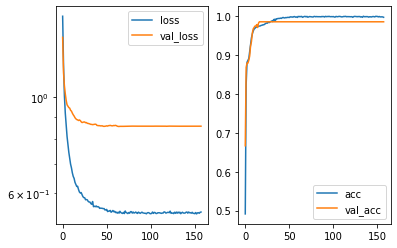

Predicted cell: Cells Probability: [[0.9893243]]
True Cell type: Cells
x [[0.3731643]]
True positional value x 0.7083333333333334
y [[0.58750266]]
True positional value y 0.5


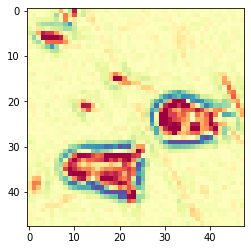

Epoch 159/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5416 - acc: 0.9979 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00159: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562614782389267, 'val_acc': 0.9853479884046338, 'loss': 0.5415931652411531, 'acc': 0.997876449901625, 'lr': 1e-29}


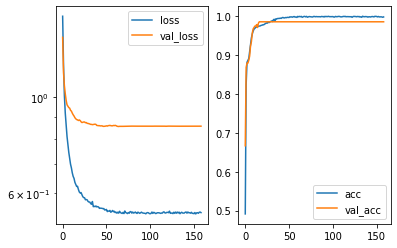

Predicted cell: Cells Probability: [[0.99239784]]
True Cell type: Cells
x [[0.4532077]]
True positional value x 0.7083333333333334
y [[0.37702057]]
True positional value y 0.7083333333333334


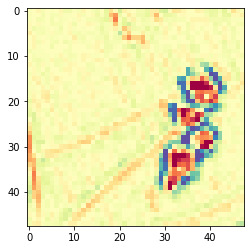

Epoch 160/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5409 - acc: 0.9979 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00160: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563606673544579, 'val_acc': 0.9853479884046338, 'loss': 0.5408587508680277, 'acc': 0.997876449901625, 'lr': 1e-29}


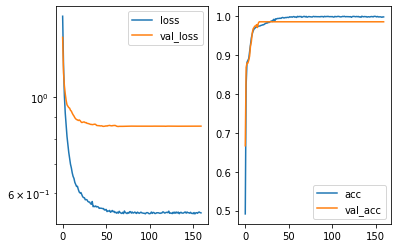

Predicted cell: Normal Probability: [[0.9840066]]
True Cell type: Normal
x [[0.48607543]]
True positional value x 0.5
y [[0.62402856]]
True positional value y 0.5


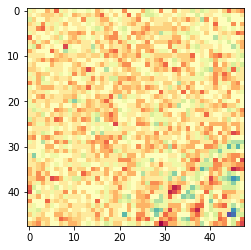

Epoch 161/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5449 - acc: 0.9969 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00161: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-30.

Epoch 00161: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564323130108061, 'val_acc': 0.9853479884046338, 'loss': 0.5449150195453157, 'acc': 0.9969111998569091, 'lr': 1e-29}


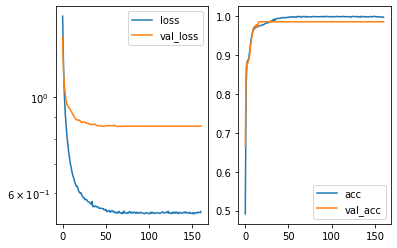

Predicted cell: Cells Probability: [[0.97682744]]
True Cell type: Cells
x [[0.17324235]]
True positional value x 0.5
y [[0.4715065]]
True positional value y 0.7083333333333334


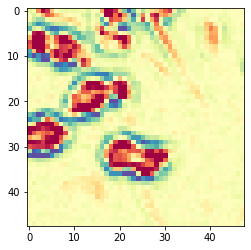

Epoch 162/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5391 - acc: 0.9988 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00162: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562168520448845, 'val_acc': 0.9853479884046338, 'loss': 0.539146447503889, 'acc': 0.9988416999463409, 'lr': 1e-30}


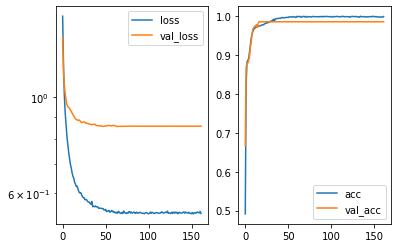

Predicted cell: Cells Probability: [[0.9799009]]
True Cell type: Cells
x [[0.25822222]]
True positional value x 0.5
y [[0.18999787]]
True positional value y 0.2916666666666667


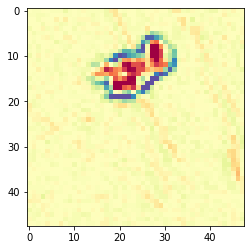

Epoch 163/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5407 - acc: 0.9977 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00163: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561633759802514, 'val_acc': 0.9853479884046338, 'loss': 0.5406985809904268, 'acc': 0.9976833998926818, 'lr': 1e-30}


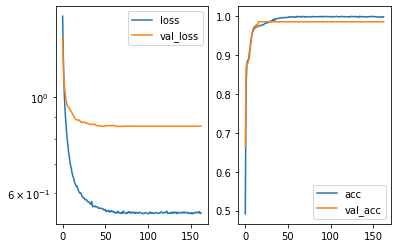

Predicted cell: Cells Probability: [[0.9802289]]
True Cell type: Cells
x [[0.41020924]]
True positional value x 0.7083333333333334
y [[0.34859124]]
True positional value y 0.5


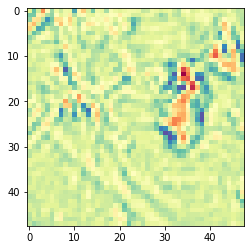

Epoch 164/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5391 - acc: 0.9988 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00164: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561333055461283, 'val_acc': 0.9853479884046338, 'loss': 0.5390880749952839, 'acc': 0.9988416999463409, 'lr': 1e-30}


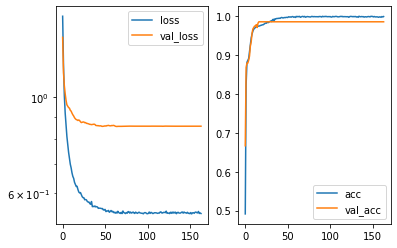

Predicted cell: Cells Probability: [[0.9930219]]
True Cell type: Cells
x [[0.20377016]]
True positional value x 0.2916666666666667
y [[0.5463449]]
True positional value y 0.2916666666666667


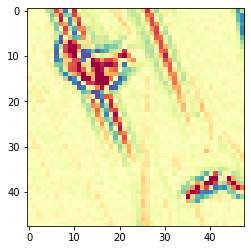

Epoch 165/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5391 - acc: 0.9990 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00165: ReduceLROnPlateau reducing learning rate to 1.000000003171077e-31.

Epoch 00165: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561163223706759, 'val_acc': 0.9853479884046338, 'loss': 0.5391160760607038, 'acc': 0.9990347499552841, 'lr': 1e-30}


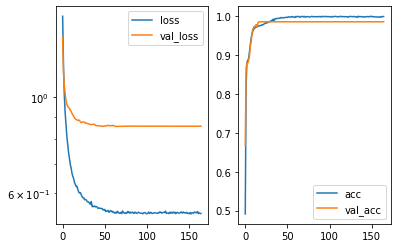

Predicted cell: Cells Probability: [[0.9894707]]
True Cell type: Cells
x [[0.57519734]]
True positional value x 0.2916666666666667
y [[0.68280494]]
True positional value y 0.7083333333333334


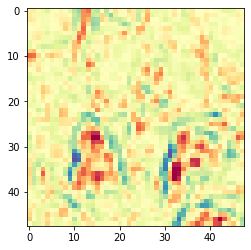

Epoch 166/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5426 - acc: 0.9985 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00166: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560681845242287, 'val_acc': 0.9853479884046338, 'loss': 0.5426426456241534, 'acc': 0.9984555999284546, 'lr': 1e-31}


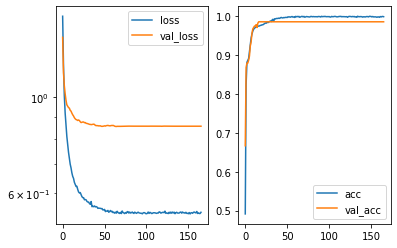

Predicted cell: Cells Probability: [[0.8726926]]
True Cell type: Cells
x [[0.37716636]]
True positional value x 0.2916666666666667
y [[0.50303733]]
True positional value y 0.2916666666666667


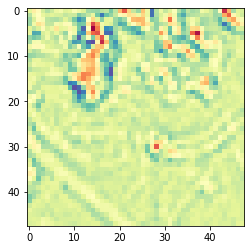

Epoch 167/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5440 - acc: 0.9973 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00167: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561804106820634, 'val_acc': 0.9853479884046338, 'loss': 0.5439877496262775, 'acc': 0.9972972998747954, 'lr': 1e-31}


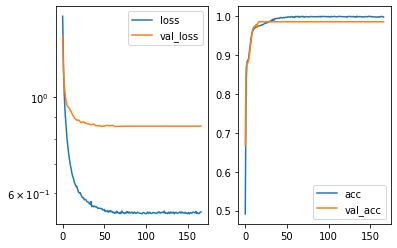

Predicted cell: Normal Probability: [[0.97135407]]
True Cell type: Normal
x [[0.5876972]]
True positional value x 0.5
y [[0.59601176]]
True positional value y 0.5


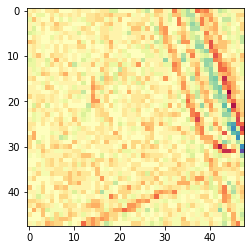

Epoch 168/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5433 - acc: 0.9979 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00168: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560215147423657, 'val_acc': 0.9853479884046338, 'loss': 0.5432526183864785, 'acc': 0.997876449901625, 'lr': 1e-31}


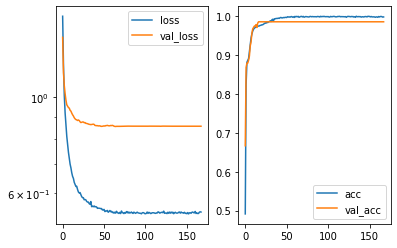

Predicted cell: Normal Probability: [[0.96885747]]
True Cell type: Normal
x [[0.5001312]]
True positional value x 0.5
y [[0.46413052]]
True positional value y 0.5


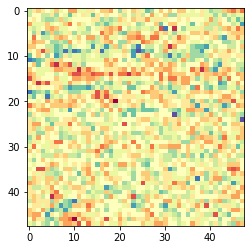

Epoch 169/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5414 - acc: 0.9990 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00169: ReduceLROnPlateau reducing learning rate to 9.999999796611899e-33.

Epoch 00169: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559314706823328, 'val_acc': 0.9853479884046338, 'loss': 0.5414301596553169, 'acc': 0.9990347499552841, 'lr': 1e-31}


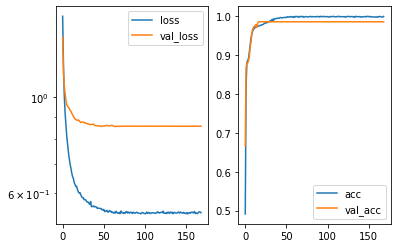

Predicted cell: Cells Probability: [[0.97984135]]
True Cell type: Cells
x [[0.45827958]]
True positional value x 0.5
y [[0.56895524]]
True positional value y 0.5


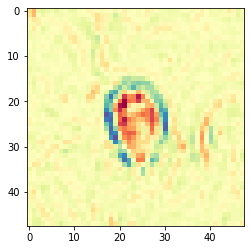

Epoch 170/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5440 - acc: 0.9961 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00170: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561831193092542, 'val_acc': 0.9853479884046338, 'loss': 0.5439996095697852, 'acc': 0.9961389986704675, 'lr': 9.9999995e-33}


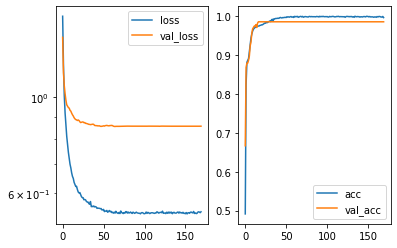

Predicted cell: Cells Probability: [[0.99418724]]
True Cell type: Cells
x [[0.36259174]]
True positional value x 0.2916666666666667
y [[0.45395446]]
True positional value y 0.5


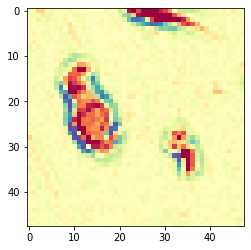

Epoch 171/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5404 - acc: 0.9990 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00171: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562703460127443, 'val_acc': 0.9853479884046338, 'loss': 0.5403677855679427, 'acc': 0.9990347499552841, 'lr': 9.9999995e-33}


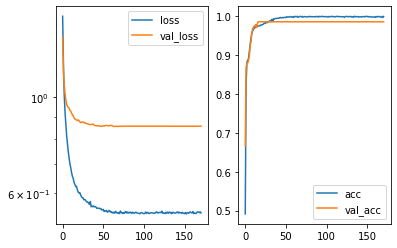

Predicted cell: Cells Probability: [[0.9980578]]
True Cell type: Cells
x [[0.37329328]]
True positional value x 0.2916666666666667
y [[0.41839185]]
True positional value y 0.7083333333333334


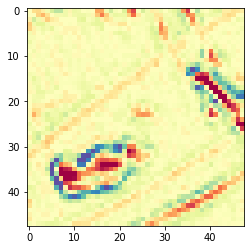

Epoch 172/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5429 - acc: 0.9977 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00172: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563017159591227, 'val_acc': 0.9853479884046338, 'loss': 0.5429167689964117, 'acc': 0.997683398742013, 'lr': 9.9999995e-33}


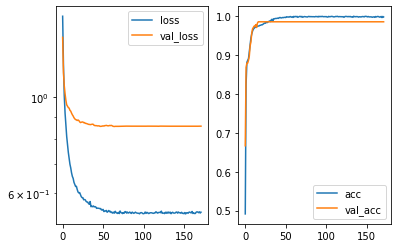

Predicted cell: Cells Probability: [[0.994762]]
True Cell type: Cells
x [[0.7359743]]
True positional value x 0.7083333333333334
y [[0.4236714]]
True positional value y 0.7083333333333334


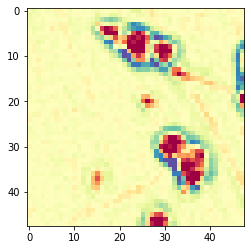

Epoch 173/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5395 - acc: 0.9994 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00173: ReduceLROnPlateau reducing learning rate to 9.999999502738312e-34.

Epoch 00173: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563420676486396, 'val_acc': 0.9853479884046338, 'loss': 0.5394748555187093, 'acc': 0.9994208499731705, 'lr': 9.9999995e-33}


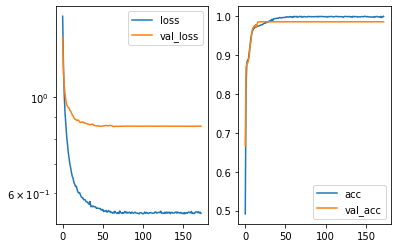

Predicted cell: Cells Probability: [[0.99290437]]
True Cell type: Cells
x [[0.4128417]]
True positional value x 0.5
y [[0.15493721]]
True positional value y 0.2916666666666667


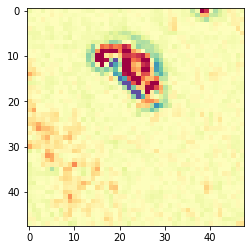

Epoch 174/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5411 - acc: 0.9988 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00174: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561778998636937, 'val_acc': 0.9853479884046338, 'loss': 0.5410609615815652, 'acc': 0.9988416999463409, 'lr': 9.999999e-34}


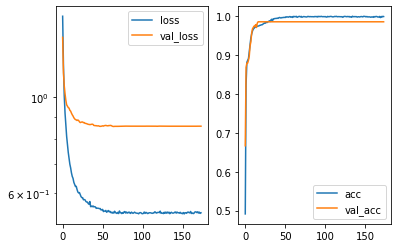

Predicted cell: Cells Probability: [[0.9911232]]
True Cell type: Cells
x [[0.26910955]]
True positional value x 0.2916666666666667
y [[0.21309386]]
True positional value y 0.2916666666666667


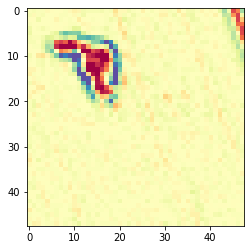

Epoch 175/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5424 - acc: 0.9977 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00175: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560979597734444, 'val_acc': 0.9853479884046338, 'loss': 0.5423994957250058, 'acc': 0.9976833998926818, 'lr': 9.999999e-34}


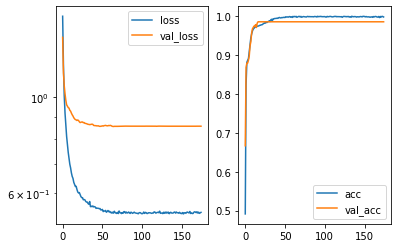

Predicted cell: Cells Probability: [[0.99558276]]
True Cell type: Cells
x [[0.59456336]]
True positional value x 0.2916666666666667
y [[0.5709774]]
True positional value y 0.5


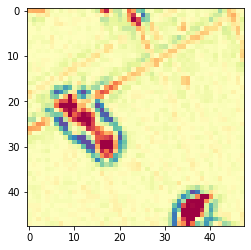

Epoch 176/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5437 - acc: 0.9979 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00176: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856354323498932, 'val_acc': 0.9853479884046338, 'loss': 0.5437497114582872, 'acc': 0.997876449901625, 'lr': 9.999999e-34}


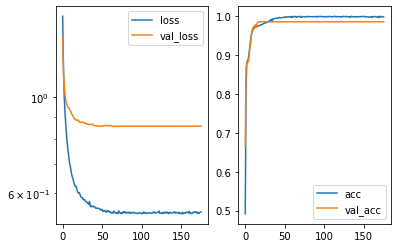

Predicted cell: Cells Probability: [[0.97805583]]
True Cell type: Cells
x [[0.5071925]]
True positional value x 0.5
y [[0.35914472]]
True positional value y 0.5


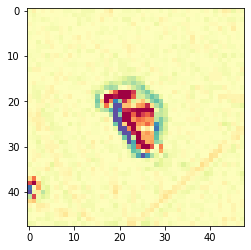

Epoch 177/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5401 - acc: 0.9988 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00177: ReduceLROnPlateau reducing learning rate to 9.999999319067318e-35.

Epoch 00177: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856383700510521, 'val_acc': 0.9853479884046338, 'loss': 0.5401108513467561, 'acc': 0.9988416999463409, 'lr': 9.999999e-34}


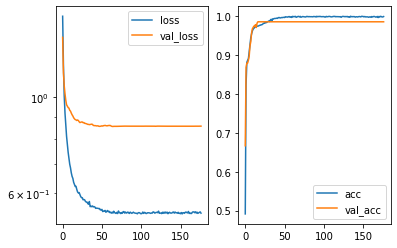

Predicted cell: Cells Probability: [[0.99662894]]
True Cell type: Cells
x [[0.2548715]]
True positional value x 0.7083333333333334
y [[0.44024765]]
True positional value y 0.5


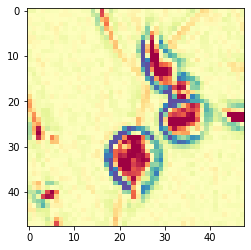

Epoch 178/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5411 - acc: 0.9986 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00178: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560971794547615, 'val_acc': 0.9853479884046338, 'loss': 0.5411031747876908, 'acc': 0.9986486499373978, 'lr': 9.999999e-35}


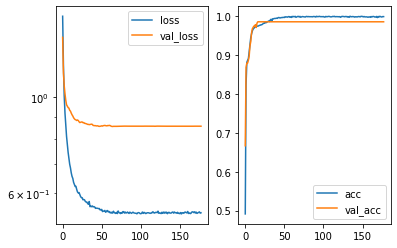

Predicted cell: Cells Probability: [[0.9966086]]
True Cell type: Cells
x [[0.54543835]]
True positional value x 0.7083333333333334
y [[0.757276]]
True positional value y 0.7083333333333334


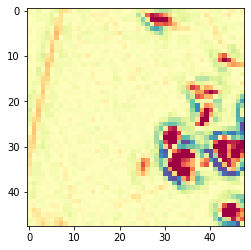

Epoch 179/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5437 - acc: 0.9975 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00179: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562454727543143, 'val_acc': 0.9853479884046338, 'loss': 0.543690810562561, 'acc': 0.9974903487330699, 'lr': 9.999999e-35}


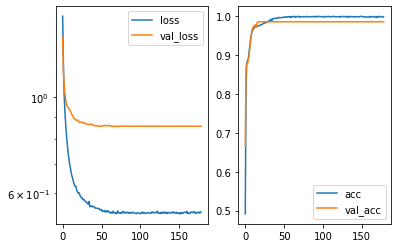

Predicted cell: Cells Probability: [[0.9886988]]
True Cell type: Cells
x [[0.28103593]]
True positional value x 0.2916666666666667
y [[0.3861178]]
True positional value y 0.5


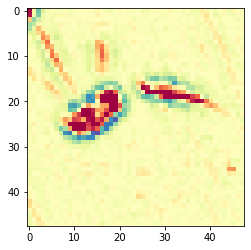

Epoch 180/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5402 - acc: 0.9983 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00180: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561202440506372, 'val_acc': 0.9853479884046338, 'loss': 0.5402262243064674, 'acc': 0.9982625487688426, 'lr': 9.999999e-35}


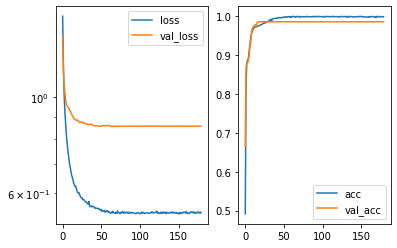

Predicted cell: Normal Probability: [[0.96166515]]
True Cell type: Normal
x [[0.40846202]]
True positional value x 0.5
y [[0.447414]]
True positional value y 0.5


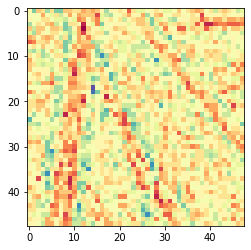

Epoch 181/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5435 - acc: 0.9971 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00181: ReduceLROnPlateau reducing learning rate to 9.999999319067319e-36.

Epoch 00181: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560430715372275, 'val_acc': 0.9853479884046338, 'loss': 0.5435175078716057, 'acc': 0.9971042487151834, 'lr': 9.999999e-35}


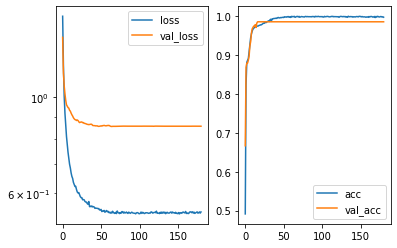

Predicted cell: Cells Probability: [[0.99437004]]
True Cell type: Cells
x [[0.6528554]]
True positional value x 0.5
y [[0.3933021]]
True positional value y 0.2916666666666667


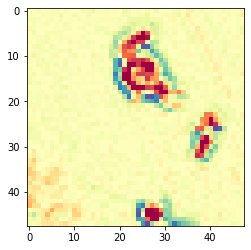

Epoch 182/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5414 - acc: 0.9985 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00182: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561276559864645, 'val_acc': 0.9853479884046338, 'loss': 0.5413628179134089, 'acc': 0.9984555999284546, 'lr': 9.9999995e-36}


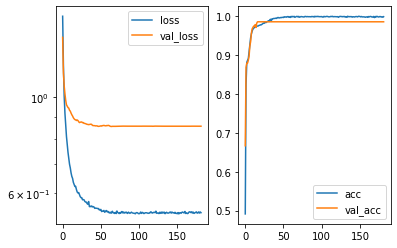

Predicted cell: Cells Probability: [[0.98135114]]
True Cell type: Cells
x [[0.27891788]]
True positional value x 0.5
y [[0.16497038]]
True positional value y 0.2916666666666667


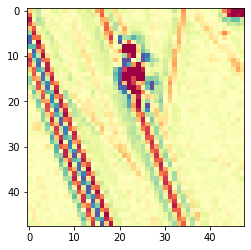

Epoch 183/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5380 - acc: 0.9988 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00183: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561465888669639, 'val_acc': 0.9853479884046338, 'loss': 0.5379687138045617, 'acc': 0.9988416999463409, 'lr': 9.9999995e-36}


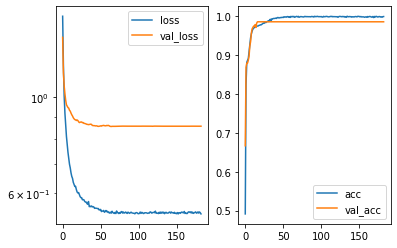

Predicted cell: Cells Probability: [[0.99006313]]
True Cell type: Cells
x [[0.25442237]]
True positional value x 0.5
y [[0.35813582]]
True positional value y 0.5


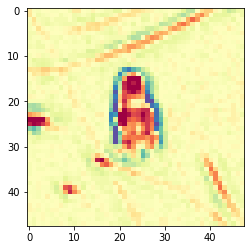

Epoch 184/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5369 - acc: 0.9990 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00184: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560903998084994, 'val_acc': 0.9853479884046338, 'loss': 0.5368618187296805, 'acc': 0.9990347499552841, 'lr': 9.9999995e-36}


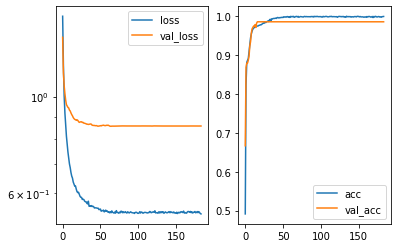

Predicted cell: Normal Probability: [[0.86983997]]
True Cell type: Normal
x [[0.57708323]]
True positional value x 0.5
y [[0.45966285]]
True positional value y 0.5


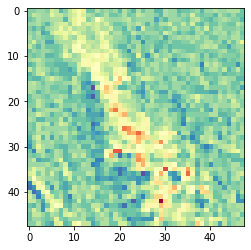

Epoch 185/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5423 - acc: 0.9985 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00185: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561750253041586, 'val_acc': 0.9853479884046338, 'loss': 0.5423292349664401, 'acc': 0.9984555999284546, 'lr': 9.9999995e-36}


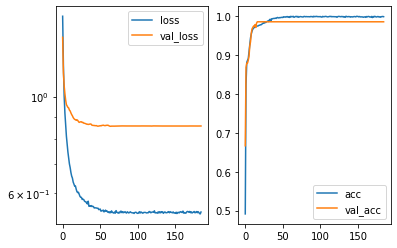

Predicted cell: Cells Probability: [[0.99664825]]
True Cell type: Cells
x [[0.5930598]]
True positional value x 0.7083333333333334
y [[0.21035679]]
True positional value y 0.5


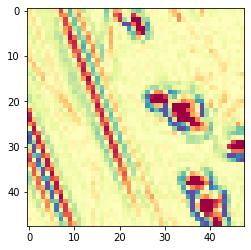

Epoch 186/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5426 - acc: 0.9988 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00186: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563434138839499, 'val_acc': 0.9853479884046338, 'loss': 0.5426061054454346, 'acc': 0.9988416999463409, 'lr': 9.9999995e-36}


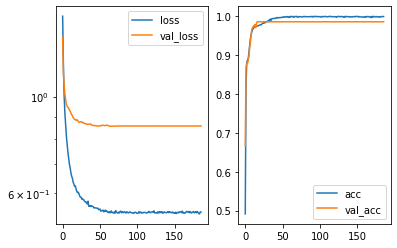

Predicted cell: Normal Probability: [[0.92649335]]
True Cell type: Normal
x [[0.26104587]]
True positional value x 0.5
y [[0.6090673]]
True positional value y 0.5


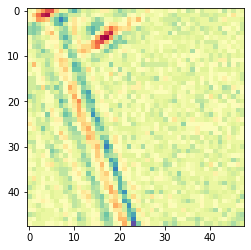

Epoch 187/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5393 - acc: 0.9990 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00187: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856387503417857, 'val_acc': 0.9853479884046338, 'loss': 0.5393252876734641, 'acc': 0.9990347499552841, 'lr': 9.9999995e-36}


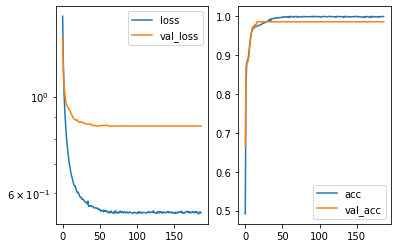

Predicted cell: Cells Probability: [[0.99880123]]
True Cell type: Cells
x [[0.6755602]]
True positional value x 0.7083333333333334
y [[0.5950308]]
True positional value y 0.2916666666666667


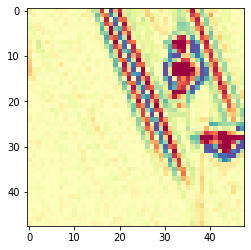

Epoch 188/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5412 - acc: 0.9983 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00188: ReduceLROnPlateau reducing learning rate to 9.999999462560281e-37.

Epoch 00188: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562619057330456, 'val_acc': 0.9853479884046338, 'loss': 0.5412240534675627, 'acc': 0.9982625499195114, 'lr': 9.9999995e-36}


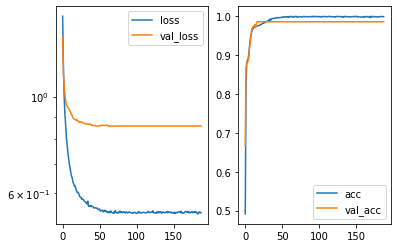

Predicted cell: Cells Probability: [[0.9867453]]
True Cell type: Cells
x [[0.49738494]]
True positional value x 0.2916666666666667
y [[0.85442334]]
True positional value y 0.7083333333333334


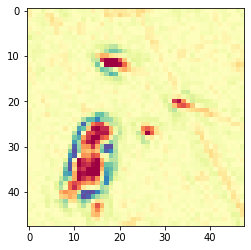

Epoch 189/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5424 - acc: 0.9988 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00189: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561076248958434, 'val_acc': 0.9853479884046338, 'loss': 0.5424277322172658, 'acc': 0.9988416999463409, 'lr': 9.9999995e-37}


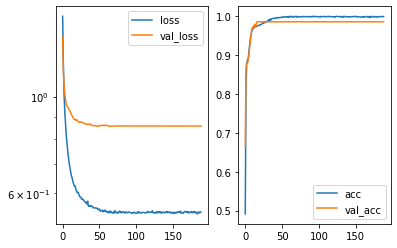

Predicted cell: Cells Probability: [[0.9683496]]
True Cell type: Cells
x [[0.18928805]]
True positional value x 0.2916666666666667
y [[0.18706267]]
True positional value y 0.2916666666666667


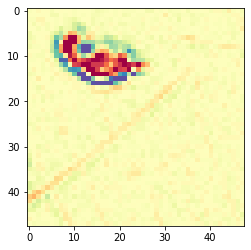

Epoch 190/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5393 - acc: 0.9992 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00190: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561702888090532, 'val_acc': 0.9853479884046338, 'loss': 0.5393416614606114, 'acc': 0.9992277999642273, 'lr': 9.9999995e-37}


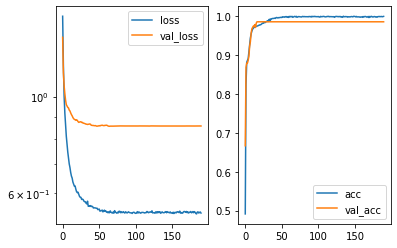

Predicted cell: Cells Probability: [[0.9855466]]
True Cell type: Cells
x [[0.2665733]]
True positional value x 0.2916666666666667
y [[0.33780742]]
True positional value y 0.5


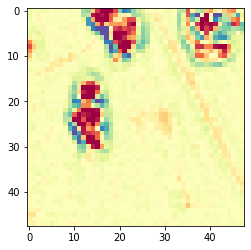

Epoch 191/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5390 - acc: 0.9990 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00191: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560958904224437, 'val_acc': 0.9853479884046338, 'loss': 0.5390333791036863, 'acc': 0.9990347499552841, 'lr': 9.9999995e-37}


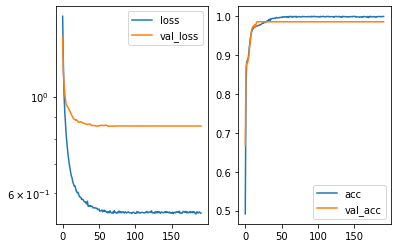

Predicted cell: Cells Probability: [[0.99433655]]
True Cell type: Cells
x [[0.32089096]]
True positional value x 0.2916666666666667
y [[0.3466097]]
True positional value y 0.5


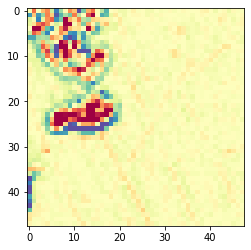

Epoch 192/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5425 - acc: 0.9981 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00192: ReduceLROnPlateau reducing learning rate to 9.99999946256028e-38.

Epoch 00192: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560070546118768, 'val_acc': 0.9853479884046338, 'loss': 0.5424895753731599, 'acc': 0.9980694999105681, 'lr': 9.9999995e-37}


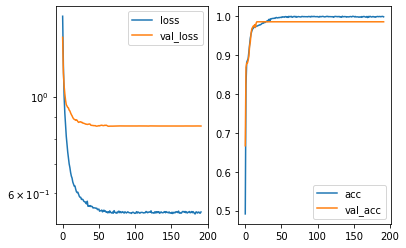

Predicted cell: Normal Probability: [[0.9725557]]
True Cell type: Normal
x [[0.4124192]]
True positional value x 0.5
y [[0.6589673]]
True positional value y 0.5


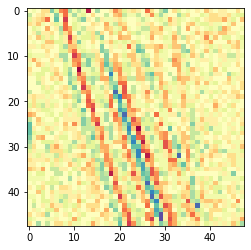

Epoch 193/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5424 - acc: 0.9977 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00193: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856157341719547, 'val_acc': 0.9853479884046338, 'loss': 0.5424153040734958, 'acc': 0.9976833998926818, 'lr': 1e-37}


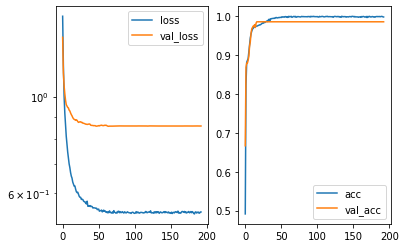

Predicted cell: Cells Probability: [[0.9799457]]
True Cell type: Cells
x [[0.45692703]]
True positional value x 0.5
y [[0.5683061]]
True positional value y 0.5


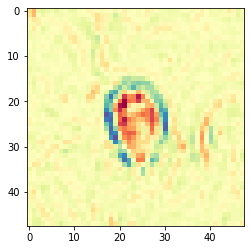

Epoch 194/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5417 - acc: 0.9988 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00194: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561503782377138, 'val_acc': 0.9853479884046338, 'loss': 0.5416866702002447, 'acc': 0.9988416999463409, 'lr': 1e-37}


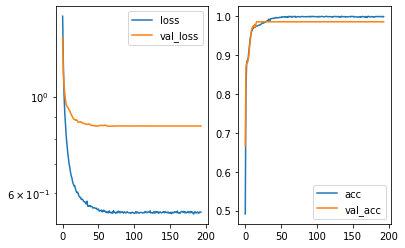

Predicted cell: Cells Probability: [[0.9867166]]
True Cell type: Cells
x [[0.21627879]]
True positional value x 0.2916666666666667
y [[0.10880277]]
True positional value y 0.2916666666666667


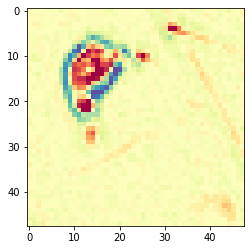

Epoch 195/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5397 - acc: 0.9992 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00195: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856107982523712, 'val_acc': 0.9853479884046338, 'loss': 0.5396891825447672, 'acc': 0.9992277999642273, 'lr': 1e-37}


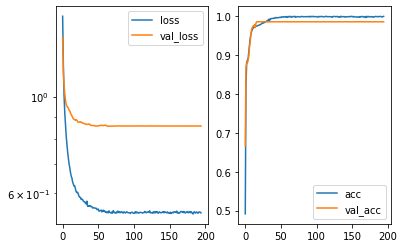

Predicted cell: Cells Probability: [[0.99606115]]
True Cell type: Cells
x [[0.39244312]]
True positional value x 0.5
y [[0.46778914]]
True positional value y 0.5


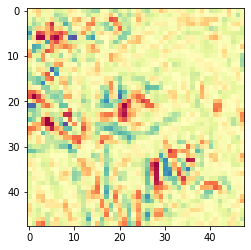

Epoch 196/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5430 - acc: 0.9971 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00196: ReduceLROnPlateau reducing learning rate to 9.99999991097579e-39.

Epoch 00196: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562454317078922, 'val_acc': 0.9853479884046338, 'loss': 0.5430190627639359, 'acc': 0.9971042475645147, 'lr': 1e-37}


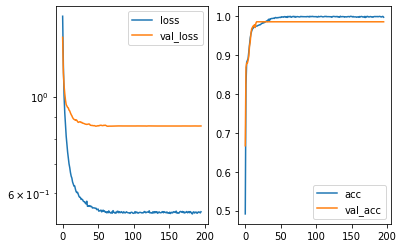

Predicted cell: Cells Probability: [[0.98483723]]
True Cell type: Cells
x [[0.14936262]]
True positional value x 0.2916666666666667
y [[0.53491336]]
True positional value y 0.2916666666666667


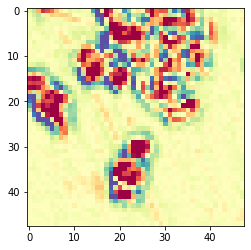

Epoch 197/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5425 - acc: 0.9981 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00197: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562719559931493, 'val_acc': 0.9853479884046338, 'loss': 0.5425134314993634, 'acc': 0.9980694999105681, 'lr': 1e-38}


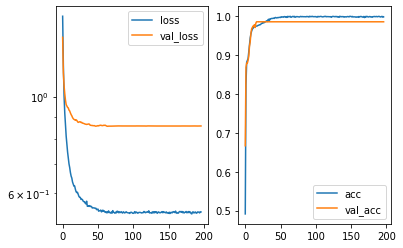

Predicted cell: Cells Probability: [[0.99189925]]
True Cell type: Cells
x [[0.6522276]]
True positional value x 0.7083333333333334
y [[0.55276924]]
True positional value y 0.5


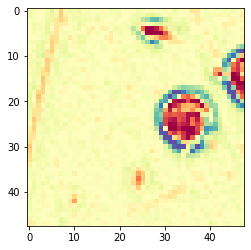

Epoch 198/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5428 - acc: 0.9988 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00198: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564836738747118, 'val_acc': 0.9853479884046338, 'loss': 0.5427640658087712, 'acc': 0.9988416999463409, 'lr': 1e-38}


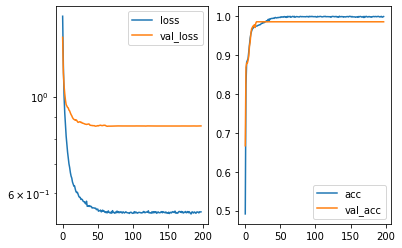

Predicted cell: Normal Probability: [[0.98688567]]
True Cell type: Normal
x [[0.5689487]]
True positional value x 0.5
y [[0.3187396]]
True positional value y 0.5


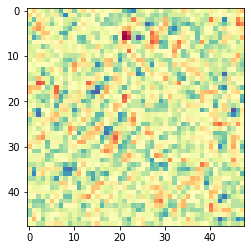

Epoch 199/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5411 - acc: 0.9983 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00199: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563789050657671, 'val_acc': 0.9853479884046338, 'loss': 0.5411467757004108, 'acc': 0.9982625499195114, 'lr': 1e-38}


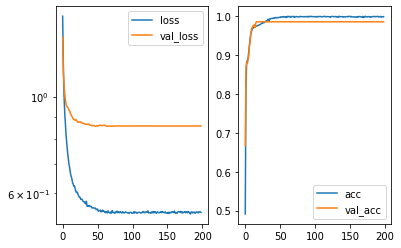

Predicted cell: Cells Probability: [[0.9989961]]
True Cell type: Cells
x [[0.50949097]]
True positional value x 0.2916666666666667
y [[0.87559956]]
True positional value y 0.7083333333333334


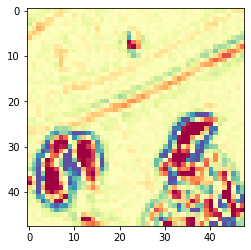

Epoch 200/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5408 - acc: 0.9986 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00200: ReduceLROnPlateau reducing learning rate to 9.999999350456405e-40.

Epoch 00200: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563370909882989, 'val_acc': 0.9853479884046338, 'loss': 0.540809334705235, 'acc': 0.9986486499373978, 'lr': 1e-38}


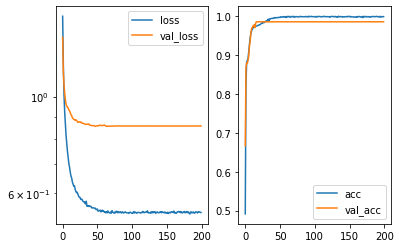

Predicted cell: Cells Probability: [[0.99798524]]
True Cell type: Cells
x [[0.43301657]]
True positional value x 0.5
y [[0.6879409]]
True positional value y 0.5


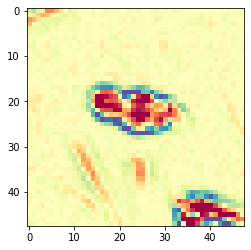

Epoch 201/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5403 - acc: 0.9990 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00201: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562523048002642, 'val_acc': 0.9853479884046338, 'loss': 0.5402981938082279, 'acc': 0.9990347499552841, 'lr': 1e-39}


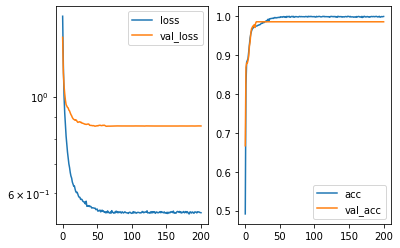

Predicted cell: Cells Probability: [[0.98286116]]
True Cell type: Cells
x [[0.35215262]]
True positional value x 0.5
y [[0.6229821]]
True positional value y 0.7083333333333334


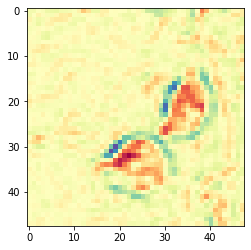

Epoch 202/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5390 - acc: 0.9986 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00202: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562228360892216, 'val_acc': 0.9853479884046338, 'loss': 0.5389564308880839, 'acc': 0.9986486487867289, 'lr': 1e-39}


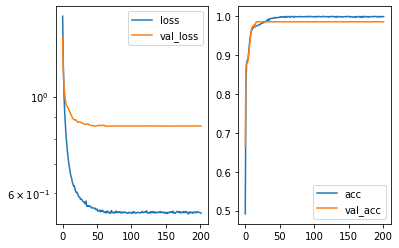

Predicted cell: Cells Probability: [[0.9948159]]
True Cell type: Normal
x [[0.6458988]]
True positional value x 0.5
y [[0.24111533]]
True positional value y 0.5


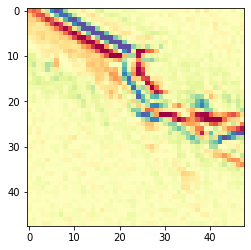

Epoch 203/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5410 - acc: 0.9986 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00203: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564805159201989, 'val_acc': 0.9853479884046338, 'loss': 0.540962589523507, 'acc': 0.9986486499373978, 'lr': 1e-39}


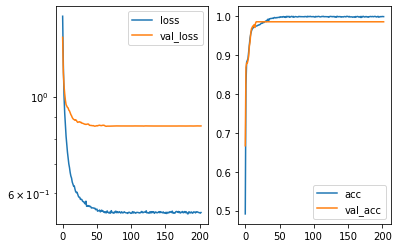

Predicted cell: Cells Probability: [[0.9995427]]
True Cell type: Cells
x [[0.45127177]]
True positional value x 0.7083333333333334
y [[0.3825533]]
True positional value y 0.2916666666666667


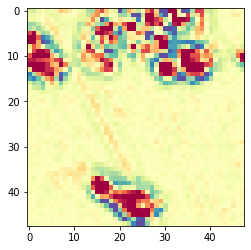

Epoch 204/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5441 - acc: 0.9986 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00204: ReduceLROnPlateau reducing learning rate to 1.0000002153053334e-40.

Epoch 00204: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563597765597668, 'val_acc': 0.9853479884046338, 'loss': 0.5440579777058487, 'acc': 0.9986486499373978, 'lr': 1e-39}


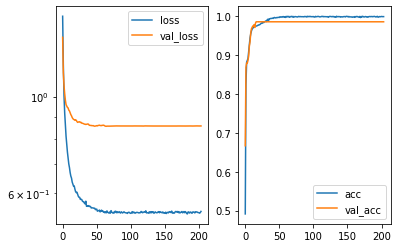

Predicted cell: Cells Probability: [[0.99926263]]
True Cell type: Cells
x [[0.73596317]]
True positional value x 0.5
y [[0.26429036]]
True positional value y 0.5


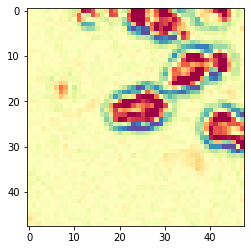

Epoch 205/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5405 - acc: 0.9994 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00205: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562478805199648, 'val_acc': 0.9853479884046338, 'loss': 0.5405255118852417, 'acc': 0.9994208499731705, 'lr': 1e-40}


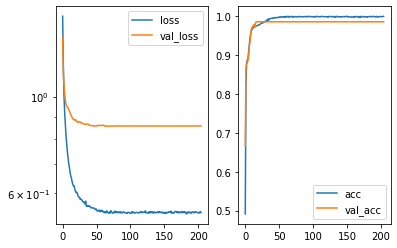

Predicted cell: Cells Probability: [[0.93840104]]
True Cell type: Cells
x [[0.50824064]]
True positional value x 0.5
y [[0.6841119]]
True positional value y 0.7083333333333334


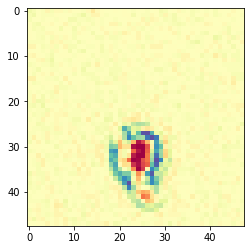

Epoch 206/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5435 - acc: 0.9969 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00206: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563818962146075, 'val_acc': 0.9853479884046338, 'loss': 0.5435312197015092, 'acc': 0.9969111998569091, 'lr': 1e-40}


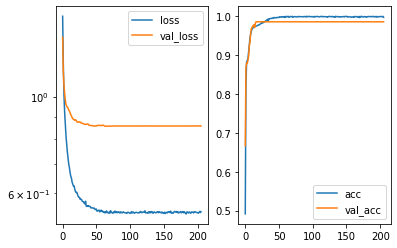

Predicted cell: Cells Probability: [[0.98938495]]
True Cell type: Cells
x [[0.37419543]]
True positional value x 0.7083333333333334
y [[0.58780265]]
True positional value y 0.5


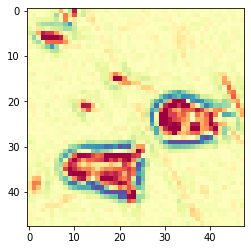

Epoch 207/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5424 - acc: 0.9981 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00207: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561718236832392, 'val_acc': 0.9853479884046338, 'loss': 0.5423661896160671, 'acc': 0.9980694999105681, 'lr': 1e-40}


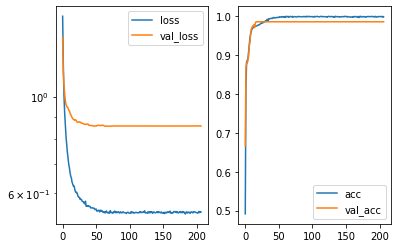

Predicted cell: Cells Probability: [[0.9881237]]
True Cell type: Cells
x [[0.56257814]]
True positional value x 0.2916666666666667
y [[0.48992354]]
True positional value y 0.2916666666666667


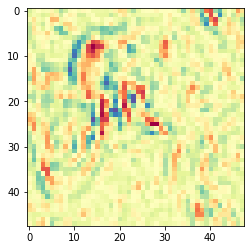

Epoch 208/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5396 - acc: 0.9992 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00208: ReduceLROnPlateau reducing learning rate to 9.99994610111476e-42.

Epoch 00208: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562866755020924, 'val_acc': 0.9853479884046338, 'loss': 0.5395997051566724, 'acc': 0.9992277999642273, 'lr': 1e-40}


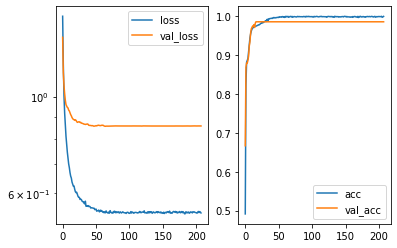

Predicted cell: Cells Probability: [[0.97256666]]
True Cell type: Cells
x [[0.62358695]]
True positional value x 0.5
y [[0.32090908]]
True positional value y 0.5


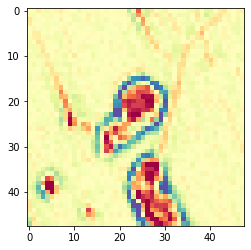

Epoch 209/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5405 - acc: 0.9983 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00209: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563226981040759, 'val_acc': 0.9853479884046338, 'loss': 0.54047611413315, 'acc': 0.9982625499195114, 'lr': 1e-41}


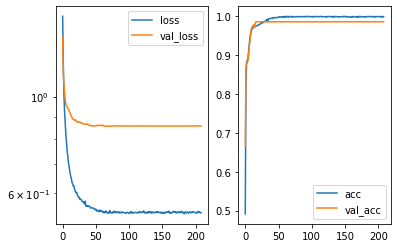

Predicted cell: Cells Probability: [[0.99524635]]
True Cell type: Cells
x [[0.8865232]]
True positional value x 0.7083333333333334
y [[0.12111194]]
True positional value y 0.2916666666666667


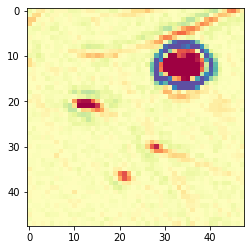

Epoch 210/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5429 - acc: 0.9986 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00210: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563023111322424, 'val_acc': 0.9853479884046338, 'loss': 0.5429196376137752, 'acc': 0.9986486487867289, 'lr': 1e-41}


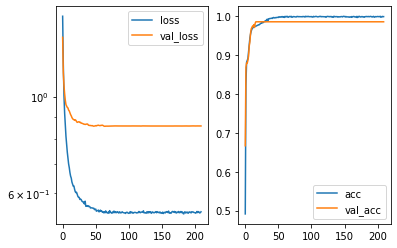

Predicted cell: Cells Probability: [[0.98581046]]
True Cell type: Cells
x [[0.28686145]]
True positional value x 0.2916666666666667
y [[0.8596553]]
True positional value y 0.7083333333333334


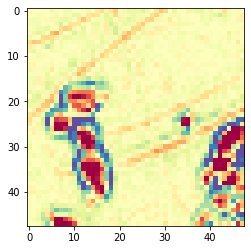

Epoch 211/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5438 - acc: 0.9975 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00211: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.855956705498608, 'val_acc': 0.9853479884046338, 'loss': 0.5438147785580757, 'acc': 0.9974903498837386, 'lr': 1e-41}


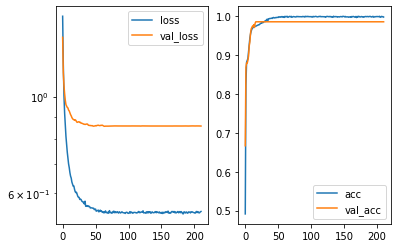

Predicted cell: Cells Probability: [[0.97235954]]
True Cell type: Cells
x [[0.40208068]]
True positional value x 0.2916666666666667
y [[0.6252109]]
True positional value y 0.5


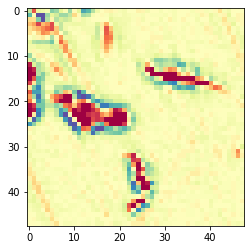

Epoch 212/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5396 - acc: 0.9985 - val_loss: 0.8558 - val_acc: 0.9853

Epoch 00212: ReduceLROnPlateau reducing learning rate to 9.999665841421895e-43.

Epoch 00212: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8557833293418744, 'val_acc': 0.9853479884046338, 'loss': 0.5396355899144324, 'acc': 0.9984555990079195, 'lr': 1e-41}


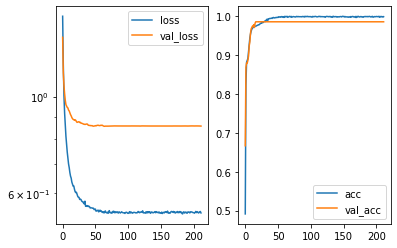

Predicted cell: Cells Probability: [[0.99475455]]
True Cell type: Cells
x [[0.25925985]]
True positional value x 0.2916666666666667
y [[0.8353663]]
True positional value y 0.5


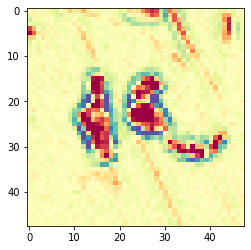

Epoch 213/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5394 - acc: 0.9992 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00213: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561454950234829, 'val_acc': 0.9853479884046338, 'loss': 0.5394414014337606, 'acc': 0.9992277999642273, 'lr': 1e-42}


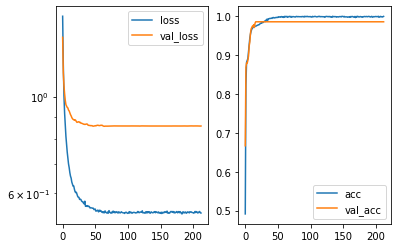

Predicted cell: Cells Probability: [[0.9958217]]
True Cell type: Cells
x [[0.6584971]]
True positional value x 0.7083333333333334
y [[0.5709866]]
True positional value y 0.5


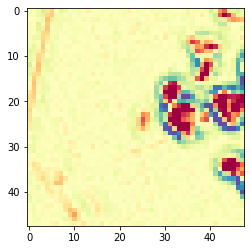

Epoch 214/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5441 - acc: 0.9981 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00214: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560158027397408, 'val_acc': 0.9853479884046338, 'loss': 0.5441299959959671, 'acc': 0.9980694999105681, 'lr': 1e-42}


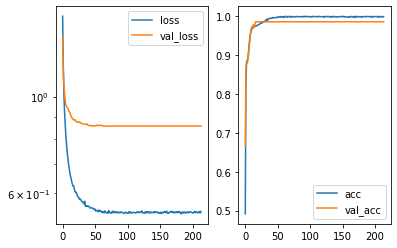

Predicted cell: Cells Probability: [[0.9923884]]
True Cell type: Cells
x [[0.63860035]]
True positional value x 0.5
y [[0.7312944]]
True positional value y 0.7083333333333334


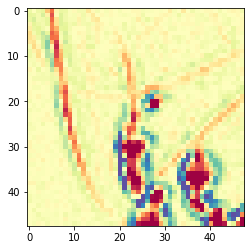

Epoch 215/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5395 - acc: 0.9988 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00215: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8558805425525148, 'val_acc': 0.9853479884046338, 'loss': 0.5395073234804809, 'acc': 0.9988416999463409, 'lr': 1e-42}


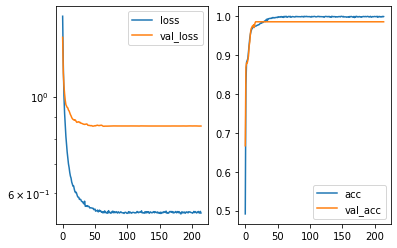

Predicted cell: Cells Probability: [[0.99775475]]
True Cell type: Cells
x [[0.8049157]]
True positional value x 0.7083333333333334
y [[0.34019127]]
True positional value y 0.2916666666666667


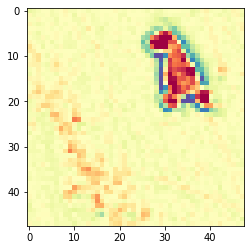

Epoch 216/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5399 - acc: 0.9986 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00216: ReduceLROnPlateau reducing learning rate to 1.0005271035279195e-43.

Epoch 00216: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8558979073723594, 'val_acc': 0.9853479884046338, 'loss': 0.5398657632610513, 'acc': 0.9986486499373978, 'lr': 1e-42}


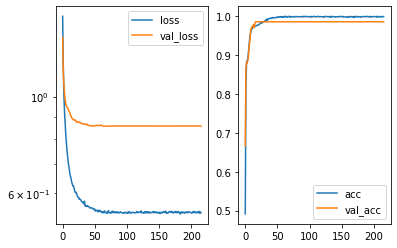

Predicted cell: Normal Probability: [[0.9713462]]
True Cell type: Normal
x [[0.58745366]]
True positional value x 0.5
y [[0.59685]]
True positional value y 0.5


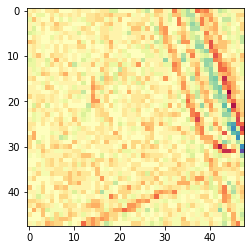

Epoch 217/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5401 - acc: 0.9990 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00217: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560604040439312, 'val_acc': 0.9853479884046338, 'loss': 0.5400562781164545, 'acc': 0.9990347499552841, 'lr': 1e-43}


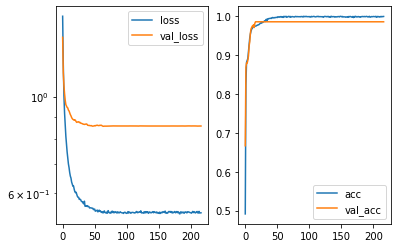

Predicted cell: Cells Probability: [[0.9724149]]
True Cell type: Cells
x [[0.21835789]]
True positional value x 0.5
y [[0.2552051]]
True positional value y 0.5


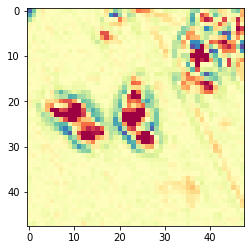

Epoch 218/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5439 - acc: 0.9975 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00218: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562710149820908, 'val_acc': 0.9853479884046338, 'loss': 0.5439160107185481, 'acc': 0.9974903498837386, 'lr': 1e-43}


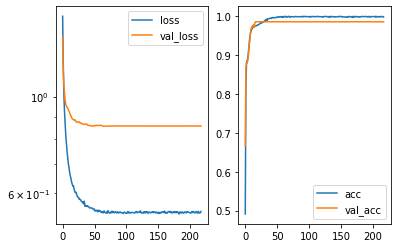

Predicted cell: Cells Probability: [[0.9880223]]
True Cell type: Cells
x [[0.5919913]]
True positional value x 0.7083333333333334
y [[0.68548083]]
True positional value y 0.5


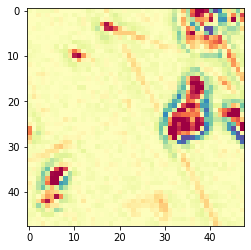

Epoch 219/250
5180/5180 [==============================] - 9s 2ms/step - loss: 0.5417 - acc: 0.9983 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00219: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856411398985447, 'val_acc': 0.9853479884046338, 'loss': 0.5417249819486758, 'acc': 0.9982625499195114, 'lr': 1e-43}


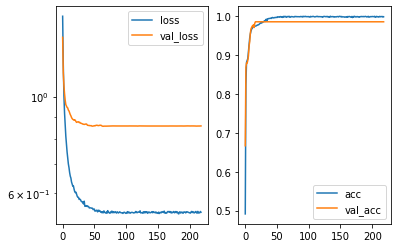

Predicted cell: Cells Probability: [[0.99925655]]
True Cell type: Cells
x [[0.38085622]]
True positional value x 0.5
y [[0.30924115]]
True positional value y 0.7083333333333334


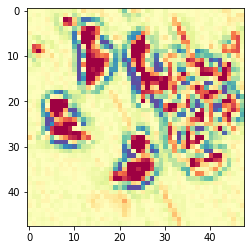

Epoch 220/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5417 - acc: 0.9983 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00220: ReduceLROnPlateau reducing learning rate to 9.949219096706202e-45.

Epoch 00220: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564567854116251, 'val_acc': 0.9853479884046338, 'loss': 0.5416629358148023, 'acc': 0.9982625487688426, 'lr': 1e-43}


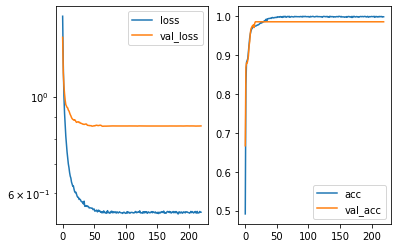

Predicted cell: Normal Probability: [[0.9633593]]
True Cell type: Normal
x [[0.51903796]]
True positional value x 0.5
y [[0.5335018]]
True positional value y 0.5


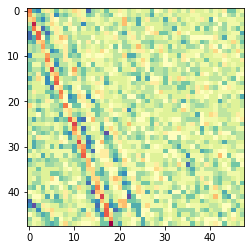

Epoch 221/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5385 - acc: 0.9986 - val_loss: 0.8565 - val_acc: 0.9853

Epoch 00221: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8564769889845516, 'val_acc': 0.9853479884046338, 'loss': 0.5385302249989454, 'acc': 0.9986486499373978, 'lr': 1e-44}


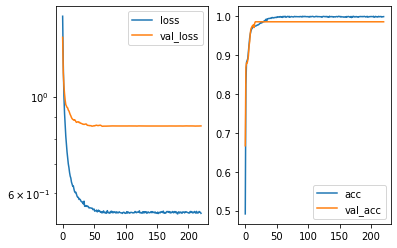

Predicted cell: Cells Probability: [[0.98617274]]
True Cell type: Cells
x [[0.51970154]]
True positional value x 0.5
y [[0.30995134]]
True positional value y 0.5


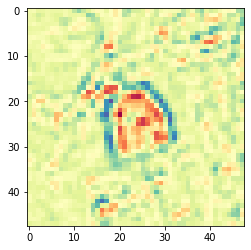

Epoch 222/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5407 - acc: 0.9985 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00222: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561935747936095, 'val_acc': 0.9853479884046338, 'loss': 0.540703322896626, 'acc': 0.9984555987777858, 'lr': 1e-44}


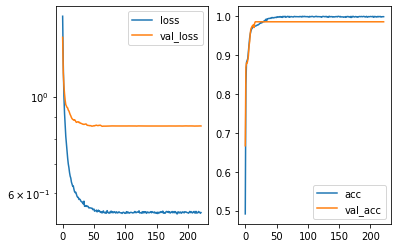

Predicted cell: Cells Probability: [[0.97247213]]
True Cell type: Cells
x [[0.40198767]]
True positional value x 0.2916666666666667
y [[0.6246819]]
True positional value y 0.5


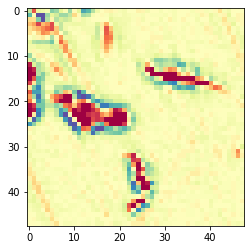

Epoch 223/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5407 - acc: 0.9975 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00223: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563418152568104, 'val_acc': 0.9853479884046338, 'loss': 0.5407452673065156, 'acc': 0.9974903487330699, 'lr': 1e-44}


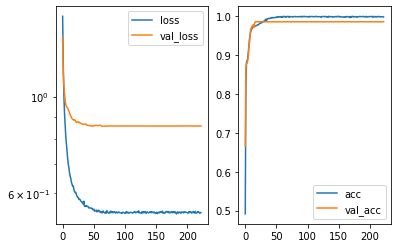

Predicted cell: Normal Probability: [[0.9878435]]
True Cell type: Normal
x [[0.6734454]]
True positional value x 0.5
y [[0.47222614]]
True positional value y 0.5


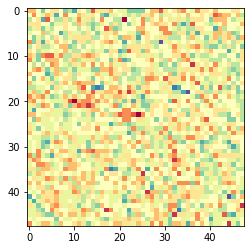

Epoch 224/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5385 - acc: 0.9988 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00224: ReduceLROnPlateau reducing learning rate to 9.80908925027372e-46.

Epoch 00224: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562611105677845, 'val_acc': 0.9853479884046338, 'loss': 0.5385332337677708, 'acc': 0.9988416999463409, 'lr': 1e-44}


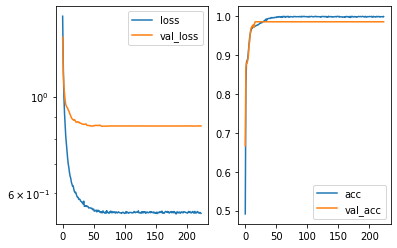

Predicted cell: Cells Probability: [[0.98011464]]
True Cell type: Cells
x [[0.4252616]]
True positional value x 0.2916666666666667
y [[0.37159142]]
True positional value y 0.2916666666666667


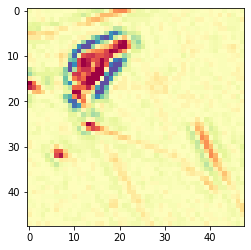

Epoch 225/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5382 - acc: 0.9994 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00225: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562153499205034, 'val_acc': 0.9853479884046338, 'loss': 0.5382480308355972, 'acc': 0.9994208499731705, 'lr': 1e-45}


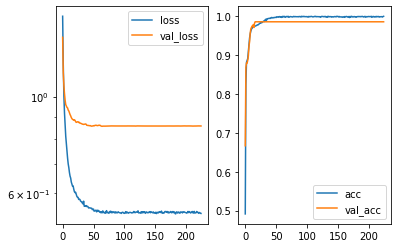

Predicted cell: Cells Probability: [[0.98944384]]
True Cell type: Cells
x [[0.57515895]]
True positional value x 0.2916666666666667
y [[0.683086]]
True positional value y 0.7083333333333334


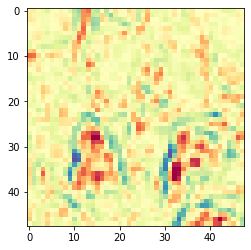

Epoch 226/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5413 - acc: 0.9985 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00226: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561093484089052, 'val_acc': 0.9853479884046338, 'loss': 0.5412859495542224, 'acc': 0.9984555999284546, 'lr': 1e-45}


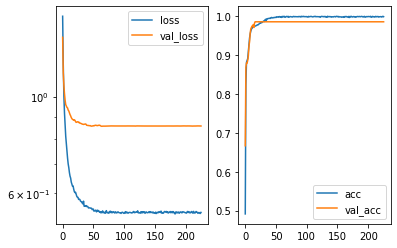

Predicted cell: Cells Probability: [[0.99671906]]
True Cell type: Cells
x [[0.37528393]]
True positional value x 0.5
y [[0.42976037]]
True positional value y 0.5


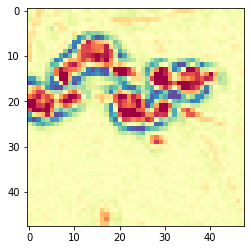

Epoch 227/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5412 - acc: 0.9986 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00227: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856130736651438, 'val_acc': 0.9853479884046338, 'loss': 0.541154019620888, 'acc': 0.9986486487867289, 'lr': 1e-45}


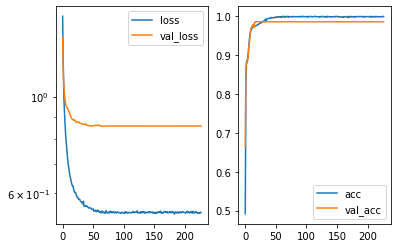

Predicted cell: Cells Probability: [[0.9928558]]
True Cell type: Cells
x [[0.6711775]]
True positional value x 0.5
y [[0.2520654]]
True positional value y 0.2916666666666667


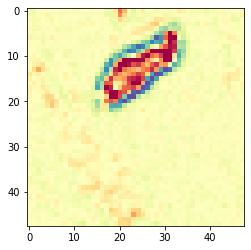

Epoch 228/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5447 - acc: 0.9979 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00228: ReduceLROnPlateau reducing learning rate to 1.4012984643248171e-46.

Epoch 00228: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561689417004149, 'val_acc': 0.9853479884046338, 'loss': 0.5447473712409325, 'acc': 0.997876449901625, 'lr': 1e-45}


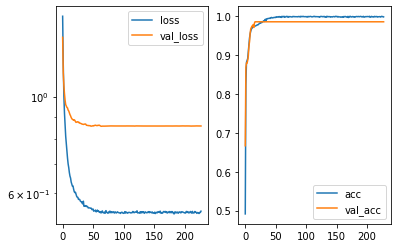

Predicted cell: Cells Probability: [[0.99217165]]
True Cell type: Cells
x [[0.5763116]]
True positional value x 0.7083333333333334
y [[0.64564735]]
True positional value y 0.7083333333333334


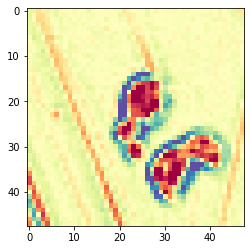

Epoch 229/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5395 - acc: 0.9990 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00229: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560479630480756, 'val_acc': 0.9853479884046338, 'loss': 0.5395176217362687, 'acc': 0.9990347499552841, 'lr': 0.0}


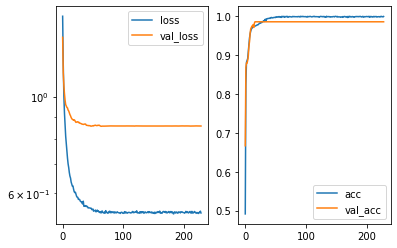

Predicted cell: Cells Probability: [[0.986728]]
True Cell type: Cells
x [[0.50049067]]
True positional value x 0.2916666666666667
y [[0.26000682]]
True positional value y 0.5


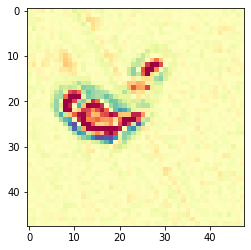

Epoch 230/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5423 - acc: 0.9983 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00230: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559933049338204, 'val_acc': 0.9853479884046338, 'loss': 0.5422770286618973, 'acc': 0.9982625499195114, 'lr': 0.0}


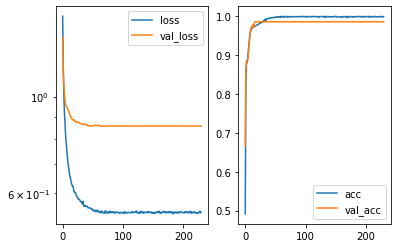

Predicted cell: Cells Probability: [[0.99587256]]
True Cell type: Cells
x [[0.7052233]]
True positional value x 0.7083333333333334
y [[0.75399095]]
True positional value y 0.5


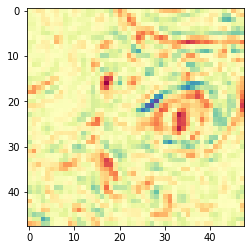

Epoch 231/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5389 - acc: 0.9988 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00231: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559495987909618, 'val_acc': 0.9853479884046338, 'loss': 0.5389096578115662, 'acc': 0.9988416999463409, 'lr': 0.0}


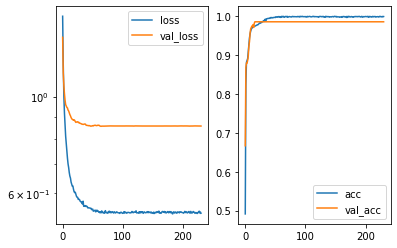

Predicted cell: Cells Probability: [[0.97247857]]
True Cell type: Cells
x [[0.4025634]]
True positional value x 0.2916666666666667
y [[0.6242129]]
True positional value y 0.5


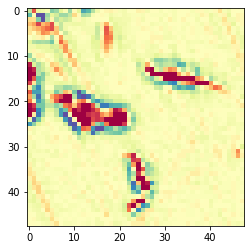

Epoch 232/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5411 - acc: 0.9983 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00232: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562233836659582, 'val_acc': 0.9853479884046338, 'loss': 0.5411417528008863, 'acc': 0.9982625499195114, 'lr': 0.0}


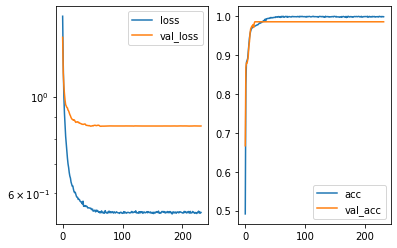

Predicted cell: Cells Probability: [[0.998058]]
True Cell type: Cells
x [[0.8005011]]
True positional value x 0.5
y [[0.51062876]]
True positional value y 0.5


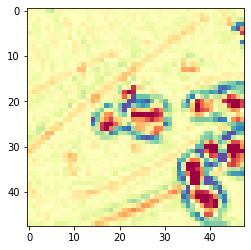

Epoch 233/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5413 - acc: 0.9983 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00233: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562962030753111, 'val_acc': 0.9853479884046338, 'loss': 0.5413065172990776, 'acc': 0.9982625499195114, 'lr': 0.0}


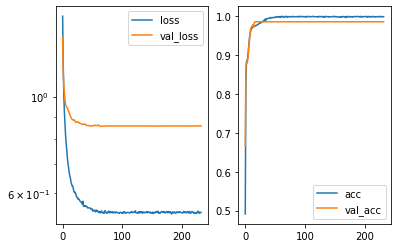

Predicted cell: Cells Probability: [[0.9720934]]
True Cell type: Cells
x [[0.50212264]]
True positional value x 0.7083333333333334
y [[0.34746855]]
True positional value y 0.2916666666666667


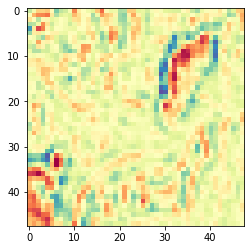

Epoch 234/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5391 - acc: 0.9985 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00234: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562228631623935, 'val_acc': 0.9853479884046338, 'loss': 0.5390695743118934, 'acc': 0.9984555999284546, 'lr': 0.0}


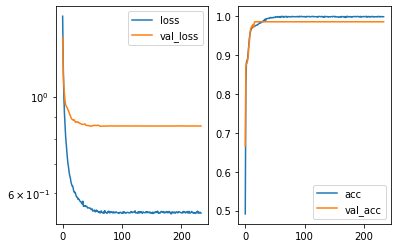

Predicted cell: Cells Probability: [[0.99637824]]
True Cell type: Cells
x [[0.7777698]]
True positional value x 0.2916666666666667
y [[0.43521616]]
True positional value y 0.7083333333333334


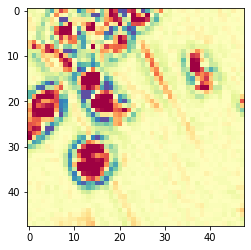

Epoch 235/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5396 - acc: 0.9986 - val_loss: 0.8563 - val_acc: 0.9853

Epoch 00235: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562562766965929, 'val_acc': 0.9853479884046338, 'loss': 0.5396120608083069, 'acc': 0.9986486499373978, 'lr': 0.0}


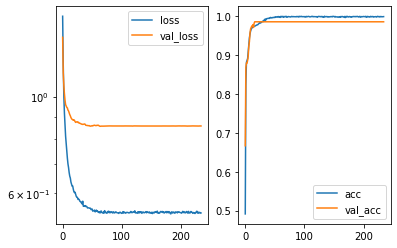

Predicted cell: Cells Probability: [[0.9803324]]
True Cell type: Cells
x [[0.5668825]]
True positional value x 0.2916666666666667
y [[0.5171313]]
True positional value y 0.7083333333333334


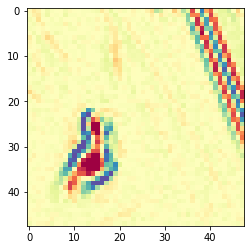

Epoch 236/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5385 - acc: 0.9996 - val_loss: 0.8564 - val_acc: 0.9853

Epoch 00236: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8563963056920649, 'val_acc': 0.9853479884046338, 'loss': 0.538530500008793, 'acc': 0.9996138999821136, 'lr': 0.0}


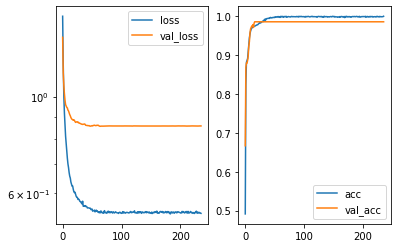

Predicted cell: Cells Probability: [[0.95595604]]
True Cell type: Cells
x [[0.57971865]]
True positional value x 0.2916666666666667
y [[0.4894135]]
True positional value y 0.7083333333333334


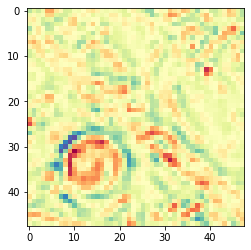

Epoch 237/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5454 - acc: 0.9979 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00237: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8562023460646688, 'val_acc': 0.9853479884046338, 'loss': 0.5453866211603967, 'acc': 0.997876449901625, 'lr': 0.0}


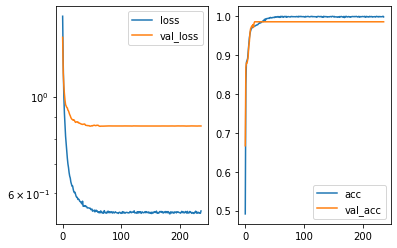

Predicted cell: Cells Probability: [[0.99552816]]
True Cell type: Cells
x [[0.3499785]]
True positional value x 0.7083333333333334
y [[0.527656]]
True positional value y 0.5


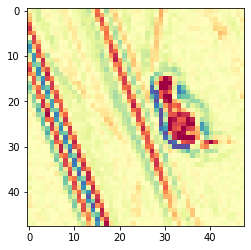

Epoch 238/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5407 - acc: 0.9981 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00238: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856105700080648, 'val_acc': 0.9853479884046338, 'loss': 0.5407196170574909, 'acc': 0.9980694999105681, 'lr': 0.0}


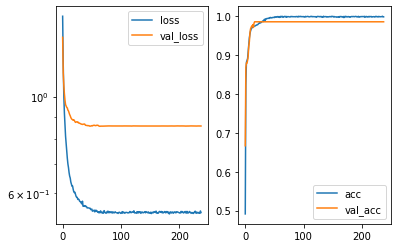

Predicted cell: Cells Probability: [[0.9941255]]
True Cell type: Cells
x [[0.52524656]]
True positional value x 0.5
y [[0.30936414]]
True positional value y 0.2916666666666667


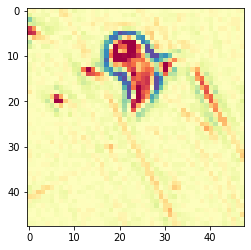

Epoch 239/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5408 - acc: 0.9981 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00239: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561978623980567, 'val_acc': 0.9853479884046338, 'loss': 0.540815488482074, 'acc': 0.9980694999105681, 'lr': 0.0}


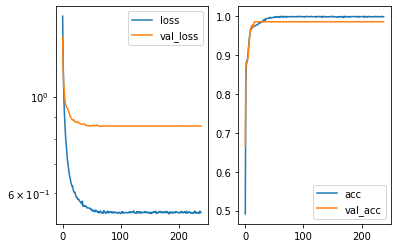

Predicted cell: Normal Probability: [[0.9861369]]
True Cell type: Normal
x [[0.5768105]]
True positional value x 0.5
y [[0.43358603]]
True positional value y 0.5


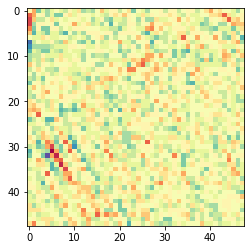

Epoch 240/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5414 - acc: 0.9983 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00240: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561706660868047, 'val_acc': 0.9853479884046338, 'loss': 0.5413881682981395, 'acc': 0.9982625499195114, 'lr': 0.0}


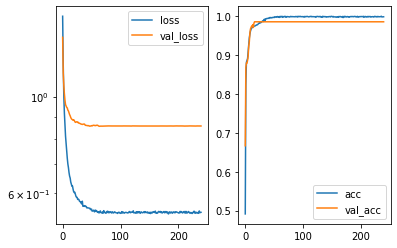

Predicted cell: Cells Probability: [[0.9866757]]
True Cell type: Cells
x [[0.49682665]]
True positional value x 0.2916666666666667
y [[0.85429883]]
True positional value y 0.7083333333333334


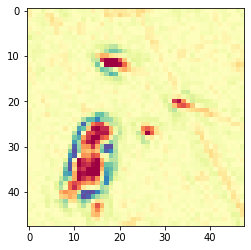

Epoch 241/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5414 - acc: 0.9979 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00241: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561035324802329, 'val_acc': 0.9853479884046338, 'loss': 0.5413617894456193, 'acc': 0.9978764487509562, 'lr': 0.0}


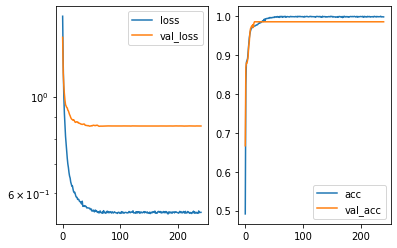

Predicted cell: Cells Probability: [[0.975957]]
True Cell type: Cells
x [[0.74573493]]
True positional value x 0.7083333333333334
y [[0.34778738]]
True positional value y 0.2916666666666667


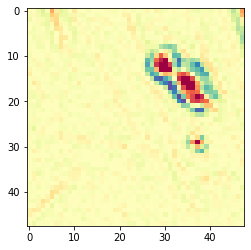

Epoch 242/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5456 - acc: 0.9971 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00242: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561251608880012, 'val_acc': 0.9853479884046338, 'loss': 0.5455971408534694, 'acc': 0.9971042498658522, 'lr': 0.0}


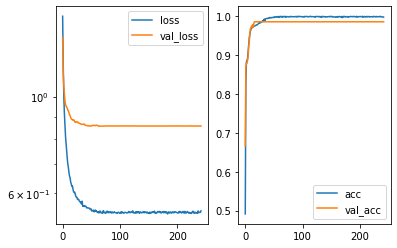

Predicted cell: Cells Probability: [[0.99006605]]
True Cell type: Cells
x [[0.2544841]]
True positional value x 0.5
y [[0.3581901]]
True positional value y 0.5


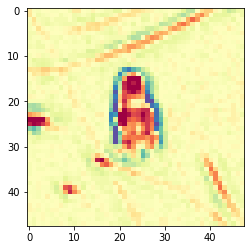

Epoch 243/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5426 - acc: 0.9981 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00243: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561896566069607, 'val_acc': 0.9853479884046338, 'loss': 0.5425736257468411, 'acc': 0.9980694999105681, 'lr': 0.0}


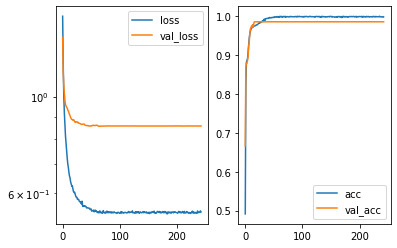

Predicted cell: Cells Probability: [[0.999778]]
True Cell type: Cells
x [[0.8811319]]
True positional value x 0.2916666666666667
y [[0.20558454]]
True positional value y 0.7083333333333334


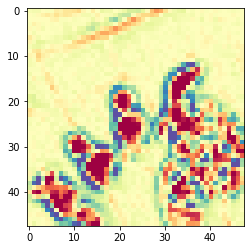

Epoch 244/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5404 - acc: 0.9988 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00244: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561464438944946, 'val_acc': 0.9853479884046338, 'loss': 0.5403879602443298, 'acc': 0.9988416999463409, 'lr': 0.0}


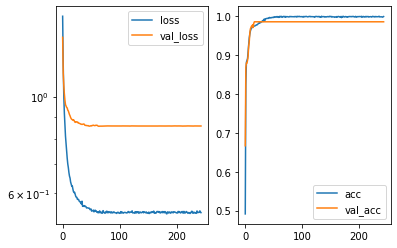

Predicted cell: Cells Probability: [[0.97865856]]
True Cell type: Cells
x [[0.5752861]]
True positional value x 0.7083333333333334
y [[0.40194136]]
True positional value y 0.7083333333333334


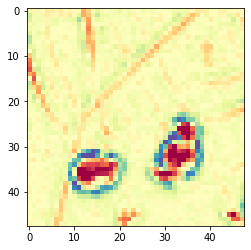

Epoch 245/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5415 - acc: 0.9986 - val_loss: 0.8562 - val_acc: 0.9853

Epoch 00245: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.856221059739808, 'val_acc': 0.9853479884046338, 'loss': 0.5414890262611124, 'acc': 0.9986486499373978, 'lr': 0.0}


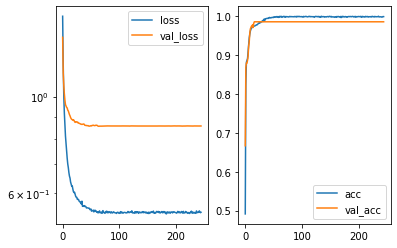

Predicted cell: Cells Probability: [[0.9711042]]
True Cell type: Cells
x [[0.59183586]]
True positional value x 0.5
y [[0.46047857]]
True positional value y 0.5


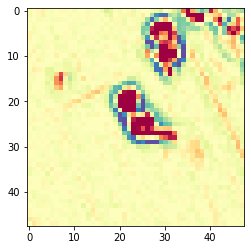

Epoch 246/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5397 - acc: 0.9986 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00246: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8561385254283528, 'val_acc': 0.9853479884046338, 'loss': 0.539683616989828, 'acc': 0.9986486499373978, 'lr': 0.0}


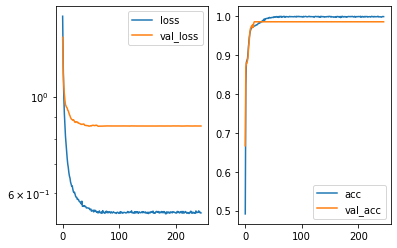

Predicted cell: Cells Probability: [[0.9936156]]
True Cell type: Cells
x [[0.5989915]]
True positional value x 0.7083333333333334
y [[0.40139815]]
True positional value y 0.7083333333333334


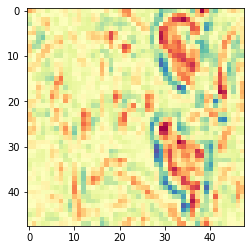

Epoch 247/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5386 - acc: 0.9992 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00247: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559857030491252, 'val_acc': 0.9853479884046338, 'loss': 0.5386480932990556, 'acc': 0.9992277999642273, 'lr': 0.0}


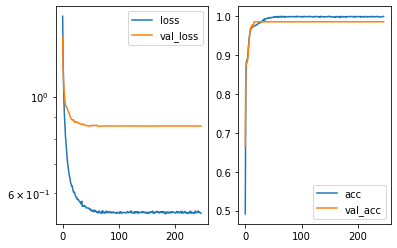

Predicted cell: Normal Probability: [[0.96891326]]
True Cell type: Normal
x [[0.50023663]]
True positional value x 0.5
y [[0.46397322]]
True positional value y 0.5


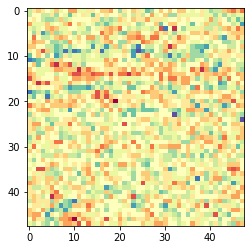

Epoch 248/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5407 - acc: 0.9985 - val_loss: 0.8560 - val_acc: 0.9853

Epoch 00248: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560138866578266, 'val_acc': 0.9853479884046338, 'loss': 0.5406578130243368, 'acc': 0.9984555999284546, 'lr': 0.0}


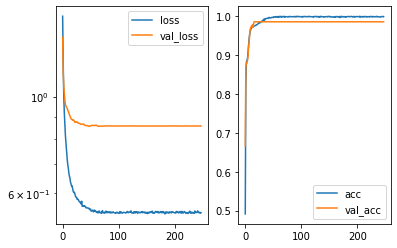

Predicted cell: Cells Probability: [[0.991388]]
True Cell type: Cells
x [[0.4361516]]
True positional value x 0.5
y [[0.49617046]]
True positional value y 0.5


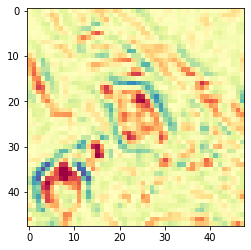

Epoch 249/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5413 - acc: 0.9986 - val_loss: 0.8561 - val_acc: 0.9853

Epoch 00249: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8560859353551061, 'val_acc': 0.9853479884046338, 'loss': 0.5412750909227202, 'acc': 0.9986486499373978, 'lr': 0.0}


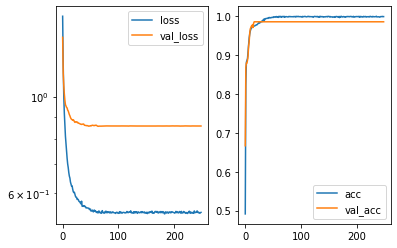

Predicted cell: Cells Probability: [[0.99004245]]
True Cell type: Cells
x [[0.2545605]]
True positional value x 0.5
y [[0.35810283]]
True positional value y 0.5


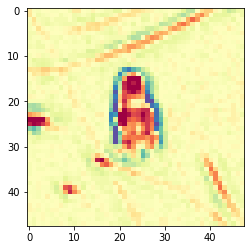

Epoch 250/250
5180/5180 [==============================] - 8s 2ms/step - loss: 0.5409 - acc: 0.9979 - val_loss: 0.8559 - val_acc: 0.9853

Epoch 00250: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd56SMALL.h5
{'val_loss': 0.8559370359658321, 'val_acc': 0.9853479884046338, 'loss': 0.5409119870211627, 'acc': 0.9978764487509562, 'lr': 0.0}


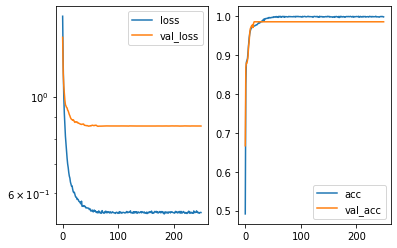

Predicted cell: Cells Probability: [[0.9926432]]
True Cell type: Cells
x [[0.8281567]]
True positional value x 0.5
y [[0.32860017]]
True positional value y 0.2916666666666667


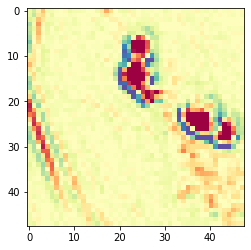

In [9]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
